In [1]:
from wand.image import Image

import urllib
import cv2
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd

from keras.layers import Input, Activation, Conv2D, Flatten, Dense, MaxPooling2D, Dropout, Add, LeakyReLU
from keras.models import Model, load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
import warnings
warnings.filterwarnings("ignore")
import datetime
import os, sys, glob
import seaborn

import time

In [3]:
os.getcwd()

'C:\\Users\\User\\Documents\\myproject\\Crawling'

In [4]:
df = pd.read_pickle("./result.pkl")

In [6]:
imgPre = df[["imgAdr","score"]]

In [7]:
imgPre['log_score'] = np.log(imgPre.score)

(array([1228.,  322.,  111.,   47.,   23.,    9.,    6.,    2.,    2.,
           2.]),
 array([  0.36 ,  17.857,  35.354,  52.851,  70.348,  87.845, 105.342,
        122.839, 140.336, 157.833, 175.33 ]),
 <a list of 10 Patch objects>)

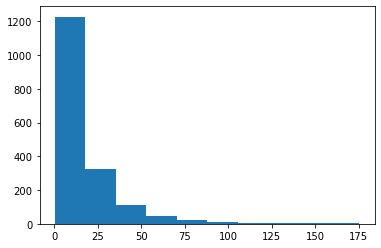

In [8]:
plt.hist(imgPre.score)

(array([ 28., 151., 207., 257., 152., 324., 346., 184.,  87.,  16.]),
 array([-1.02165125, -0.40281913,  0.21601298,  0.8348451 ,  1.45367722,
         2.07250933,  2.69134145,  3.31017356,  3.92900568,  4.5478378 ,
         5.16666991]),
 <a list of 10 Patch objects>)

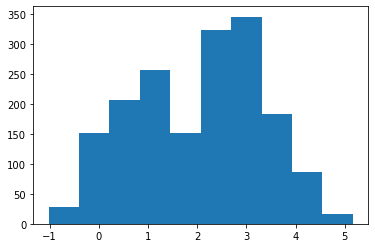

In [9]:
plt.hist(imgPre.log_score)

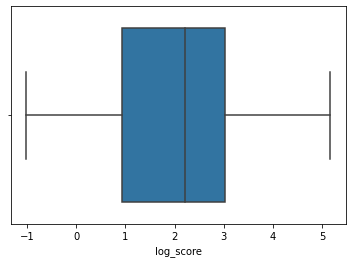

In [10]:
seaborn.boxplot(imgPre.log_score)

In [12]:
imgPre.head()

,imgAdr,score,log_score
0,https://i.ytimg.com/vi/lY1vCa4rDyg/hqdefault.j...,8.17,2.100469
1,https://i.ytimg.com/vi/uZK2JDokRKs/hqdefault.j...,7.39,2.000128
2,https://i.ytimg.com/vi/Myxpe_D-Qp8/hqdefault.j...,7.36,1.996060
3,https://i.ytimg.com/vi/S_vIEkgvsB4/hqdefault.j...,6.51,1.873339
4,https://i.ytimg.com/vi/ZNycCeuKUnw/hqdefault.j...,6.26,1.834180


In [13]:
labels_np = imgPre[['imgAdr','log_score']].values

In [14]:
labels_np.shape

(1752, 2)

In [15]:
def url_to_image(url, readFlag=cv2.IMREAD_COLOR):
    # download the image, convert it to a NumPy array, and then read
    # it into OpenCV format
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)

    # return the image
    return image

In [16]:
imgs = np.empty((len(labels_np),188,336,3),dtype=np.uint8)

for i, (imgAdress, score) in enumerate(labels_np):
    try:
        img = url_to_image(imgAdress)
        if img.shape[0] != 188 or img.shape[1] != 336:
            print("{}의 이미지 크기가 맞지않습니다".format(imgAdress))
        imgs[i] = img
    except Exception as e:
        print(i)

In [17]:
# imgs = np.empty((len(labels_np),188,336,3),dtype=np.uint8)

# for i, (imgAdress, score) in enumerate(labels_np):
#     img = url_to_image(imgAdress)
    
#     if img.shape[0] != 188 or img.shape[1] != 336:
#         print(imgAdress)
        
#     imgs[i] = img
#     print(i)

In [18]:
imgs.shape

(1752, 188, 336, 3)

In [19]:
np.save('img.npy',imgs)

In [20]:
x_train, x_val, y_train, y_val = train_test_split(imgs, labels_np[:, 1], test_size=0.1)
np.save('x_train.npy', x_train)
np.save('x_val.npy', x_val)
np.save('y_train.npy', y_train)
np.save('y_val.npy', y_val)
print(x_train.shape, x_val.shape)
print(y_train.shape, y_val.shape)

(1576, 188, 336, 3) (176, 188, 336, 3)
(1576,) (176,)


In [143]:
x_train = np.load('x_train.npy',allow_pickle=True)
y_train = np.load('y_train.npy',allow_pickle=True)
x_val = np.load('x_val.npy',allow_pickle=True)
y_val = np.load('y_val.npy',allow_pickle=True)

In [167]:
x_train = np.asarray(x_train).astype(np.float32)
y_train= np.asarray(y_train).astype(np.float32)
x_val = np.asarray(x_val).astype(np.float32)
y_val = np.asarray(y_val).astype(np.float32)

#float32 나 int32 로 할 경우 이미지가 겹쳐져서 1로 할 수 있다.

float32나 int32로 설정하면 이미지를 겹칠 때 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers

라는 에러가 뜨면서 이미지 값들이 모두 1로 변환되서 합쳐진다

그러나 이건 plt에서 보일때 문제고 무시해도 상관없다.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

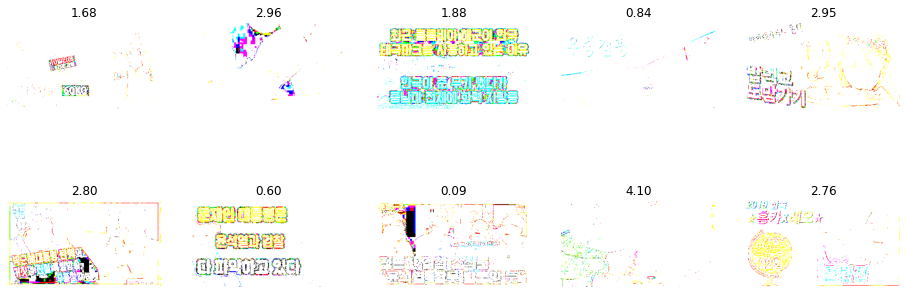

In [168]:
plt.figure(figsize=(16, 6))
for i, img in enumerate(x_train[:10]):
    plt.subplot(2, 5, i+1)
    plt.axis('off')
    plt.title('%.2f' % y_train[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)

In [169]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    shear_range=0.2,
    zoom_range=0.4,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(
    rescale=1./255
)

train_generator = train_datagen.flow(
    x=x_train, y=y_train,
    batch_size=32,
    shuffle=True
)

val_generator = val_datagen.flow(
    x=x_val, y=y_val,
    batch_size=32,
    shuffle=False
)

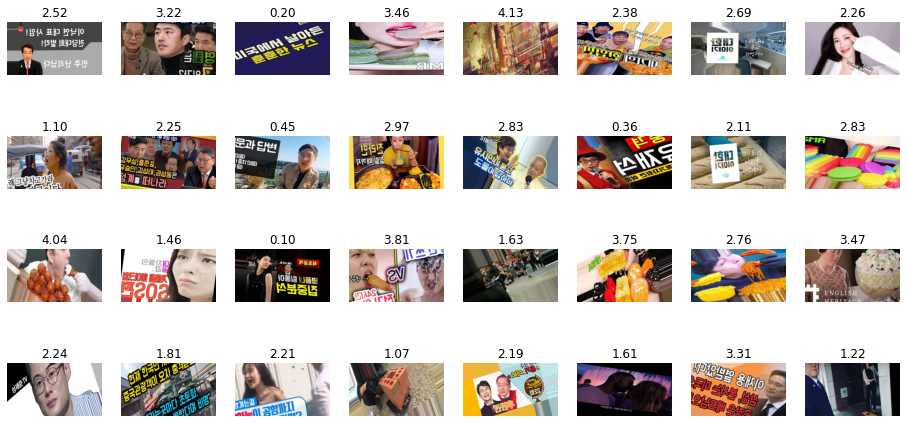

In [171]:
augs = train_generator.__getitem__(8)

plt.figure(figsize=(16, 8))
for i, img in enumerate(augs[0]):
    plt.subplot(4, 8, i+1)
    plt.title('%.2f' % augs[1][i])
    plt.axis('off')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img.squeeze())

In [82]:
inputs = Input(shape=(188,336, 3))

net = Conv2D(32, kernel_size=3, strides=1, padding='same')(inputs)
net = LeakyReLU()(net)
net = MaxPooling2D(pool_size=2)(net)

net = Conv2D(32, kernel_size=3, strides=1, padding='same')(net)
net = LeakyReLU()(net)
net = MaxPooling2D(pool_size=2)(net)

net = Conv2D(32, kernel_size=3, strides=1, padding='same')(net)
net = LeakyReLU()(net)
net = MaxPooling2D(pool_size=2)(net)

net = Conv2D(32, kernel_size=3, strides=1, padding='same')(net)
net = LeakyReLU()(net)
net = MaxPooling2D(pool_size=2)(net)

net = Conv2D(32, kernel_size=3, strides=1, padding='same')(net)
net = LeakyReLU()(net)
net = MaxPooling2D(pool_size=2)(net)

net = Flatten()(net)

net = Dense(256)(net)
net = Activation('relu')(net)
net = Dense(128)(net)
net = Activation('relu')(net)
net = Dense(1)(net)
outputs = Activation('linear')(net)

model = Model(inputs=inputs, outputs=outputs)

model.compile(optimizer='adam', loss='mae')

model.summary()

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 188, 336, 3)]     0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 188, 336, 32)      896       
_________________________________________________________________
leaky_re_lu_20 (LeakyReLU)   (None, 188, 336, 32)      0         
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 94, 168, 32)       0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 94, 168, 32)       9248      
_________________________________________________________________
leaky_re_lu_21 (LeakyReLU)   (None, 94, 168, 32)       0         
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 47, 84, 32)       

In [84]:
start_time = datetime.datetime.now().strftime('%Y_%m_%d_%H_%M_%S')

model.fit_generator(
    train_generator, 
    epochs=50, 
    validation_data=val_generator,
    callbacks=[
        ModelCheckpoint('models/%s.h5' % (start_time), monitor='val_loss', save_best_only=True, mode='min', verbose=1)
    ]
)

Epoch 1/50
50/50 [==============================] - ETA: 0s - loss: 1.1850
Epoch 00001: val_loss improved from inf to 0.97562, saving model to models\2020_12_04_16_39_19.h5
50/50 [==============================] - 64s 1s/step - loss: 1.1850 - val_loss: 0.9756
Epoch 2/50
50/50 [==============================] - ETA: 0s - loss: 1.0531
Epoch 00002: val_loss did not improve from 0.97562
50/50 [==============================] - 62s 1s/step - loss: 1.0531 - val_loss: 1.0692
Epoch 3/50
50/50 [==============================] - ETA: 0s - loss: 1.0380
Epoch 00003: val_loss did not improve from 0.97562
50/50 [==============================] - 62s 1s/step - loss: 1.0380 - val_loss: 1.0287
Epoch 4/50
50/50 [==============================] - ETA: 0s - loss: 1.0216
Epoch 00004: val_loss did not improve from 0.97562
50/50 [==============================] - 63s 1s/step - loss: 1.0216 - val_loss: 1.0872
Epoch 5/50
50/50 [==============================] - ETA: 0s - loss: 1.0147
Epoch 00005: val_loss impr

KeyboardInterrupt: 

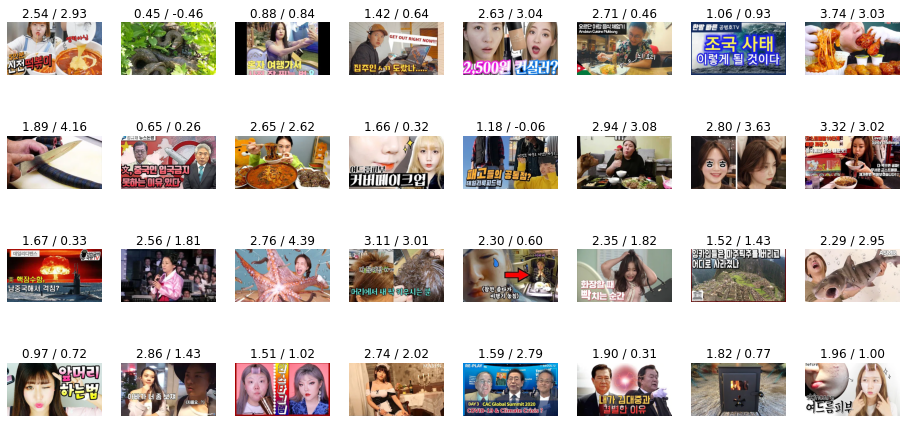

In [12]:
model = load_model('models/2020_11_23_17_19_13.h5')

val_data = val_generator.__getitem__(1)

preds = model.predict(val_data[0])

plt.figure(figsize=(16, 8))
for i, img in enumerate(val_data[0]):
    plt.subplot(4, 8, i+1)
    plt.title('%.2f / %.2f' % (preds[i], val_data[1][i]))
    plt.axis('off')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img.squeeze())

In [15]:
img_test_list = glob.glob('image/*.jpg')

imgs_test_resized = []

plt.figure(figsize=(16, 8))
for i, img_path in enumerate(img_test_list):
    img = cv2.imread(img_path)
    img_resized = cv2.resize(img,(336,188))

    plt.subplot(1, len(img_test_list), i+1)
    plt.axis('off')
    img = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
    plt.imshow(img.squeeze())
    
    img_resized = img_resized.astype(np.float32) / 255.
    imgs_test_resized.append(img_resized)

imgs_test_resized = np.array(imgs_test_resized, dtype=np.float32)

<Figure size 1152x576 with 0 Axes>

In [14]:
preds = model.predict(imgs_test_resized)

plt.figure(figsize=(16, 8))
for i, img in enumerate(imgs_test_resized):
    plt.subplot(1, len(imgs_test_resized), i+1)
    plt.title('%.2f' % (preds[i]))
    plt.axis('off')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img.squeeze())

UnboundLocalError: local variable 'batch_outputs' referenced before assignment

In [219]:
import tensorflowjs as tfjs

In [220]:
tfjs.converters.save_keras_model(model,"imageLeg")

C:\ProgramData\Anaconda3\lib\site-packages\tensorflowjs\converters\keras_h5_conversion.py:123: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  return h5py.File(h5file)


In [16]:
data = "iVBORw0KGgoAAAANSUhEUgAAAQoAAACPCAYAAAACwZUWAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAEnQAABJ0Ad5mH3gAAP+lSURBVHhejP11tBVHw+2N3jHuuOe8TwyHzXZ3d3d3d3d3d3dnA1twd9cACXGBuCcQCO4SIsSeeWf12pDwvO853/fHHNXLeq3V3fWrOaurq/8/Dx8+xPSK5f9NUyuXY/IZTUiampzA9CTfQ83MltN8/v+oFcswJbRynOU4JiWN/UNc73Kuf1ZTQuL7JYnPi9/z7Donub6nWi4+L9PUrCYnRCk+t0LS1HLxPn4XNbVc/I7Z38T1PpH4jlUrV8yK/03SxDMS371qasXs/+ZzU8uxaprvn1mJ1TPLsXZmAutZbly1EpvWTGHT2mlsXj+DretXPdX2jWuxc/N67NqyAbu2bsDOreuxffM67NyyHjtmtf0ZbeBzG6Ry+5Z12LZlDd+/hs9xPVvXcR1/a/e29TLxfbu53l2z5Z5tG7B3x0a+thF7t2/Cvp2bsX/nllmJ5c04wGVJu7bj4J7dOEQd3L2T5Q4c3rP9qY7s/U/x9X0yHXpGO/kctX8njrA8Isr9u2bLHTh64G8dm9VRvnaU75GVfN/ebdRWfv6JtuHo/6BjfE0mLu/fhuP7t/+tA9vxMtd98tDOpzp1eA9eObIHJw/vxomDu/j6Tn6W38//c5TfKXRkzzb+3638/9TuLZIO7hLitqL27eR25Dbdu30D9glxef8O2baUtiff+0/t52eE9vC9u7dzH1G7hLi//lPimNjBfSe0ffNabNu0RiYeO1upLRvW8Lha/R9ag03rVmPj2lXYQInyyfKGNauwfs0MNqyewXqhVTNYNzPN43VK0pqZSWq5dAzLNPFUgg9CEigMNVSekQGlp6kCXa1/SplSgr62Mgx0+B4dVRjpqsFQWwX6fN5Q83+WgYYi9NUVuT556GnIQ1d9KXQ1lsikLkcpQleN61dTnS353eqq/AzXq648+5tY/mOd+ppifUJKXKfyU+mLz/HzQgbqak+lr873qS2VSV1e+j1/i+ujDPhdxhpqMOb/fir+ZyP+N5NZScv87ya6qjDWVYGZoQasTHVgY6EHe0sdOFpowcVMA+7mOvC2MYSXgwl8nc0Q7GaFYFcrhLhZI9TdDuFejojwcUKUnxPCfRwQ4m2HYE87hHo7IMzXCcEsg2YVzPeF+DhTfN7HDkE+XI+3Fd9ng8gAO0QF2CM6wEFSrCRHxPg5IMbXHvEBTkgOcUdSqBsSqZRwT6RF+CA9yhcZVGa0TNmxASz9kBXjj5z4cGTHRyM7LgK58RHIiw9DfnwwFSSpICH4byWGoCApBPnJIcijcmfLvORQmVL4WaogOQyFKeGSilKptFAqRFIxVSrKVCollApDMT9bnBRM+aMkJQBlqQEoFUoJ5HLQU5WnBaMiLRAVqTJVpQejJjMENVmhVBhqhbLDUJ8bgZai2L9VGI+2kkQ0FcbxtVi+NwqV6eFcRygVJqk4KQiFifzPCYFUALeDP3Lj/JATy20X7Y3UCA+khLkhmRJlSpg7UsO9+LwXt7E30iO9uY19JKVxOS2Sr0V5Ij7EGXEhTogJ4T4KdkS0UJBMUYFCDojwd0Soj70kcWwEulvPygaBbrbwc7GBt6MlPO3Nn8rH0ZqlJdxszOBCudrK5GxtCicrE8oYThbGcDSnzIxhb2IIO2MD2Bjrw9pYB9Ym6rA0UZNkbqzyVP9XUAgJWOizsvwtVkRR8QkKAQcjbVYWHTWWfP8/KvF/6gko9AkJfVZSPYLiGakpUKIi/y0BCAM1fg8rsJHGszLkunRU5P4Hcd38rPjd4veLdfy9TgUCSPbd4jdIv+U/ZKipADP+tyey0FeF5axsjDWeyoFAcLLWg7OtPpwoFwdDuDuZwNvFFD7OJvCzN0KAvQmCnC3g52oBfyrUwwZhHraEhA2ft0KQqzWCCYxAV0v4u3AnEybioAj25IHgTqh48QDxIkCoUG8eNFSYr5A9wvxsEUEJQMQFOyFekjMSqMRgF4rLhEVGmAcywj2QGeGJ7Ggv5MR4IzeWB3qM79/iY/FcJqEhYJEVE4CM2ECkxQUhg8pPYgUnDIoSWGlYYfISAwkGwmJWhcmERQohMqvClCAUJQsF/jeV8PlSvl+oLFWUAayMfqygIagiKCr5nFA111PJ91YSEPXpgWjMCqJEGYim7OCnas4JQUtuKFrzwtCWF472fKogAu2FkZK6iqPRV5GA3op49JT/rW6qq5RlRSI6SuPQSnA05UehNjcclRn83lmVEUICYCX8PcX8X8X8TYVJAZRsO+TE+XN7+T7VE+g+0RNIPFF6FOFCUCSFE9phrkiIIDDCXBAb6oxYwiOG8HgKDAI+0t9ZUrifowQLSV6iQbHnMWILfzY6/gRGgKutJAEPHycrCRpudqaSXG1NCQ0BCSOZLIwICkNJDmazJWVvrgc7cy3YmGtKsmZj90T/j6B4KrbskkSrLiorK78xHYaxAAVlxGXx/P8ECfFeqYKLCq+uAANVOZnU5Ph4KSUPI1ZiQ1V5GLCiG7A0VFWEoZoin5fJRBJbcpbGlACFHtelqyGTHkEkPSYIdPm6jiqfe+oUFP4hAoEypBMx1qF7kMT/osP16yrBTE8FdiZakuxNteBkqQtnK124WOnB3daApJbJ3c4AHoSDh6MR3Oz5mPJ0MoaXs7EEikAnUwQ5mSPA0YxuwlxyFP5OZgjgc4GEh4+dGXzszeDnZMEdbEURFnQcQWwxQrwIE2/CgIogHIQi6SQi6TKEYngAxQbJJOCQFOqKFOEURIvGMjWcrRpbtnQuZ7HFK4jzRT6VE+3Jx27I5oGaI0RwZLNVzOLBmy2AERcggSJblARCGuGRHMX3xAewNWUFoZMoFGViMCs9wcEWX+iJAyhKj0ChaIXZIgsIlLPlr0jxR0Wyn6RKqoqPq1n5hWroAmroEMRyU3Y4WnMj0ZojxIrOsp1lW3YIOvNC0JUfjJ6CEPSXRDxVnyhLIzFQFo3B8lgMVcRR8Rgoj0NfWQx6S6PRUxKF7qJIdBZFyFRMlfAxn28vikJHSQwhEUlIhNNVhKGG8KnKDHqqMrqT0rQglNCpFPP/FPO3Fgm4CeeTJhwSnRRhmU9oCAl45HEb5cQFzjq0Z4HxBBQpkR5IppKi3AgLN8QTGkISLGZBER3ozNJVUlSAMxsINhhsSEJ4XIjGI8hDuAwbNkLWBIRMAQSFLxshb0cLHqMCFCZwpVxsjekqCAlrQzhbGhAWhk/lbMnnKQdLOmILbdjREdtZasFWlLPL/yMohP02FC35f0qVFpyVVaq8rIQmhMYTABgLpyEqOJ8Xy09afVHZjfm6KddryvebsLIaKC2BEVt/Q+VFMGMrbs6KbsGKbqKyFAaKi2DMUiZ5GCvLw0RZAaYqijAlPMSyMWUoQMDP6EoiAAgjAQYBCh1Km/HCQJtgYTT4pywNNWFhyD9vpgcHC32ZLGVytDLgxqQzsDV5Kk8HU250M5noEDxtCQa+z41uwt1GHx4SPPTgak2YCNnows1WD158ztua8KCEU/B2NIEXP+vP9YS6sQVwsuZjOhB7AsWVO5s7OYQOIli4DrYYkYwjUTww4gNdJCUEuiJRiAeNgEEaXYJQOkGQQbeQSUv7RFms3KLy5/IAzeHBmSXcBJ9P54GYwhYrjWAR78mN8SEgfKTPSC4j1p8Ht4gd/sjjwS+UQYAkhvBADuQBHcT4EsTvDea6QmmpQ3nwC4X5Ij3cD2nRgUiKYMWgMxGOoS4zFLWpfqhL8UFjqg9aMvzRmhlABUpqY0XsyA5Fd34EegujMVASh1627IOlCRieVS/dwVBpFMarYjFRHSeVY0LVQnEYrY6XNFwVh+FKmQYJjL6yWAKCMMgPQ3M23QjVQDdSx9/QkE1XQvi0EA4CEEJ1/B21VA3BVJ0lJIDBSMP/UJ7x31WWEYYSxhQhAYwiAkMmQjM1gjErFLkEhohxIs4JPQFFGgEtlBJFWES7I5GgEK4iLpQSkYTuUDQCMdzvT0HB5XAeD8JRBPEYkUHCVgYKNjB+bGh8Xehc2Qj5sjHyZqPkycjrYW/Mhkw0ZkYEhqFMjMOuPM5dCQ5RuvB4dqIc2RjaEwwOltpS+WRZ6BlQGNExGLFCCxmzUosKLkoTgsOEy1KLzgoqiQ7AWMBA2HnlJdBnxdaj9J84AuEQJJdAMCiz0irJZKi4mJVeTpKhwnwYyM2FqdJCmCgtkqS/RDxeDDOu00xZDuZcn7kKQcHPmggpECCUkSKlRCfyRPwOCS78bjNd5izCwNpEG1azsjahlTLmHycYrI11Ycr3GAjHI5wQZUAZ6Qh3pAZTbXWY6gipwYyy4rqcLAzgYk4XYU06s3QmaFzM9OFqrg930tjZVBfWumqwNlSFo4UmIaAPH1s6DgLIzlSTn9eBHyEhHIWLmS634VJo8b8b01G5c4cFER6+juaw1FOGqaYc16uNGNrNOMaHhEAnVnBXpIa6s5K7sZK6S5Ei/UmsCKdTEID4D1BkMCunsJJHeFjDzUwLFlqLYam9hFoKN7YccXQmIkOLFjCZ6/TmbzbTJMRVF8CPvz3RzxnWWnRl3Gfa3N4aivLQpHQoPW5zPSXCmtIXJeGtpqwIDbGfue+cuR3KmemFK+jICUJPbhAGCkMxWBhGRUgaYks+UhKNcVbsYTqAHsaH4bI4rOsowM7hBmwfrMPG7jKs7yrCivpUjFTEYnldMsZrEzFSnSC5CAGEPn6mU0CBUGkroCMheJoZIepZ4Wsygp+qmlGiOj0ItXy+ga835kWjMV+mhrwYSfW50ajJikB1ZjiqMsJRQZUTBv+pMuqfoBDxSybRz0JnJfpm6Lxy4hlPZiU5i2if/1egiCMoorl/IngMPJEECrpNGShEPBX9FVYEBd2oK12rC12rsylBYSK5Wh8RhSlPulzhdj0chQOmhBMmOITcCQ437msBEBc2eo5s7CRZ6TyFxH8DhZkmK4kGK4uAgOo8HvhzYK39Eg+WF2Gr9QLstF+Ave58PreY4JDj+5bCXFvAYCFdxgLYGxEKKvMIETlYqC+Gnd5C2OgvhBVLKx1KayEcdFmqzYORwlyCYA6iPfhDdOfBQvVF2GnJIdxZm8vzJXhYCFCoMg7wN+nTzRjT1RipsKRMKDMVFUJESCwrS+8153ss9UlDM1LS0pDWiRVVdDKa68LGSAvmrMzmfN1UTwdmBvp0FwaSxLK5oRCXn8hIJn1+vxGBaaWrAVcLEtqSboOlO7Oeh7BtRnp0RWqs9CrQJahMdJXhIVwHYWIhYhe3p5GmCqz11OBOsFgy9tgRPglhfjAhlAwZwxxNdWDBGGSiLfpA9Phf5QkfdVZ0FyTThqbzIMqgIxASziCdMUNAQriJDOEqIgkLAiKHB5+IFcJBZER4061YcftzG3Hf+jpa8SB0J8hMpNhooimPxGC6kQh/wo7/XUuZcceZB5c1K78A8iLJyZVkpKKzqRHtzY1oaxFlAzq4LNTZ3ITOliZ0tTSjo6UNbQ0NSI0Oh56CHDwJyK6CGAzT5o+XRmCiPArLK6IpVnhqBVv/FVXxmGLlHy6OREGQBfICzVEQYkO3EYplVRlYVp1OpWG6KQcbCIxlNSkYFGDIj0Q9Y0sNo0wdK39DVhgacoQzEJ2XIajNDJH1e1B1rPR1mWEERzjfE4nmAtGZGY8mlo35VN7fZQMlg4SARSRBEUEwUKL8h8qo0lmVECYl6cJhMHZJ4BCOIkQChVBuYhDdBUFBd5ZBB5ceI3MVIoIkRxEU4U9AITo4Z0FBiY7pCB87SZG+MoV52SDUk+5TyMOKDtQSwe4WbGgYad3YELmaMIIYUyYEh7EkH1djeLP0cjaSyYliZBbylKAhi84iQruwsXCmUxZ9b/+ExTOgsODBbsYW3J6tWnWON5Z1emG02R1D9e4YbXDFimYnDHK5OMWBLclctjzzCJQXoa/wElYPx+LDk9WIDzCGMV8LslHHtvFIvHkwBm8cT8RrhxJwencCDq9LQmqgAVTn/n/RXu6IT043c6d5INBOHsc2leHdQ9WIctOEqSJdBg+2hJAgrFg29vTUjnR6h9q4ehU2T6/CFqGZGWyemsJAawvzuz805Ola6ASczY0ICH3YsAW3MdYm1NSkCNVcXY6TRw/izLtv4+y77+ID6sy7b0k6y+c+PPOupA9EefZdbFm/Ghb6OlL/iIORNlwIH09mO1e6CBdWcD0FttJ6epgaH0FdVQV0WSltDbTZcqtJLe/KoQFM9PfCwkAXlnRrFnRn/e0NuHzhS2xcsxxKC+dCfdGLUFs0Vzpl+NF7byEvOZGQWYpId3Paexek88BJIzBSqaQgByTxcXqkOzJj2TJF0G1EuCM72hOFcVSMJ/LpKBL8naHNmOdkY4G9W9bh6ndf4sHNy7h+6TvMrBiBCV2TvaEO4RPAfSiHsuwMXP7+W3z52UeICw+F2sKFXH8cbl2+hL9++w1//iH0O/7482/9+eef+IsS5Z9//Inff32M29evMH+H8r8qSJ2My2sSMF0bh5knqhGKpxIxWZVIUKSgk7Eg3kkTkbYqCLNSRqq7EdLcjZHnZ40kJwOk8mAv5/+sj/dFdaw3quK8keljjTQvSxTzv5fE+aJIKMGLgAhAbY4ABx0CK3l7dhyjTgxasqLRnBONjuJEdJYmobUojtDgewgPcWakLjuc8UN0ZhIyjBe1uVGozCYYCJhyPl/B5Qo6JFFW8jMVfF2ojMslBJFMsrM5olM3V3R4JgchJzEAmXGMH1RWvEzpBEYqwZ4U7o4E7l9xFkQ6EyJBwkFSPPdzfKBMcYRGjK/tU0X72iDaR8haUtSsQjzMCQ+Z/N1MGUkIDsqX4BAuw5vOwnsWFE8hYUdXPCs3ugrhLAQsBCie6BlQCDtsTPtfmeGL7z9tweWvc3HjXDZufZeJu9+l4975ZNy5kI3zn1cjL8WR7mMhnAwXIsh5KS58XIAfL5ago8yerfocjLd44srnmbh/JRq3rmTiztV0PLiSivsXCnFocyJb1EU4uDUCFz4tw3RvEIpiluKr02W4/nktCuPNYUw3YaSkiP1bt+DBvTuSfnxw/2/dv4cf797Do7t3qNv48d5d3OEB+sap41BaQofDWOTAltnahJWTkLA21IQhIai5ZDEufvM5Hty9iZ9//BE/3XuIR/cfcJ1cH/Xo4T/04z389Og+zn3zBfycHaC1eD6cTHRkfQvWtHOWIoJoQ1NeDh319bh3+ya++vwzWJuaSO5Mn61xRnI8rl+5jO++/AypcdH8TwqSQzpKIDy4dxXff/MxXY4qNAkKbxsz3Lp6AXduXMP02IjUJxNES5gZ4o4sxoxMETmoVMaPZLZCaWyRhFJYUXJ4EOYRGqWJVLw3ytiCuZhoSafGjh3eh4f3brMS/8xK/Tt+//0xLl/8HpUF+dBdKgdfKzPCbin6Wpu5Xe7gIbdtXWUFNJYsha2RMabGxrBnx3bsonbu2IYdO7dhO7Vtx1apFNq1axdOv3Ka2+1H/PLjA5TnZUtuqjkvFBMExWSdTCsJiRVVMRRdRWU8JiqTGD2S0MZYEG2vgRALJYSYKyHYRBFR1uqItFJHgp0e4m11kehggFw/W6S4mSDF3RTBZmoINFFFuhedEitCJA/6eDdjpPhYIMnTHKXR3mgnHDoyohh7ktGZG4t2qpkVWziQptxItDB2tORFoZXAaOZyE5eFK2nIi0RjISFSwMdULV97ohpGlmpGlKpZVXB9ZYSETKF0FSHSmZ/85AA6C9HB6Y9sAi5bdCizFMqK9WcM8SPgvaXT1Sl0hqlUCt1hMqOIUHok9zkdYirdRlKwIxIJDKEEAY8Ae8T72yHO3xaxfjaEB6Hha40Ib2uEExhCwZ50GrMK9LBAABsdfzoPPymmyKKKlyOdMY8xmegq/gEKcVbP0UrEEN1nQSFcgoHyXJRneuLcxy1sgUpw7bts3Dmfi7vn03D7fBQeXY3Cg8s5WD2RjPriAHz7fifOfZLJ5xLwy9V49NXYMJ7Mw/ZpL9y5GIN71/zxzSdJuPhVCu5eSsCvt9Px/qkU2mBVHN8XiEtf5WLDWAjKkuTw5etp+PGHElSkW7LizIWe3AJ0N9bih+/P4ftz3+ISD+7LP1yQJJYvnPsOF/n81Yvn8dODu6wIP7FSfw5FVlxDDUVZq04HYMHIYWWgAZ2lC2GgKId7Ny7hz99+xsM7t/HmyVdx6shRvHL8KE5Rr7x8FK+denlWJ/D66VOYXMZKq6MFQ7bOHlZG8LY3Y54noe1N4MKNqEUgbFi1Cr+xIl794QduZBuYKItOXlU0N9XhAcF2/coltj6ZMKDDMNZUx2svH2SFuolr338BF8YkvcXzEOHhxN92BT+xou3aspGRRYVZXxPBDuYIdbKQFEIFurD0tkNiGKMGs2+eOCshFOtBR+GMqmRfugpvqWO4vrwYN69d4m/7BY9++gm3797FL48f8zse4aO33oGjsRGsRKez4lIMdbZL2/Ex39tcWwsdeUVoKyihMDMT09JAuAmsoJavWIZl1PjyMQyPDWN4dBjj4+MEyS6C4hE//zPK8rPZkCixMoZgrC4RE5KSpA7IkcoYScMV8RitTEF/aQKjRBTSvM1Y8QlHU0V4M6oGGsrDT28JIs01CAt9xBMYyczbSbTRCbTQQaZqCLfUQiVb52JxxoeVIIEtZhrteByhURTkjE7Ggva0EHSzpW9m5a1ma17Hso2VvZ4VuonAaGFFF2dbWugO2giMhmw+nx/BaEKgiIjDZQGOBn6mgaBoZGSpy4tBDd1JTU4UqrLpLggIWcdnCEoZhWRnR/wlFSb5IT/BR1JBoi8KEvykMSKFiaHIi2Ms4T4UHZ8yBXCfyjqUxbiNfL43k8BIYSxJptsQkqAhRHeZSNcRQ0DInIUVoug2IglToVBv2VgboWDCNMiT4rYJdBdn2GTydjL9ByhEf4UBXAkMqb9iFhL/DRQGGvOhp/oC9JX/C8EuWkgPt0B+jCUqEqxQkajPCu2F61+m4OGFLGyc5I4fCMLDm034+V4ufroZjd9vpqG70g42uvOxe7Uv7l1OxZ1LGTxg/yX1QWwaDcKjy0V4/2QKAl3VcHJ/GG58V4aN42HcmHI491EeHUsWHY0xdBc+D6PFz0Hhhf+NF5/7F55/7jm8+PxzeIHL/ylF+aW4eOE7/PaYoPj2cyhJoFCia9GGDaOBFVtW0T+hr7gEhsryUmX847df8NVnn0J56VLM/RfX/V//hReE/vWsnqdepLT4WRE7fAkJHwfRYWRGl2FO6upCg6BYPTWJ3x//gusXf4C/rSMsFEQ/igraGuvxkE7lFl1FbW4u9JQVYaClQUAdxS+P7uDKuS/hZW4C3QXz4WNjifts0X/55SccPXwAhnyf/EsvQp3RRGXeS1Ce+yKUqKVzX+Bv/l9QWvAiYaiOrGiCIc4f5Uk+qEz1QG2aL/J5cKnPewGTI0P49adHePToEVYxrgUFBzNSncEvP/+Mu9euI8zNhZBi9Jn/EgbbW+mgfsSfv/+G9sZGLHrueZTn5uPWtWuE8C/8f48lCPxGR/J4Vr/+/quk3xhN/vj9D+o3/ProIYqy0ggKRdRnB6OvMhbDtQkYovq53FsRM6t4dJcloqs4Hh2soC209NGOevAkJLy1F8CHpb/uYgQaKCDIUBFhpqoIMqbbMGU8sdSAh9Zi+OkroIyQKKZtz/OzRwZze46PPdJZCUoIig5W2O4Mfwzlh2OMQBorT8VAURIBlYFhLo/XZKG/JAlN6aFoIyh6+Z6BykTpt7UWRDCeRKGR8akhNwy1mcGMKaFcjkA93YhQXU44qjNDUJURjPJUMSjMjw1doKRyRiBR1vAzjXQlTUUCMlGoJ3TqBGSyYnmsR6E0lZElJRQlqVRKCMtgSWK8hhj3ksGImcp48k9HERfoODuwjst0FrEEg3AWUYwjkXQXEZRwFWFCBEWo1z/7NWSdoMJVSGfkCAtJjqbPdHK6Wus/1TOgMNKWh4HmIlayhTBWW0KbPJ8VfCFslOfBWWseCuIt8cMHmfiRMWT9eCxzlDG6m7yxbNCFbiEVj29ko73KDhY6dBRTXrh3KRu3L5fSsv9L6rhc0RrAeFKBMyfSEeSqgVf2h+PGt+XYOCZGwMnh2zPZuH8xlxvOCBrz/gumCi8xp3lhqL8P42OjGGPLNTo89IzGhgelodcP7tNa0yV8981nUCEoDNQUYM+KbSv6J8x0YGeiDV35RYSFHB7duYm/mLfv3LyBwZ5e9LS1o7utFV1tLc+qvQU9Xe2oKiuGpaHsrIaPjbE0HkKMixAbWvQQqxMUq6am+P0ExQ+X6TYYv5RUYTQLigf37+ImnUYlW2ZtZQXoaKjj1ZePEBT3cP381/AxN4UWgeBhZoJ7/G2PuZ4rdCBbN2/ExjUz2CT6ZVZNUdOS1s5MYxmjSUN5iQTDcDcbVCTzYE3xRW2GJxoymYmDnaG9aD52bthAN/Erzn/7NeIiwqAmtwSFaYyAjEm/E6wlaYnQWfAS1AifAf7nnxjH/vztsQSKhQRFX3Mr7t+6RadxH5MrlqO3pwtd3Z3ofKoOdHaxpLo7u9Hd0Ym2pkZYGxnAWofRg5WtoywaXQREJ+EgljvKWVJdlQnoqU5FX3Ua+qvS0FOahARGh1ALRgq6iSBDBQTqL0WIkRL8deQIDTk6jKUIMlGGn5Ei7BRfgKv6fMQzksTY6SDcgtHFVBMRlnoIM9NCJnN6VYQ9muIc0BrvgupwBzQm+KIvP5ZxJx1bemtwYFk7dg03Yl17Gda0FmNtRwkmm7OxsiUTy5sz0F0ShZG6FMIjHk05QagndGrT/dGQQ2hkBxEegahK85NKoZqsoL8lTsvmh/G/xqG/NhWd5QloF4O7ihlzGGuaRP+I6OegsylNDUKpGNAlBnMl+tF5+CFX9MMweqSJ09p0FCmEoVAylRjiIg2uSwhyklyFDCD2iPazQxQV+YxsCQ47gsMW4d62CPGyYRSxlgYCPpEYEOjH4/kZaBAWT/QMKMxZGSx44JnrqcJSVwlWBIedrjIcNJbClRYwLcwM376TirtfJmHTRAISQ62wdnkaju6Nw5Vvk/HzzWy0MHqY6szF5hXuBEUubl+tgfbSF2CpNh8TTf54dLEaZ09k07Fo4sSeENw8V4zVg4EoipfDpU8ycPvbDNo2YxgoLICFmhKO7d0htVKiE+03tti///br33osSvHcz5JD+OWnB/j8o/ehKreYoJCHg4kOHMzFeAk9OLEUp3W1lyzGrUsX8OvPwiL/IlWMn2nDf6Utf8yW/Neff8LPbBF/+lHoPh7Ril9gZW6qKoXmkoVwJXgCXSwlNyFAIRyFGkExMz3FVvVX3Lpxg8+7QEteHroqymhrbsC9e7elDsFqOgo1RXmYGhsw5hzid97DtXNfwcPQAEYLF0J/yRJcZox6yO8ULftPP/G38Xf9TEcgSfw2ST/jwb37+OTs+2xBPOFuoou6tHA0scVrzPaljQ5BGg8QcTp5/7ZtePzTL/jg7TcQ4GQLY3m20E72uH7pPP766zGaywuhvWAOlF/4F/pbBSge4g86h/aGBjqKF9BSVYPbdB6/PHiA0ydP4NDB/Th06AAOHz6Iw0cO4eDBAzjA5w4c2I8jBw/j6MFD2L11C3wc7WCuIY8WtqKdFXHorEpARxWdAytcF5eFumsYOxoyMdKUg7HGXPSVpyA70A5JbiaIttFGJCt+jJUWEu31EWqkjHBjFQTRXfgRHu46i2Cn9Dyslz7HmLIEvnzOV18ePnrK8NRWgIfGYiTSnZQEmKEyyAgVAcbIcNJCtrsRigJsURbihH5W0p19lTi8rBknp3pxeKINp9b0Yf+yOuxZVo19K2oxVhOPbSNlmGpNw3CV6Bz1RFGUDZY1ptB10BWke1HeaCREWvJD0FbIiFMQNqtwtIkBX3QnfdXJaC+JpUOJ5vORdCnh0inammwxOM2fgPCVVESQFRAQefHeyIn1kkCRHu4m9VNIsJhVEkEhjb6lZDHkH06DihHDwOk0ZNCQgSJCgIIK8xGXCdhJsAig83oKDAEKAuKJ/o+gsDIwhaU4TaivRlgQFLqqbBU0YKuqBEctgiLaAt99ks7KnYRVQ5EY64rAw1t9+PFuDn66E47H9xLYglrBRG8utkx6SKC4RVCoL3kJ5qqLsLw1GD9eqMHZl5+AIpDvycRXZyLw1lEr3L0Qg3vn00hWY+gvXQRzLS2cPnKMkPiDlfhXXPnhEs5/d476DufPfcsKfA7ff//drM7hi08+ZgvYCO3Fixh/1OEqOhst9eFpawIPcwNYqitDc9FCjPR04uw7b+GbL77AN19+hR/OX8Cj+z/ij19opx/9jGs/XMH3357Dua+/xrdffo63Tp9kvnMhZObD3UIfIW5WUj9BkKslPGz0oaVGRzEzI/UD/ErovPva6zh2cB9OHD1Ah/OFBLUb166gobYaq2dW4JOP3qNzuE4A/oQb338NT1MjGPJ3qdNV2OrrY/XoOLav3YCtGzZi8/oN2LJ+o7T8RNs3b8GWdeuRGR8LdVZyZ8K8kpm2i1a4l3l6uCQBybSYVmrKOLpnD+H3C149fJhAMYTp0gVw4/dd/Oozuqpf0FVbAS3GGlVGGgGKnwmovxgluukKVObOR5CbBz47+yHjx3Vcu3QJly/9gOvXrzDKPCDIHuLWzeu49MNFSZcvXMAP31/AN599gbyEeEYvOWkIdHd1CsGQyDKZ0KCt52Oh/jra/8YcjFCj1HBNGvIjnJDgaogQM2W6AyXCQhWpzoZIo7LcTJHmaox8wiTVywzhtpoINFNBkosRYmx04G/I41R5AVxUGUl05BFusBRpNsrId1ZFnos64s3lEG2mgBR7XZQG2qI9xQOtiY5oS3ZBN13CCLfdju5CbGhPx+7hAryyrgmbezJxdKoaB5eXY2t/Njb3ZqE+xQGDFaHYOlqELSOFGG9IRDsB0ZIbjI7iSLQWRklAEGoviZEAIYaJtxRES7GlLisMVelBqEwLYjwRTiJQupblSb+G6MfIjfMhKMSIWSrOD9mx4hqcJ0PFfZAe6YWUcHcJGBI0hMuYdRjxsxKxJMbfXgKGDBZPJDvlKqJIgKu4PsRYkrejEbwdDOFlbwhPOwPWG30e33qSngGFtaEhQSEchQoshGi1rXS0YKepBkddeSRGWOKbT/PYIudiejgOKWHm2DARiuO7vHDnQiJ+u5ONjkZ7mOrOw1aC4u6lHGbzaigtngMT5UVY1hyEH89X4/3jmQhy1sDJvX54cCUZ96+m4NGNWPx0PRIPf0hDeZoJbfMC2Ghr8wA/ysz8Bx7ef4DqikqkpaRQSZLSk5ORyjI1lcspiUiKioSTsRGstdTgJE5dWhvAzc4YbjbMXOI0KZ83ovU31dVBiL8fEmNjkRqXgJqyCnz24cf449fHeHDnLmaWr0BeRiYyuP50VsYgLw/oiQvMlBZLjiKIjkKAIpig8HwKimmpM1O0xo/Z+v/08B4r3T38+gsBxCx/88Y1trh7ce3K93zfQ8LvZ1bUnxlVvoWHhSkMFeTgamqMQDc3xAaFcFtHIy4yEjERkYgVZXgEFS4pisvhoaEI8vaCl60V3Zo8vIw00JAWipHyJEzUZCDFwwY2jDjH9+/nb/gFJw8cgKshXZXcPLiZzYLiTwKhrkpyFGpzX2L0aJWB4o/H0vgItcVy0FVVRWYSM3xtLVoaG9DS1ITdu3YSPvyvv/+O9995hxGtHY31dWimC2msqUNZbgEdqS4sddSkkYodlbTuDRkYqE9HL11Eb1WypH6CYaguU9JwPVWbjq7iWOQE2SKKEIiwVEOwkQKiGUXirDSQwogRb6ePDE8rJLubI8bJCImupmhi7GqmqqP9kOPnglRXa+SyxSz2tkCxuwGK3LSQaqWABHN5RJsqIIyxJs1RF5lumsj30UFZkDFK/MxRHmCDgaxAjOT6oTvVGSvLQrC8JAibWhJxcCgfB6idfVnoyXHHaFkQtvRlYm1XKpY30iEVRVAEdRmjRWG05KSEWov+hkYjQS5Ow4qL1ioIUCFxQVtZWghFZ0GV8nFxciAKEvyRH+9H+cuGhVNSR+dsZ6cAxhNYPJG4MO0JLIT+BoX9PyKIcBU2CGX8CHJj5BDXJs2CwucpKAzgNQuKJ7B4BhQ2RpoEhRos9JVloJAiiBrsKVutxbQrhvjw7SLcvFiFrvoAGCu8BGvl/w1Pi4W4eKYKv1xtQmetNwEzHzumvHHvMqFyrRbKS+bAmJRf3hrC6FGDD05kINRNHa/s88fDK2m4/k0CLnwSgHsXCYqL6ShPNYGhvBwstbXw2jGCgo7i7p07GBsZRV1NDVVNVaGmsgLVVVR1OZrqa9BYUU77FQAd+YWwM9WCs40hnEXHjIMpXBg/DBQWSx2Go73d0iXnq6YmsW56FfZs24ELdCq/07U8Ehb7xAlsWLMWqyZXYu3KFVizYhn6WhukUZiWmszNTmYSJEJo27wICm11JaxetUrq7PuNunDuPL774jOcY2W8JTpOGZvu3r6FDasm8eUnZ6WI9MdvPxGAP+PKxW8Yj4yQEhmGE/v3SE7nk7Mf4JMPP6LzEOVZqfz47Bl8fOY9fHTmfXx09iw+eF+UZ/DGyWNSZddn3Er2d5Ra5ZGqVCR62nCfaeHkIUYcguJlAsOJ0dKQ0HY1N8bFrz8nKB6ju16AQvRRvITBWVD8SVC00pnNe/FF1FVVSX0iG9atxaYN67CdseLdt99iRHkk/dfvvvoau3fswLo1a7B102asX70Oa6dWoamS62XMEgO+WgmvgcZMjLflY4jAGKxLlzRUT0fB6CE0Qo01ZmFFcx5GqlOR4WOBeAddhBgrIITOIFhPDuFGSvDV4rKxJoLNtOGsKYcg7ueSYE9URvqiJSUC5RH+KAvzRXtqOIaywtER54mRrCDUh9qjMtAGxb6WSHcxRLoznaHhfESZLaQWIclGEwmEUXWIHWqDLFDlZ4DGUDPUBxujOdwck4VBWFsVgYkif7TE26Ah1hKTtZFY35mCFQ3xGJgdIdpN99BGKDQTEE2U6KORzqDkR6JJnGnJiUQ1f5fol5AgIaCRGYbKrAhJFZnhEjDExWdFSYEonL3oTrrwbnZYvRifkRMvLt4jLKK8CAxPpAlFeD6NI09BESADxd+uwgZh3tYIEmc+CAkxitPXyVjSE1B401FIoLCTgULoP0ChDitDVUpED0VY6ivBWH0RTJXmwYRZ0FR1LpqLrbB+1AUO+gtgrUJQyL/A1+dg80gyPnulDYEOirDSfhHbV4rOTFn0UJEjKFQWY0VbGB79UIWPTqYjjKA4vS8Kd74rx66pUNRlyuP8e+L0aDGpai45ChNVFRzdvQv//usvVsLf8OODh7Tsd/Dg/j2Wt9j635Y6Ch8w0z+4dxt3b1zHR2+8zpZwIUy1FeHmYAQ3Z1O48o87m+vAWHkpdsxM4jYrrzQOg//5x/sP8cujn6T1//X4D/z52+/45cef6Qh+xI/3HhAcfN+9W7jBln+0tV4aJu5vZ4QoH1KaVPa01oOm6KNg9Pidn7156xY83d2hqySuPVFHH6Ekzjjcvn4dNQUFMGYr7+PshPfefI2t8gPGnq/gYmOBgY4W3Lp+WfpvPz58QAd1n+VdljdZ3sGjH+/O6p70mx7xfY/4329cvogT+3bR7Sgggju/gwdrR0kc4vjbjPkbDu3aJXMUjB6OxoQl94WzpTEufPsF/vrrN4K9ElrzGT1eeh6DHe346dFDOoVf0dxYDy3+1nPffStB7snYlZ+oX3/6URqT8ScjlejXeUj3dP/+7DgX/u77N2/j688+hYetBdws9dBVk47hlhyMteRinBpr5vJ/SDw/Qa0QZUM2OvOikMwKHW+rzYqsIoEixkwd4cYa8Gdj5q6jADvVhbBXmg8vjaXw0ZJHII9dd015gkQLhf5OKPAwQ3WgPVpp39vjCY8kfwxwvc2098vKEzBVFYfR/CA0Rtkhga7FX30hYs0Ukc1YXOTNeOJvgBQ7BRT76KEt1h7tcfboZFSpDjVBvrcmGhPssKwyHKMVUegvjZFAIRxFp4gZxTFoKhQXm0VI/RGNeRHSqNC67EjUZDN+5EZJZUVGKGq4XJsX81TitOsTYIizIUWpBIe4noRlvjSAKxAZYhwGlRnDSBLtgwy6i7Qwd0kiijyJH9JALUIiWpw2pZMI87REmJe1dBYk0M386ZBvadj3/8VV/AcotGBjqMEIog4TrSUw1p4Le9q1lCAdLG9xw47pcBzbEoBXd3rjxK5IHFwXgj2TgZjocEJxgiGi3ehCVF+Alcbz2LbcA3cuZjN6VBEUL7GCLSIoQgmKcnx4MgVhrmo4vTcaN7+oJmTCUZumiEsflOHBhRKCwhRaixdI5/brSopx+pVX8drp1/Daq6elZXHgCpsvyvfefQuvnDqO10+/ildfPo6Jnm5oLyEoeMC42OhLF8N4sGK7musSdApICg7Evu2bGQP24eihwzh24AiO7zuIl/fuwamD+yWJ5RP79rKFl+n4/l3YtnYl4eYIC3V5hLpaIC7QWboWw5fr11BVwvQ0o8dvv+HylSuws7GBmbomdJWV0cys/5Au5eaVq6jMzKarUYSpliZeP/myFE0uf/8N3BgfPB3s0N/RJk3QMzM1jZXLlmP5yCAmx/oxvWwQ0+NDf2tsCDOjg5JGCJj4AB/oyS+Wrhht4gHaWhqPOF976Msvxb4dO/H411/x/ltvcOdbcZsuQKCXM65cOi8Boa4oDzri9OuLzxFWBMWPhAAB0NJUjwXz5qK3qxP7dorJXPbi6K7dOL5XaAeO7d0uK8UkNru34vDubbKJaXZTO7ZhZV+31HkcwQNTuImJjgKMNGVjlPqfQDHG58epZY3ZmKCW12ehMNgeyY76SLDRRrSZKsINFekulOCnrwhXbcZAnSXwM1JGsKEKfLXl4EWH4ai8EK5slIL0lBg1VJHtaIh8dytWeAOkuRihLt5bGtzVlx+G3b0FeHmiEkdGy7CtNRcjOaz0eWHozfBBWSDjSIAhMlzUkGSriIpAU9SGWaIiyBQ5nrqI43N18Q7oyvMnJCKeXnPSWxaPnopEtHO5pSSG8SNKUjPjSEMuHQWhUE9Y1dNdCFjUigFe+THPSICjUowGTQ+j65BdV1I6e01JPp2FGOmZFR8oSbrSN0aAgo6C+19c65Mm+i5CXekuCIpAgoKxI0qcMqWTCPNgZGZsE0O/g9wtJFgEupojQFwnQofh9xQaRvBhQys5DOpZUNCa2hrqwEZfHfoqc+BovhQbV6fhh89K8Pg6dbsCf9wqxe838vH7/Xw8vpODn25m48fbuTj3aQ6m+4Jod+fDQuV57FjpwehBUFyrgPLi59nizcWyVj88ukJQnCYoPNXw2v5I3Py6EpvHab1S5HHh/Xzcv1CA0lQzaC1ZRM2HCktjAwOYGBnBiKWhvgGt79tSRDjz3rsICw2Gvp4OTAwNYM5crD5/PltSxhYtBbhZ6cPVygA+dqbwNNODpYYSNAkgfw8XdLe3ItDPDzqq6mzlNaSL3Gz5vy00FWGhpQQrHVWYa6nATJuvaatBV2UJdJbOg6elDuL87KVLuoXFExtYU00ZU1NTeEwrfunSZdjb2sFe34iw0kZne5u0gW9evsJ8mgMzFVXp+04cOUzXchdXL34Ld2sLqC6cj0UvPo/YiAhUlVXAWEcf8i+9AA3GAp0lC6RTnVqL5knSXjwfunJ8jqX+0oVc51JEedijOjsKDcUUD0pxEZkWndXOzZulYdXnvvkaUSEB0hiMvKxk3Lp5mQ7gFpLCAqFPsKrNfRFDnR2E1yOpT6WlqQFL+JtM9Nma1tWiKC2d8NOAqbISG4Ol3MdLYKnK7UyZc9mMMtWQlxyXuAxAf/Fc+FloSacRhxk3xlkRBSTE8gjBIakhSyZpWabRer6X5VRLHmriedC7GSHJQQeJtlpItNZEJN2FGITlpj0PfsZLpcFZosMzzJSug9DwptMIYHQOM1RGkoU6IvUZFRkXvdUWw1HhRfjoLkEgPxdrq4zqCDMsLw3ATHUElhdHYlNTJo6OVmFPbyFW1yViIMcXvZnedBCWaE90RX2ULSpDLPmbNBFlrYCSCFu05QZLl7L3EhTCTYjxF/2i81bAojwebaWMIlQrXV57WSKXkyTJBm/RdRTHo76AgCAwBDSEanJEDGGdyAhDVUYkGxjZ9SUlqWLyH3HtiOizkF1HkpcYJAMFY4fkKMLF4Cy32dOnjgSFOGVqI4EiUoCC4A52M0MQFcrlUE8rhBCkQuKaEQkarmYycNBt+AkRHM+AwopOwo62zd5AA3oLn0d3hTPu/lCNB9ezcf37fLx9vAT7N6Rh4/JQbJkJwYFt8fj4rULcvpKJ25dScOHTQsR5K8BS7XnsXOWKWxcTcO9aNsGzEF5WS3BwUxB+uZWD916Ph7+PGk4cCMONb8uwYVz0/C7B92ey8eD7PJLUAorzXoKlkS7SkmKRnZ4mdVzmZWchMzUNX3/5FQ/+3/Ddl1+jo6EJOSnpKEzPRl5yOvKTUmGto0PQKcFSR53WlzbKhpbKxoiPVaHEyrN53SpcvnSR7uQUli5aDG1lFeiI8Q3K8k+lq8SS0lSQhxadjRk/G+RsiWgvW6RyJyQz88YH28LP1Ria6kqMHtMExe+4c/sOgv386cZ0YaZviN7ubla+nwiKS6jOyWBFUpTix8uHDuDnH+/z+R/gZmEGFQJsyYJ5+PKLz3Hh/Pfoa++CLp2KuCrXRLqAS5lOREUmTQJMiyAjcFxN9JET4Yu2wgR08mDsou3tKE1ANrOr8rznMDHYJxuqTgCIU7ieHq748stPGWHuM358CRdrS+gpykOFUBgQIzMf3cfvv/+MhqZavPDSc2hoqObv+QbvvHaKcU4DmovmwGDxHBgtYbnoRRizNGQpntMnvEzkF8GQ+85abiFqE0KxUriIhnRMtOeivyYZg7WpGCUYhEYYMYbrczDEcqSZTqItF8vbs7GiIwszXbmoS3FHqrsOCgPNkOmmw5Zdje6CLbydFkKNGUWslJHtaSR7zkELISZL4ae9AHEERxIVY7gUoXQd3nQY7oqL4K60CN7qS+BPNxKoMw+RxnMRaTQHUYZzEaQxj+VSxhQnjOUFoyvFDTXhZhgr9GU0McWO9kRsbY7FuupwTBQFoCXJCS1pnuguCEV/eSy6y7ntK2ZVmYjOigR0EBRCwl0IdZQnSm6vqTj2b3Gf1Yuh4YwlQiKOCFVlCkiESn0ZoqxMF6dRGUWSglFIJ5EjphBg5MiO9JZcxBNQJAU5S0pk7BAjN8VQ72g/a0QREpFeVogkGCLoJiQRFJGefN6DEKHCPaxnB2SJeVGE47Ck45C5jmdAYWGkBFsTTTgYavIAeB7r+v3x++1C/HQ7GdvXmsKBO8dEYzH01RbCUIsHhc4iOFvJ4ezrvvj5ZiruXyxCSaIezJWew8ouO1z5KoHxIxYXPy7D1c/LcfdCNu5dScRrJxPg4qKEY3QU18+XY/1EIGkph6/eTsedb/JRlWWDhNAgnGeOvnHtMm7fvIbbt26yvEGHclUaA/GXNK7iMR7evc/nb+GO0PVbzPk3cP6rr6XIosaW0tlC9NoaMW8ZwUKXoKBDOXpgj1RRzn37DRwYE0wNDWFuTAdgbAgzluYmfC9LS2Nj2JiaSVeXigFcVjqKiPGxk67kTA2zR2KoLfzdTaDF18Scob89/o3W/Sd89ekX+PTsx/j0w09w5YcrjEm/4cr355CbECNdSSqm2jt2YC9+Zra/euE7gswSmowOSxctJGhuSGMm9u/ZA18PN9iYm8CWIHkqcyFzRkJzOJiZERwasNdVQT0Prj62YoMVSWzZkmhtYyEmBUqNj8L5r7+UYtH9hz/i8rVrXP+P0rUz29avJdC04GRmSlgqYqhHOIoHUiRpaqrDSy/+C4MDXbh396YUVZJiw+HrygPPxx2xvm6I8aa9DfBCgr8H4v29mIn9GHm8EOJgCytFBbjqqaKvMomgyCAQUhkxMrGsJYsRNIciFOgaljXnYbwlh24zB5OdeVjdX4gNQ+K0YzGqaO1T3TVREmyKfB9GB0c15LjpocCDMddEDgmWiij1M0eRtwljggVSHDX5uj7K/SyQ66SDLHtNJFuqI9pIQIMugA1ghK4SXcYSJFkqII/xN9NBEQkmi+Cv9Dz1HCL15iDNTgmZziqMHUpojLNEWZA2Vlb4Y21VEDZUB2NDXRTGi4IwWBiKobIYDFQmoL8uWVJfrTgF/Dck/gmK9rIEOot4NBbFSK7vieryBCRkgBAdndXizIiAQ0awNLJTnEoVs39VpBAWdBFF8QEoICjyo3yQG+WNHOoJLFLEJEZsyKSrjkMIi2AxetMOsdLozVn52nE/UT62FEsve0nRXnYIFbAgPP6GhYWkZ0BhZqIEa1NN2Btqw3jpi2jJt8JPV0rw8HICvj0TSfvogeo8D+RluKAgxwPlhZ7obHDHuY9i8NPVHFz6pBCR7io8SOagIMQEFxkl/riZj5+vFuLxjQK+JwuPrpVh39ZkmOgtwOG98bh2vhbrlos5F5fi3JkS3Pu2nhvMFaWZabhPQPz7j8f491/UH79SP+Pff4ryF+Dfj4G/fuNrf/C53/Hvf4vyN2nEpTirMDbQA0Vmb3tTbbjZ6kuTy5jpKkugOHZgFyvEffzIyvL2G6/h7bfexHvvvoN332H53ls48/7bOHvmHZxltPnw3ffx7muv0paL04Vz4E47nR7mgowoZ6SEO3GjWjC+LEVjbQUe//wz/vz9T/xF/fuvf/M3/Rt/ifKvv/Ah1+ttZw59ZUYpDRXs37kVj+7fxrUL38LF3AjK81/g752POzeuSiMjBRS//PxTfPLxB/j8s4//1qcf44tPP8OX1BcffYTJkRHGJlXuZGv0VaeivzIZA9Vp6KnKQICjMXSVF9MptEqu4t9//sXf85c0RPvd107D38kRhnQ4WYSJutwi6X0/PbyDPx4/QktdDeY99y8MEx7igjIxoE0MBLt96zoe3L1FQN/CA0Lt0f07eHTvliSxPX/ke+/cuILq0kIYMOpVZLEy0VEsb8vGys5crOzIxXRHnqSZznw6hwLMdOdjVXce1nTnYn1/ATYPFmJLfz5KIyyQxApbFkwY+BoREHqoCDBDhZ8ZUq3pJhw1uGyO9jg39GcFIc/bGLXh9qgNsUGJpyHKfIyR70Jg2Ggg11YHmVaayLBU5WNFVPhooS5YF1X+Wij10ECs3jykMWqXe+siw0kZUeZ0JjZLkOWjjXhHBWT7aqPQTwslvlpoSbBHf34gxirjMNmUxbiUjgGCcKCB219cCft/BUUcmgQc8iMYM2aVS+WIwVdhhEQoRReRGUxQBP0NCjHuIjUYZUmBKI73k10pSxXG+iCfyp0dc5EuLiYLfyJCI8yJEcQeSYTG05GdjMzJwQQJlRTojHg/voeKETNo/b8BhYmpBltTbUYQbZjwAHOkPZvu8sO59wpx83wVrn1Vjx8+q8a5j8tx7os6XPi6AZe+bcCVz6vx2SulaM5zgbXqHDioL4SLxlwkeahitNqaB4UHptpdKRd0lVnB00oBSvP/N5rKnfH5O90YbAyEi+kCHNlUjI+OtyPJ1xQ68ksQG+iHitw0tsSRyKPyEyNRmBTNjRKGzJgQ5MZHIjM6jHEjVhqKXMBSLEcG+Er9LcaqS+BuqQtPGx142+vDzkiNlX0Bdm6cxv07V6UK8ctPD9nCPsQvP/+In3/msqQHUvnLox/x6wO2vrdv4cuzb0OV4HEwVJGGy6aFc2OHOiPa3wHWBupsmTXR09KEg7t24si+vTh28CCOHjqII9Te3TuQlRIHbXl+3kSDcWIJOppqcP3qBXz3xYe0/nLQWPQSlBfMwaXzX+MRK6Fo9R/9+EA6AyJJLNMFScv3ZWdrHt6+jdePHYMj3YWbmSYtbwq62YL3VKWiuyoNVbSyjiZqdEOKyExIwN5t2/Ayf9fU6DB87G1hoaqAzHBf1OQmQVthEVqqy3Gd4Lp+6QJKs9KhSEdRzO36/Tef4/aNa7hO3aBuCRHi4tSvVN68ymXquiiv4Orl8yjJSYehmrx0ncNYczqmGCUmu3KkSLGmJx+rCYe1vflYP1CETcMlVCm2DJVh00AJNvQVYbwmCXlBFsj0NkJJkDXKg21QGWSDKi7XRzgg25kAcNJGLSPgeEEUNrcVYFlJAgZZyTri3dEW64zWaHs0hVmg2lsPdb4maAmyRFOgKRoCdDGYYoWhVDP0JhijNUwXlR6aKHdXQ1esGVpiCCY/HSQ4LEWuvyHSvfWRQVAVh1mhOsYeXTmBdBKxGKlOxkhNGvpZ9vL39lDd1Yn/DRBtQqKvgqU4G9JYwIghRmXOqqlQPBc9C4oQSTWZQdJEO5Vpf4NCgkUa4ZEaiNIkP5QmCvkiL5aNd5wX8uPoLqI9ZIrxRGaUGzIiXZEW6UK5IY0QSWEjlyqGhDOmxAcSDn72jCV2iKYiGKuDZyOHrKNTjLMQ1zT9Rx+FkZkuTE3EMG5d5l/mYvn5MFr0PCKdF9A62mDndBCOb4/Aib3UwRgc3B2JdZN+aMg3RoD1IpjJz4Gdpjys1RbDQulFmMv/b5gs+d/QX/CcJIMF/4Lu3P+CpSrXq7yQLeF82lddOBssgo32i/AwXYhY7nwrZcYapaXQXboAWgtfhObc/w2tef8LegvFev4lSY/r01v4Agzl5kBn4fPQX/ySdCGZrijl5vH3L4ULY1SQsymCXUyZvcyk6enMNOQQHeCGkwd24PMP3sZnH7zHiPC+pI8/oEQ5q0/OnsEXZ9ii02101JRBfdE8Ak2DoHCU5oNIIpETglzhYWUII5Wl0GarrC2/FDq08XqqStCmxKlTdYJAU3Eh7I3Z8vs7spVfCH9PF2na+cLsJGjO/l59+QUEXyh2rJuBmC5/364d2L93J2MIJUpJu/j8Llb6HTiyezfyU1OgvnAeUphLOyue2F6RkXnQ1qYToMGw1lPgb+O25G/TU1GCDn+nmbI8skO8MFSbx1YuFY5GmnQ2hti3aR22rpqEvb62tF3NGF9ig7yQlZqItNRkZKSnICctGblpScjhc7npybKSyudyfmo8MmJDYagsB2cjdQw3pBES2ZjqzsY6OoX11Dq6hvUDjBiDhMRQMTaPlWPreDXjhlANQVKG6mR/lER5oDYpAJ05UdIVoM0JfqjigV5FSBf4WCLH05SP+b/5HwdzY9CTEYa+jBD0p/tjKNMHk8Uh6EtyQG+sDfpi7dASbIKJDDfMFLhjT2so1lY4YXWpA1YXu6I/zhzj6bZYVeSC8RwHwkKcAlVHET9TGmmHTH8L1CR5o6swCt3FsejnNpa5N7qIGgKagJBUNds/UfYPUIjrO0SHJtVcLC4ME07iv4NCzKHxxE1UZwSihmCoIRiqGUEEJMRzQlXpAQSF999K9UNxkg8K4r1kQ8DjfaQh4NkxHsiKdmej6o50likERVKoiCOyU6fiStNwLyuEEgxCwQSDGIQlOjSfSHRmijMgz4DC0IyRw5SgMDZgy2cIW20V2KovhrnSSzBY8hIr7RyoLWTLt/gFKCk8D0X5FyC/+EVoLX0B5urzYSkgoasJW0MtOBirwNFYCXZ68rA3UOWBJw8nAzm4GCrDSU8F1poKsKD05V+CqeK/+Hmh52Ah/zxsVBfzINNm660OBwMVuDBjOvJgdzZQkj7vxgrnbqpOt6DNSqoDNyvGCy4LedsZws/RVPrD0mxA3BAhXpaUhbQx3My1eRAvhNKCl7B0vtAcai7kqCXz5mCJKGcfy82bC/m5c7F0Dv8z3YSLuY40diKOOU9MgS/mr0wOYS4M8UaMjyuCnWwQ6GAOfwcjBJLEAc6CxqYI87ZBDF2IOK0lJHqVNRXm8Xufhxph6G1vhNRgD/hZGsJUSY5Amg/FRfxefqcC4SQkz2V5Og4hBS6rLp7P9xG2KgrwtzFES16M5CbEMOkOHqiix72rhgdxfRaXU5AX40/AufB3O6A4wR/dZSlY3pRPUGSwNcyQRgBa6ShBYQ73K+VI95Ud7QZ/R31Y6qnRManCUEsNJpSVphr332w5+9iSpbW+Jqx1uK901OBjqo/ukiSs7mOs6M3G+qECbBotlrR+uIDgyMI04bGWjmL9SCU2EBAbhuv43mr0MTbVZkVjVU89DsyMYMdYFzb2NmCmuQwDRamoivFDeaQ3ikLcGA1skUf4loW6o45ZPd/TDHWMHyPZ/tjSnIQVhf7Y1hCHtyfrsL8jE7tbk3C4NxnvTOfhtZVJOD0Rj71tAVieaYOJdAvsavDBy33R2FLri6ZIPWlwVUeGD1rYwrfli1GW3K7ldA+Ech+dW191Cvpqkp8BhTjj8QQUnSzF8G2hJ9d6NBEUDeISdkKnoUicKg2XrkKtIyjqCI56xhEx9qJezOMp3XqA0OD312YFU4FUAGFBaBKIAhoVLCv5HgEZ0flZkhyAXDoMoRwqmwBJpbtIJFTFhDhR4vYO/xiAJUZpConjVBre/Q+J50UMeQYURkYaMDbSghmjh5UBxZ1uraMIc82llAJMxczVLA015WCoswTGunIw0VXggaQEWwM12LNVErNXOxA49mYaLMVZFAKDttjJTBXOZipwNtWGi7EOoaEJRwEUfs7RUEHqKHU2kZeWnQgCZ0sdOAsI2OjCXZIOPFh62upJ8rLTR5CHsEeiMoorOk1YMcVEteaUhYyOgpIehISn7DLbcPGnWUk9bXVlv8lcj+s3hJuYaNTKWJqd2NmCku5/IGYnNoSLhQlczY3gRwDE+Ir5K5+Mp3dFYogHksPEMFpvpPLAlSZOjeJjMfNUvAfFncRKWZASgmK2dqWZVFYECtNCkcz3hHNnxYW5ITclGOXpUahICEcO15fk78rv8EQClxMivBEf7oFoVvK4EDFtmhflicRQfncoK0Z8MBrzE9BWHIduAqJHuiIzGT21aeiqTkNfXSYG67IJhHz0V+WgtzIDgwTDaF06JpoyMcJYMNiURtucTOsbjrwotkZRvtI9L8Za8/h8GsGTgpaSZDQXJqOlIBHt+awIBawspfxceRbfm4KGPD7H97XS/gsIjdTkMLYWY+0QXQTBsI6gEOWG4UJsGinm40JCRPRPFGFlO6NGYx6WNYrHVVjbX481/Y04sGYUJzZP4fCqUewZ78L69hqMFGegMZ7WPMpPGlSV4mSKXG/Cgvu2xM8B5QRydYgDJlkxNzemY2tzJo4MV+CzHePUGL7cM4YPt7Tjy70d+HhrBT7cWIhXxhKwpdoDK7JMsbPODadHY7Cz2Q8D6ZYYyffEYGEQegoj0MHY0EUX0VGeIF2rIvqExFD0nqqk2bMdhAgl9kM339MlYF0uYBFLcMRKoGgT41wIi3Y6i046DHHBWI90ub3srJUYLCdGdkoqjEZzLqEhLm0Xl6oTJPXZIRIwmmYvKqsjTMSFZaI/ozxNQIPHWpI/cmI9pXgs+iiSw52QwG0ST0gkhIhl2ejNuCBHaW5OMZHvk3vCxDBKR4s4Iq4JkQZosaFlPXsGFCa6bDF0VWHKFsSMpTlBYaGrAnNdZZgRBub6Yj5KykAma7bwNmzh7QgIcUm3PSEjMrgjIeFkJnrThTRY+dRZ6VThYqnBVpmV08wA7mb6lB7cLXThYU1nYK0lyd1GG662hImdLlwd+LqTITxdjOHtSgtEKPgSAL5ilp7Z2Xr8+bw/Xw8mIIRkoKDYootWXTgLceGLcBfiEttwb9FRY0KZS/fZCOY6Ivl8hBcJSqKKaBDu64zIADFVOitnkDviAl2Z5+gegt2QKiooW7JkcZOXSDFRqpgD0QvpzInpMcyBsV4UbV8KiZ7qKwGiXIy0y42WZj+qyOZydhSfCyE4gvl6KKpZKetyE9GYkYDa5DDUpkUxy2aiNj8ZdcUpqC1OQENxIlrLU9FUygpbnowmcWaDrVsLH3dUsDJXpkiXMYvz+OL0XDcP4i5KXHQlrswcqc7BsoYCrGguJCQyJEisaM3CeBuh0Z6GMZbLWsSAp1ysbGbep9tYxgo83VPKiluB9dTaHlb8rkKs7SzAGparCIL1Q7VY1VeNiY4SjLfzOzpyMdNbQQhU0jUUY7o3j49zJFchtG4gD5uGi+gg6CQGyxhBqtFZlICmzEhWxmTsn+rD23vW4E1q98peLG8sxlB5JmYaS7GhpRIz1YXoz4hBBUFdwH1W4ElIsMUTkGiJ9UcZD/SKAEd0JwVjinBbW5uFgyP1+GL/Wpw/vhnX3t6P86fW4f6ZLbj3zhSunujHt3sasK8tCJM5Ztha5YhTwxE4PhSFmQp3jBZ708UEobswXNq2otNSOAhxqrevOklyFL0ERTdBIdRD9RIUTyROm3aWC1DESO5CqItOo5fPidsKDBHsw3Qhg1xHP51In9iHhFw339fDeCPuPdJRFIN2xhMxC1eTmECH8BDDwRsYyerY8Iih4CVJfowcsj6KrCg2VHQQ6REuMlhEOCOJwEgKdUYq40daJI/VSDrh2etDEkJdCQvZFafi6lNpgBYhIQ3Q8mRDy7r2DCjEQCuZNJhraSMlaRAEWtL4Cul+F2KcxawcjAkFyslYD86MKy4m+nAzpQsgINzNdGalJc34LMUEugQvcTWnFUFhLRsa6mOnB19CwZelj50YHGUoXcUmze/nYgpPlh50C150C0LiWnkxu7Cvg7E0xNTH3oD22PDvwSFidBklOmHEoJEgcZWniyXEjXgCGQVCCIYQd1OEiw1AiIQQNCF8XzBfC+NrAhzBHrbceB5IoTtIZuudHObBFt4FKUHcyMHcwIRHSrCYFVvcQ8MVWTGeyE0gLKJEJxEVwcdiTgGSvShF3DAmEIW0g6WpwbSI0RB3nsqIcJLmuMxlC17AFrwiPgL1KUmooqtIDXCHna46jBXFcHFzlBMutbnM6TzwS9LFfIxcV1YoYZGCtso0tFexxacdrsph9s0OQ7s44OrTMNhAgBRFoI2tUTPdwkBFKsbqs1n58rCiJQ+THQVY2ZmD5V1ZWNGZi8nOQky2FUuOoTQxDAUJzPu1rPhdZVhDSIiOyFVdrOyME+v7igmbbKnjtJeuZbyTrqCrAEMtuWgsTJDuuNVOmE0QHFMCFv1UX67URyH6JjYMFkt9EluH69GUFYl0Hpxh1npIp92tSQ7CREMetgw14tBkL9a1lWOkJBWtSaHoofPqSAzGOB3NQGYMevlYgGOiiNshIRhdyeFojvZHHd1YP4HblRqKEYJodUMh9g224L2tK/D+tnF8f2I1fv5wK358dzUuHuzBicEk7GkMwCEC453JZBzsCcFQljkG8tzQR0fRVxKFgaoECQ6DdakYqOH3c/lvJVIJ0nvE3BX9QgIadBU9BIJQLyt+XwWBQJAPiVsLVMRisCyKipbuRyKAMcJ1jdYS8HR8A6KTVMBGggUbhYIENObGoiE7hs4iBrWEa1UaXSq3l7h3S644nggKMSWiNKOWdFGZH49NP8im3/NCBt+TEe2FzGhx1zIey7MDB59cQCZKyU0QElL/Bd1ECBvoZ0DhaqEDF3GxjakubPXF9O7qsNDWgJmmCix1NegetOkW9OFsbgAHUz2CQksCi5WOJqy0uayjzSihBS8LPfhZ6EuZ24PrsjdQJ3BU+T4V2OmpEy6acBX3xbDXg7eDgAXdg7mWNFu0tT4zrognktPg58V0c7aMB3ZGjAkG8LDi9zM/W2sshZWGHNetKDkSTwJDTEXu6UKouJrAhwAQTkLcbCfExUqaMNhaUx422ksJNRU+VmRlVICriRpstRVgq6UEex0FmKktgqW2ohRjBGHjg11IWAdp+no3xiRXOi03Oi43/k5n/l5nfSWEOxkhmQe6jzmhqqUoZXR/ayNKH74WWvCh/BijAmwYl1jx/SyNYMdI5yLWwe91UJWDn6Euoh0dEWphDHt1JbgRvonebrBSXAInfl+IvT4SvM0JYzo9zSV0Zqp0OY5opNto44EXRofkyjjlZqKJQEdTNBUmShcghXEbO6svgovWUsQTjL2lrLx0Gatp+We68mn1hQPIY2vP1r+rFJWMSQ7aKtKUgQbKCvDmPuwuScHavlLpfdPdOVjXX4au4mSEOphKtyrwtjORItdAS6E0Hb0t97WYWdyT/78wOZCuoghbJiqwldq2rBKbR0qxcahEcjV9hMlITbbkeHoYYVp48BdH8WCnTS4IcUQpQVwd5YkmHvAt8f5opdriA1AX4YGmGB808HvrGM06k9jqEwp9BFR/RgS6k0Mxzki2rCCeYkVNCcdYbjKWEyjr6nKxvS0fry6vxseb2/H51ja8OpKD14Yz8OZoBk4NxeK1iURsafEjZHzoKMIwwAo9wMotRl/2i3ET1GBlEoboBEQFHyYkRmroDlg+0RChMcjXBDz6WQ7VpGKQDmSAnxmvS8Eo4TJIpyGJoBiS1sP11aZI7xfRpE0M/85nIyIGYmVEojYjioAQbiJuFhbRhHIYysSdzBLZgEh3Y5PdrKhUuj2juDmRv6TceB8CwpNOQ3ZPGAGJZHFdCB1YLCEhTXpDSIjrQsSykLg+RDSqz4DCkxXWxUJT6m8Qd+PSWLIY6kuWQG3RQqhSesrysDUSk8CIexYaQNwESFN+ARQXLYAyX1cRk68oL5V60AN4gPkSKNZaytLZAmWpg24+S9H7vlC6AM3FhjHEVgwbV4KO0kLIz58DpYXzoLpkgXSgCbC40IG42hkTKsJFmMGDrsaK7w22MkSsqw1sWGmcWHk86ULcGUHc3Ezg6WEGH3c6CuEeXK3gLK5dUZiPaHcbOBAG5srzESZmqaLLMV46hxXSCaXx4XBnjBJ528vKGDaEiHRhDSOHN+FkLD8HgQRpgrM54h1NEE8HEi8m+tBXga3iXLioL4G90iLkh/ghyd0ZBnNfgoXcfFZQ/j6NBXDRWQJnAshw/lxYKCxFQ2Yiop1o7VjRVlTmEhSaMFw4H8EmeohlxVvdXo6P92+Q8rg3I6C9yjyYKTwHJwMNxpIU/iZNWKjJMZOG8oDwhd6SOQhxNENhbDBMuZ9CnG0Q5W4nAa0rPwUlUYFwUJdDUZQ3ZjoYGfpL6BLYytNNrO0vxBqCYLAmC27cVm6mxli7bBQ9TfXQWjAPaf7OWNNbjqn+Akz2FmB5awkbA2Ooz13AOFRL2DtK0/LVFKcypqog0tcbKwb64GZtTgeqyViTix0rarB9eRX2TtPmU5uHy1Cf7i9NhJtHF9ZTmITtg614ZeMynFw/gn3L27CB4Bqk3a6mha4MdmS8sCYUXNFBp9YS54O2BF8Cww3FvlaoCXdBDa21WM73Muf7HegIIjBDMG6oScdoZhTGMmMxlsHWOdoPjXxvR7QzBpLdMJnnj03lYdheFY6DzTHY2xyEs2tzcHplCkYKvNGdGyzdmUx2JzICgGAeJiRGqpJZ2VMwzso9RkiM1wklYll98qxSsIIwXN4s07gYeFZHp0enIFyD5BxqBDiS6TgSpLuWtRdHobWQYMgJRl22bOq9mqxgabo94SDEzOJNYoLgvHjGjzhJ9bkEBuNsNZ1ZzWxZRZXz2BC3cRRzW2QzHkuzZXH7JYcwitBFCIkRnPGMa+LisSeuQjRAYgi4iCFPYPEMKByt1GBppAhd1UUw0FRHXUkJPnnnfXz+/vvYsX4dDLW1YaAhLkPXlW4AbEjHkRwTgTdOncDZt97E2qlJ2FqYsJLLw56AsGSpKy+HqOBAvPLyEXz60Vm8cuwIgjzcoK+iIF3CbsMDU1tcJ2Ckj337tuHjj97Gy4f3IMDThRBaBCu6Fk86Ai8nc2nWa0dNtraaijixagLv7dnIltZCumGNr6sZvD0t4ObBeOJlCV8uS30Y9qZwpAtI8/fA2aM7sba3kU5AC3umhnB84zisVJXYQrbgq9cPkeZZ+PDYdpI7EZbqixlXTBDryxjAiupvqYvPjm3D9XcP4tqbe3D1rd249OYufH5kPSKtjGBJGKa42+O97dP46MBGBFmZ4ZUNY/ju9GZ8dWoVvmQu/vzlLTjE741ytMbls8cw016GVS1FuHr2ABpz4pk14/HV4e24+uouXH19K26/swO33tyBq6d24uODW2GlpoSsIA98enwLOmnvzQjUwggvFES6wFhhMbaNtuGr13bB18qEzsIQ9rrayI7wwxev7MLr2yYRamuARC8bTBMU0+35mGrNwlRbBlYxfqzqKUELW2Bxi4SqjFT88PXn+ObTD6VrboQ7XNlWhunBcizrKsQof7Mdt6GBojpuXbqB6uJSLHj+fyEmxFua6m9qfBkufvuddDm/uHJYRKENw6XYubIWeybrsWdlA/ZONaExMxBhdoypenIIs9JGqrsVitjK1bM1FPfyWNWci82dxVhTn4mxgmgMZITQJUShL4MRIy0AQ4xjg9mRjB+hGMqJRnOsD+ojvdDAbVIR4IQmQrEvLRBdie5oDHdELR1KBaNNF91JGy36MNczzkrYG+uCwThnNHjrospVCb0x2tjW4I43ptOwrNhfAsVIVQzGa+nGatMwwViwoj4Dkw3cfoxfU40ZLNMw1ZKG6ZZ0zHC7zrRlYVVbNks6tvZcbu9cxr50DBESYrRqZ2kCOivEBD7pUgdpmxixKebVLKSDoIuQrjxl2VoSK509ER2onYyXYtCWeG+TuE6EahZlYRw/K+5JEs19J243EI7yDEZHxl8RQcSUek9BMTutnpgxSyiN21sM/f7nnBbigjIRRwQknvRTPAMKN7ZS4vJyCxNdHDu0G9cuX8TtGzdw88oVacr5D957F9HBQdBRVoKehjoaqyul6wBuXrtMXaWu4OMP30Oglwe06B6seaCuHB7A9cs/4OaN67hy+ZI0JPuLTz5ESU4W3YcCdFXkkZIYg48+fB83bl7GtWvnuZ4LuPrDOZQX50h3Trcy04W3iyW8bYzZGi9CDO37Fwe34cIre5Hg5QRjug9xG7UgD2tpWnJfxg4xYCTE3Ro+1gaw01yKalrRb1/ZjrO7V6CJ2fWDvavw1YnN8DXRx/4V3fjhrf1Y0ZiNr17Zjcb0BNhrLEG0pxXi/dxY4ehYaOmPrR3FOzsmuY4pvLdjOS69sQs/f/0aqiI8MVWVhY92rcKNt/bhHIEQZmmK42uG8enR1bj/6V7c+mAvPjq0FkdXDaMg2B0PPnkZ2/srsX2gAg8+PYyWomSS2xVfHFiHH9/fjzvv7cKNt7fj4ZkD+I1QObVmAjZqyqiI9Ma5k1ulG+NYEw62yothx7gUTlh9tHsGt9/bg9JIHzqlxdDlPsgJ88a3p3fivZ3LEO1gCOMl8xHnbUv3kInJNjE6Mg8TbO3aixPhRRDrKyli57rVskFfD++jJDNDusNblKc9RtuKMd5VxuxqB20lBUaNdjz++RdsWb8WOuqqbFwUYaSridWrZnDr5g1Mjo9Anb/RyUgVbYWx2DhcjS1jVdgxUYMtoxXoKAynK2T0ZOPkqbsUoeaadGsGSPMwRrYYlh1kjcowewLAndHCB/3pQWjhcluSN1r5uDneG/WsADWsAJ3M6Z1JwSgPYlQJ90ZDdCCBEoOpslRsYCu+iZV5XV0qJksYQ5J90RbrhpYoJ/QmeWIi0x9TOf4YTXRCe6AeWoM00Bevh/U17pgqJ7RKwrCyJgYr65IJhUxCgYBozsZ0cw6mWwmCNoK2I5vAnVVHDuFAgBAWyxrTMNZA98Co0U830iXiBGEg7qbeXByHFgKjjfGrnRBoKxPXgojnYtBaJht3IQZqdZbHo5supoufF9MICHiIGyqLOS4axUS9YkKc2eHf0o2fxdyb0uQ3op/CW4KFmPlbOIssRo/sGCEvqRSPxQ2kZHHE/ekVpyKKiE7N/zF6uDJyiNOgnc3VuH3zEi5e/A59PV0oKy7C3p07pbkaNq1eA0MNTfh5eODDM+/j8a8/YdX0JKoqynH08CE8vH9XutxbS0ERlfn5uHX1Ku7cvIl1MzPIzc5Gf3cHbl+/io/efQd6avw+Az289uoJ3L9/C2+8dhIlhdnYs30LHty5hU8+fg8BAR7QVJOHq60xvJj7rZQJCrqErw5uwpUTW5Du5Qg9uUXwMGX+53tCbPURYKuHQBsDug1GFVpfG7UFqE3zx4XT63Hvva248dpWPHhvP1vr3dg93onPj23ARbb8omX45tQuNKfES5OiJPhak7oeBJQ+dJc8TyeiBm8jbfib6SOQ8WTPaDP+/O5N9GWGYk9PJb45tA73392HL/fPwIqxw8tAE8me1rhzdh8+2rsCWYEu8DXTQ7CFAR59dAJ7B6qxva8M9wiKyuxYLHr+Xzizazmuvb4J69qLUMtcvXe4CY/PnsDaliqYyS1GVbAnLp3Yine3jmJlYxkCrcUM3i/h+PQgfjpzBD+f2Yd3tozDXn0ptOb+C4XhXjh/agu+P74aW/tqCY4gaND9FKeESH0Sa/j9XeXJcGCE0lq6EH3trXj04A7EjOK/PvoJ57/5FpnJyVCa/xJSQ71oZSOgwIiYl56CKxfO4befH+Lape/R29kKNfklMNDRwJo107h16yref/ct9He2w0pbA86MkVMdZZjsyMekcDCMMGONKUj3Zzy0VJdA4a+vhAgzVSTaaiLdUQuF3saoFKMy/S3QEOmIPkaVPrqQnvQANCfSNUQ4I8vHUpq+v5JuoSnSDaVBLsgPcEGurzMB7oMJAnimJAlb2QicWl6P03QyH+8YxXsb+/D+xm68wkj02kQFdjbGYW2RL4ZiLdDir4e2EF00hqigJ8kCk8V+WFMTiVWME6sJh1UtuQRFDiZbsrGiNZv/iWDo5uOOTKxoo9tozcCyZgKC/2+oTpwZSZDOhoizHR2s+K2MGMIhdNBptRMAncJhVCTPnnrlc3xfG+EgBm6Ju633CEjwcVtxtCRxerWFsBFjLepENMkORZW4M5qYCZwOqiw1iAqUptgrZSlusCwkm2LPSxqMJUoxIEsM+f7nbQDEBL3xQfZ0FA5S/BAxRESSZ0DhLW6Uw1ZhcrAT577+FCN9XdLU8gaamnC0tcVdVvjXX3kFFsbG6GpqxpWLF/Du22/AUEcb+jwYfBgpvvvmS3z/3XeICgxAX0szzn/+ObYREtZ64r6WWrDhZ08TJDd/uAQbfUOE+/jiwd27+PiDM7AxM4UB87WNoT7eYpwRE8A21VZAQ0kO9qa6cDXVgan8PMQwi3+ydy1uvroDWTwgNF/8F7Rf+C+Yz/8vRoD/gtni/4LRwn/BlJXbSvFFtrgv0lF44/xr6/Dq+jbkBLjik50rceP1vfj04Gb88OZhXHxtD1Y25OLrk/vQQustHEWosz6zmzht5AR/cZNhxg83I3W4E6hW8gsx2VSM3y+8g8FCkaPdcHJlO+4wjny9ZyUsF86BycIXpAlW7nx4BO/unICHoRr02dKHOljhx09OYvdQNbb2l+HO54dRTlAseOE5XDlzCB8eWIFwfp+jnioinGxw/8xJvLJ+BczZilfT3l85uQ23GVc+PLkD5Sm05FX5dDcHcemVHTi7fRmuv3UAL68egd7Cl1Ae7Y/zx9bj1ls7cf7VPRhtqJSBIikIa/ursbKzFFZsHMTl99OjQ5IrvHr5AtZOr+B+OoL79+7iC+7DuJhoGIobUasrITI4AB+//xbu376Oj95/G5cvnsPNqz8gJTaS8VQDq1dP4vr1H+gq6DD5Pg8rxsMl81iJihlxKEJi02g5QZWLjEALhNlowk1rEXx05RFproZEaw2k2RGyNqrIddVDsY8pygMs0UgH0JXqiwFWjjHhDHIjUB7lhhw/G9REOKGPr7UmB6AtPRzNqeGojfHhc6GYYUzbypiwrjoF6xkZtraVcF914tB4BV5eUYmvDwzjndVV+GAdo1FTNDaXheBgWzwOdEZiZ2sU1lcHY6aC24sVf7ohGxM16RhnNBpnJBKT7YjrWMaaUjAobkdQHYthOo+RhhSM0k2MNKZiUFwsVi0qPKEh+iQYQXrEaE6h2hT0McqI+UMl8ff1iRm7CYd2ARUxnkKCg8xByJyETMJNyCboFcO+xd3XAylRyq4TKU8nNAQ4WBanijNwvshLEIBwl0ZsiuHdMollmcQ9RDLo0NKjZFFETIIjxg09AwonMWZCZQm8rU1RW5ADAzUVqMstgZYiraGLC+7fuYOXjx9lNDHG7s2bGSkuYWyonzl0iTRsWUtRHq+dOs7YcB5l+TmwNTRAc2kp7HT1oC+3FIZ0GQIU77z+Oq5euAA7AyMUpqbjz99/x85tm7keOZixMoj7iy4b6JdmsFq1bAiGPDjFvTrt9dVgobIQ/uY6+OTAetx+axfGytOQy1akMMAOxQHWKPSzREGIA1tSV2SShA6qc2Gv+iLqU/1w7vQWfHpgmhU7EZ/vX49zx7dzXcY4ODWIy28fxfK6Anx2bA+zcxocxOSs7kbSLd4SucHiQ7i+aF+kh3kixMEUOqxsU+2V+OPqWbRmheHlVf248MY+3H1nH75jxLBYRFAsngt3ttQ3PziKN7ePI8RGl9a7Gx8e2oJHn5zC7sFqbOstYzQ5gursOCymozh7cAO+ZCSqpJvwpPOoZ0z68ePXsH2wDWbycqggKC4xQq1h9hUjVCtTo3HxnaP4/Og2RqpoxLta48M9a3DpTa4zLREVMYG4RKB+cWA1CkPc4KStDDttJbSzld0y1oIM/jcDZTk0VpTh8vfncOXSRXS1NxEIqtKl7K+/cgrX6Qo/eP8MLM3MYKKnixNHDjCKXsSrxw9Dl+8b6OlgPL2Is2+cRqC3Bx3FFB3FFayZXg4bA13ZfBkupti+rBGbRxk9VtRi73QzVnXlIyvIElH2OvDSWQofbvMwYyUJFImWyoSFOpKtVRBnroBULhfRYVSF2qI+ypkQcENdPK20jzUSnQxRGmiF+kg7xhBXlDJ71yf6o5tWfE1VKva35ePEEB3vYCl2deRhebG4nWE61rWkYVtPFvYMZGNnVzKODWdjU00IeqPNsLc5CqdGk/D2TCFeHsvGtvY4rG5IxGRdptR/MlqVgnFW7BWMb8vpKobrk+geEqVylFFjWXMGAcLo0ZqJ0eZ0aSi7mP5vQEBB9FUwvgwzvgzRlYy25mNsVoONWdLoWmkOC8lBxEgSwBCzdzeLfgwCQwCipVBM3huLlmI+V8gYkk845oSgJieYx5NwF/7SDN+lLEt4/JfRiYmyIFFEEdF3QXcRx2giTq0+vbDMC1miP4OxJCVcNq+F6NR/BhTWesqw0JCHoeIitjoLmFcVoLp4EWxNTXFoz15p4tj+nm6osyK//eordBTnUVGUC0NVcZdzZSjPm4P9OzbTip5HS3WZ1GEpblqjs2QRK9YiqMyZg/62Fty4egVH9u+DFQHSWlWDf//5J5aNDUOJ32mrqQ5jVRX0trXhJ8aYfZvWct2KsNZWhT1bWGv1JTBVXoJj64fxyzen8Ou51/Dr+Tfx+Kuj+I3649sTbOXfxuOL7+LXH95DfpgTK+zzSHa3pwtZj19Y6R5/9g4enD2Foyu6pQ7CNf31OMdKPlKWhq9O7EVDNkGhtxTxbMWSaGdTueHEDWWLksOQG+OPIAdj6C2dj6GGIvxx7SMURXgi2cMOy2rz8f3pnfjs4HroL5gL7fkvwo0u4vZHR/HujmUoZQz45Mgu3HjvJH/HKezrr8GOjhLGkMNozoqD6ovPoyo2FN+d2oM7fP3Lk5tw8+wR3Hz3KIpCfWGxZC7Kw334W/egl9ZVb9GL6CpKxY0PTqM4JoSt9lxovfD/Q3GYH748vosHZzWdVBQj1368t3M1ImyN4ExQNOZEYk1vBdb11yHAyQzm+rr44sMPcP7rb1BdXg55Qk6N69ajC9BVkMe29RsYQ35GRmIKvJydcff6ZezftRU63HbydE5OtpaMi5tx7vOPUcoGZvXqKVy9+j1GBruhMOcFZIR6YPt4I/ZNNWPvVAMOrGrG/ulWybqn0S3EOugxdigi2EAF0WZqhII2sp31kMn4kWYv3IW6pHQHTeS6G6CQn0m010KKiyHC6EDEZDRxBEuWC99PFxhlpYlgU7oxcxU0Rzthf2sazkxV4cO19bh1agY3GEEvnliD97b04uRULV5eXo5jowXYRjcxXeiJpkAtdEXpYCTdAMsLbLCq0gtr6oOwQkxwU8Mow9892ZyF1WLgWV8xprsJi7YMTLSmY2VHNqY682TqysN0TwFWslxBQK3sLMRYS44EiuF/gqIlDyPNeRikW+mh6xHRQ5od6x+gEJGlW4z6nJUYgSsGcrWXRqGtJJIgkd0moCbLn47CDxUZvqjMlA3trsgIeCqZ+2BMoeuQxRS6jSR/CRqi01P0WYhxQQIUTwZlic7NZ0Bha6kDezNdWOtrwFxbXbqrlb+nJ44dOsQW5AqOs3S0soLi4sXSDE1XL11AO62snsJiGCvKQW3eSzjMA+jqpXOoK8mTTp+KW/upLJ4PG1NDrJ+akF47++6biAoKhC4dSE1RIf79159YxYNLUZqiXw26hE4Ps624P+iWmRXQk1vIiqsBV2MtOPJgsqFF9bYxwfrBGmxb1ooDM924++F+XH1zG97ZPobj64axb7qHtjAfjloKsFKaBxvlpUhxtkN1qD8VQAtPwtJxpHpYoizaFb35IShhq9STEws3fU246sohN9xZOu8sZkDOjPBCkp8zXOkQjOTmQYe/NdbHBYdXdiHRzgyuKvLwt9DH5iG2lB31UJ3zIkyV5DFUlYd7H+zHhVfoEhJCEWxjgaJwfzz86GXsHeDv7yzBjwRFC0Ghs2A+bNUUEefhyAOtCkc2jmNtXx3SfZ1gKe7+zkjlze3QX5rJ79JjDHsRjjrK8GdFNVOQgyn3g6PKIoSYaSLR2wV+VqbwsTTB8pYaNGUmwYmxsoiuaIYH+Ex7IZr5Xy3pIlWVFBEZFoaosHCYGRlBW11ZuuLUmI5SV00Vznb2SE1MgrmhETTZSHi6OsOM8VDcaElMA2htZsTjhK4rLJTQsEJ8fCTWrZuGhZkxI6MhVvXV4+CqDhxa08L9Uo89k3XcZ20Yq0slKEwQ56iPIENlhDHWJdF1JdtqERI6SCckhJPIctaR5p0oo1ri3dFMdaQGoCc7EvXx/ihkNBSzaqcyrsRb6yBATwmO3OcuynORbKWM0WRnbKkMxra6EGxvjKCriMeWlli8saoCZzc34NsDXbj8cj++2ckGgzrWnYCdDX443BeC/b3h2NMThbUNAZisDcX6zgys7cjAmq5MrO/LZXzLxUxPDiXGouSzFGNTxFD0AkarfGkg2zI6CzEXh5hYWIyaFWc1BASkzsqKeDQTBM1FAgyyMxxS30RVkjQ0XAwRF/cEGahNYoxJpBKkcrQxic8xflVEoasiEh3lkYRGBKERjtaSMDRTLcWR0vcIiQvR6nLFjZdDpSt6RZ9GaQqdRjIdR4q46RBjidR34SNFDzGCU4yzEJP1itOkz4DC3IyA4M4yY+stZjPycnXFqRMncOXyD3j/3Xd4wNhBR0UVqouWYHx4CNeuXMDW9dPQ4gFjzIpib6CDs2++iksXvkZWYgwrvDytKtdnYsADZwrXrl7Al198ioykeKgzq6syF6cnxOLxL49w+PA+aGoQEoSLkZ421q6dwR3a18GOFqgza7uKod9iQJiJGmy0FsNcdQF0lyyQOjLFHcLPvboV505tQW6wJ+wEoFiRzRTmw1JxDkGxAJ66Gjgw2oWv923AZ7vX4ovdq/DtofX4/NAafHVsLb4+No1vjkzjzU2jSCEAHLXkkEfrlR/HAzE+GLmR/rBWWghTfmeGvzM2Drfi1KYJnN0+ifc3Lsfra0awb1k7chgNzNVVpOn3o1zt8fGBDbj15k7censP9i/vgiXdkbeZFu5/fAy7GD22dBEUXxxHC6OHzsL5dAUL4WagBXdjfXhaGsOH8cPbWA0B5soIpgLpUJzEDFf8f9bK82GuNB+GSktRReewd6Ibr20axxubl+H0pmUEJrVpktm5CDas/I5aiqjLiCRAxVDtLEQzpoh5KCaXL8Prp1+T+p9eP3USb7z6Mt5+7STef+N1RsmTUvx467VXcZpRIyEyRLp4zt7KAlvWrcHxIwf5/lN4983TeIvl66+ckK5wdbDjupVZYc2NsIpAPLCKQF/VgJ0TlVSV5CjEgKR0XzPE2OsigI4i3ITuwcEASYwe2c66yBKTzzhpS52ZdWH2qI9wlPoohvLCsaw0AWubCjBcnIz29AjUhLmikuCvCvVCgZ8rwi10CR8VxFsoo8ZXD7V+GuiOMUJTmDYaI3TRFmeGoUx7LM93xr7OCJxZnYezM9l4b2Um9reEY0uVN96cTMdbM7l4a20R3lhXgu39ydjQnYL13amERCbW9mYSCBmYJDzWDYrh7CUSKESfhYgdE4wdww0p6K8V9zKJR2eluORcRAUx0jaIcAhHV5UYch/HMk66VH2wPoUgSMd4SyYmuI4V7TItbxPPJWK8OYHQiWcplhMx1kR4UEMNCfws11EVQ8jEoFOoIpYAiUd7ubi8PRoNjCY1jCYVGcJJiJHCIpoEoDw9mPFE3MNWdi+R1AhXxg1HKXJI0/372j4LCgtTMT+kErTk5iMpOlKaKl7MPzA1NYlFixZK9/5UmL8A4ua1seHh0s1xrv5wEdGiJbG2RntjA25ev4TvvvoE7g5WUKPL8HBzxrt0EFevXcGePbvh6mCHhS+9CEW2nkoEhZi16ctPP8S1yxfQVF8NA30d5OZm4sL33+HaD+dQzGUlZn0HS33phsCmqqLVXQAfcfbBgi2ZhTHCHK1x5e39+OE1ccYiEtGOltJrfubGcFKTh+1Sfs/iORgrTMXrq/ppN7txYqoLx6c6cWxVN45OdTCGtODzw6tw4Z39qMmMhw0zsxiOnRsbgILYMMS6sVWXX4DhkhQ8/Oxl3Pv4KL49sRGfMPt/eng9vj2+GTfe2YtrZ45IF0xZKclhqqEU9z84gQODjXhjzRB++fIN5DMiuJsZ4N4nR6TTo5s6S/Hgo4NozIqB6gvPYaymHLc+egu/fPs+Hn//Pn77/h08Pv8aS0am717Fb+fexJ2PTqE7N4GR6gVCRQXbJ1px5ewBfHN6E17fNooTa3txYk03Tm8YwNcvb8DNM4fwwb5phNjow8NUS9bRleiNQEtNacq/g3t34/tz3+CH89/i4rmvpQbgl0fi3iQ/SdPxXzj/HS6e/wofvf8amqtKkBgdjW8//xw/3rsnTd1/moA48fIxvPrqq3jv3fcZPa/j7u076KhvgPycf9Fa5+LlzZ04sq4FO5dXYgdhsWNZNVpzgxHnoisDhYESIgiKJBs6CQe6A1sN5IrZqsTl3aF2EiTa4j0wUShml4rGGtr08RK2uLkxKAtzp0t0k8ZO5DIClgR5oDTMGw0JgWhL8cZwjjcm8j3RFWuOAmd5pFjOR5r1EqSYL0C+I12tvwqWZ9tgTbErpvOcMZJkiZYgTYymW2N1mRc2NoVgW3cMNnbFYlVbNNZ2JWFdTzrW9mRRdBViXo3+IqwiJFZ2ZGGoXpzpEBeHxdAVxKKrPIrRIYIgSMBQYxrGCYDlnZmY5Odn6Eime7PpPNIw2cV1DnB9A/mMhjmMNdlYz8fr+Z71/Tl0l9mY4Xsm21MwQUisbE/FZEc640zyU1j0VEbTYUQzlkTzO2PQSlfRUBBKSIShPi8MdZTkKLJDUZ4ZJOvoTBGXG/ggm/FDDO8Wd1RP5LGfHOEuXQcSH+L8LCjMDIWTUGY2CcXXn32Enx49wO3bN3Do0H5s3LgOa2am0FlfD1N1TeioqmLFsnE8uHcXX3/xGd48/ap0oN249gOmlo9iyfyX4OvphjffOC1N7fbg/gMcP3ocW9ZvwvqZGem2/namBnQo8uhqrKEL+QY36DhePn4AX331Ee7cvoqXD+6BAyu7KeHlYW8qXWSmveA5dBek4a0tkzizawrvb1+Jj3ZO4+GZg3j47j58s38GH+1aifd3rmQun8HukU4EmurBW18LR5b34dzRLfhkzwzO8PWze6bw7s4VOLN7Em9vXYYPD67Cu/tWIcnfBdaMHpkx3tyAoShMiEAoW0grgu/Qim78+tUrODLRiOIIHyR6OUgjOwt4YG7rqcX1dw/jjW3TCGTEeG8X3cv+zVJcyA10x/lXd+DkjilEeVri9kcHsHOoClv6xDiKY2jKjofm3LmIsLVBJ+E4XJaH3pI09JanSvflHKhK4f+OwlubhwmkI1hWlQ/Duc8hws4EZwiBO4xem/tKEeNphzBnC4Q7Mvu7WmGsMhVX39qF705to9vxZIRTpT1NRn9lunR3MXHHcScbS8I+GNGhQYiPCEVrfQ1uXLmEHy5cQFx0FCJCAhlLAhHMOCPu/dJeX4vbN67j9tUriIuKQihjZKC/L4IDAxEXm4ATx16V9veezVsg/+L/QnNhJHatrJIgsWW0BJtHirFhoAjVyTwg3Q0QaaNFp6SMGDrGRGttKXoUeBijlG6jOtgGdeEOaI52QXuCJ2YqErGmNg2b2woxWZOJ7pxolIV7oDzQGfnixsQBbigN8UJJqCdqYnwwyEqyoTkOJ8bz8MqyXJyeyMOWxihsqIvGSJo7xtLdCBBjtEfQaQSqoCFAFcWOCihzUeBrzhjPdsPK0gBM14RhWWUQJvnZtV0pWEsnsbYnG+u6WbHFNTCd2ZhsTadbS8GypiRW5GQs+6daUzDVnSldNbttuRjKXkRnVYS9k6VSuWUkF9tG87BzWSF2jPE9w/nYMpCDTeLuZNSGvhysY9QRAFnVnY2VrQSLdCo2DaNNyZhop+Pgck8lwURACVC0l4jxGhFoFLc5LI5iKUZuBqOcjqJUdGxKnZz+sjMiVIG4S1lyILLj/ZAmgBHpQUi4SFMkPAMKGxNN6XqLDWMDUofkg3u3cPfOTdy/dwcPHoj7adzBl2fOwMvCipZVDnbmZjh5+CDuXr+Kh7dv4t7Na1gzNQFdLQ0snfsSWmqr8cO576T5LO/fu4/7d+/hwd370unQ21d/QGFaHN3LizBQXox1K4Zx99pFfudVQuISTh3fDxMdDUJJHl6WhgjzsIc7c7nmnOcwUl6Ai68cwCU6iAsnt+Dyya24fmorbjB6XH15I66+sgGXXt2MK2/uoQ1fjlArAwQwR7+3YxWuvbEPW7vLsaGjGOs6ecD2lGGdGE8gTt21F2O4OhNeZtowV5sv3U26ICWUuS0EES62MGEsWNFQhLsfvYyvjm7EzuFmHhClGG0oxurOany8fz0uvHUYwzUFCHCwwcvrp1AQ4AUbugs7lcXop00+tmU5QlwtcfmDg/xMMSabC3D1XXGGIh46i5dA68XnoT13DvTmz5XGR2iJm/MsmAN1QkF/IV1RcQLOn9iFieoimMx7jhBSxvGZXtx4bx++e3U7W+6V2L92BHtXDdDqDxB+a3Hx9d14a+sKBFrpSxAR/R/r++t4sFfzwIlFgIsFnMx1YEmI6CsvQWpkMB3DR/jykw+gsHghtJUXSpfli2tqDJQXoCg9DRe+/Qa3rl/DmXfewpuvnsSrx4/ilWPHGEHewfnz3+PKpSvobG6G8pz/Qj3t7tbxEmwdK8W28TKCooitYz7KYp2QRFCEW2ogjG42wcZAAoWIHqW+5iijm6gMtEIF1ZHohaGsYIwxdohTnHv6qzBFUPTlxSHXxw7FfvZoCPdCVZgPqiJ44Ae7S3c5X9OUjkOj+Xh/QxW+2t2IL3bU4YMt1XhvQw2OMD68xkr6ylg29rZGYHO1tzSJTXuoAYqd5FHpo4WGEBO0xzugIcYG3dleWF4bizUdGdx3AhQ5jCFs7al1Xdk8ftIwzdZ+XV8WNg3lseIXYfNQvlRunyjGjuUl2D1Zwf1ShUPTZTg2U0bnV4UjU2WMrYXYP1GIfeOF2DWch+0D2djK9WzplWmjcBg9eZhqz8TyFrqSxmSMipnCq2PRWxlDV5FKV5EiA4VwE2VRaC8VdysTc1+Eop6OQkBCDPcv4LYsTPYhMIJQLSbLocMoITzyknzpKsTV0N4SJJLEACwxSvM/OzPFDX/M1BYjyN4C+SlxyEiKlWY2ykpLYilmNEpCtJcnDBYvhqmaCrTl5aC+ZBHpE4GqglwEeThDS34JzLVUYUKn4GZhitzEBH42FVkZGZJy0tKRn5aKtKhwiJsCmTBKmGssgLbcPAQy01cWcz2+LlBduhAm6kuZ0/UQ4WyFKC97BDqYwV5HGaZL5sJVSwHOmkuoxXDVlIOnhgJ8NZXgpSHHyiMHF67TU1cedorzYCk3F87qStg+2ITPjq7DZ8fX4dMTG/DpSUaHUxTh8tnxLfjs2Fac3rYcGUF0FGpzkBRog5zkABSmhiMj3AcGC+fCjY5rsDgNh1f24XW6kHf2LMc7B6bw+s7lODjZz0qRyG2wCLry82GmvAimci/BU18ZLpryMJebA1NWOjHB7lhzBdLpXMJtzGgxO+FtaQYrXbbWpVmoIpxK4/xYirtlh0NM154S6Ahzxqd0Z3PsH+9CMR2M6fznYLH4ebhoyWO8oQyHVw/jta3D0piNN7aM8ffxN60ZpqWthTuBYqu6GDVpwWyVKrFxqB6bBuqxcaQB66g1w03oq82HtZYi/GzMcXTHFqweHYQO4ZjJ1nl1TzWm2orgb6kl3dA4PzEeh3ZuwyvHD+Od10/hvTdfxdsExqljR7F3924U5xdI/VB+tka0ywXYNVFOVWA3Y8fWkRKp9S0Is0aCi5505iLCXAuJfG+KnR5SbDSlzsxCTyPJVYhxFE10FIO0yitKYrGlNQ/7BmowU5eDxvgAlAW7MXp4oDaMziLAHZVhvqig26vhNlxJu3+UMHh3XQW+2duE8wea8MHWMry5pgDHhlJxsDsBu1oi8OpoGk4NJ+DkUBw2lntjJMUW00W+WFUWimlGh5XlsZioiKerSMSK+lSsbstm5S1gq08IDBdjF53S7rES7J0oIQQqZ1WFwzPV0vL+qXIcWs3Hszo2U4GjK0txkIA4MF6E/XQRuwmI3SN5T0EhblkoILGBsWSqOQnDBENfVRy6hVsopkvID0ZDjj86isP4fAxGGsRVrOLS9mhGjnDU5wYSDv6MGX6ozg5EHaNeYwGfz4+QACFN7Mvl0nR/ZMW5soFwQoq4FkTEDkI2Odzt6c2EngGFg4kq7HQVYa64SJraTU9NEbqUjpCqAvRVFWGssBT24l6khmyBtNXY4ivBgDlXX1meFUAR1nrq0ize9obqkhswUpOHLj+nq64sSV9VWbr/p5HyUtiJqy+ZS8WEtWIWLGO+V48VXl9TQZr/wpMtTLibFaI9rBEmputi6edgypytAzuCwlZPnpKTTmU666jCnRXNVVxIRuA56CrAxUAZ7kZq8OX7LfifvEy0EOlqgQg3c4S7WyDMU0g2DVi4qw3CXWzgz4PVVGUOvKzUpMyWnRKAjARfKYZEu1vBXczHIb8QtopL4GOkzlZaB8E8uP0sxM2cl/J/LYKjhSYCPCzgbauPeF87NDBHVyaHIc5dzIBlCmdTTegzxkj3xVDgtmaFstbh9yWEYqAxF/216WgR8w8URUkdXN01ydIt8n3NdGBFgNrwe8zoUmLdTZDPnellrA4jpaWwZowIttJCuJ2+1B8RIIavc71iFiwffmcVW4zVvXls0VlZR2upOrbyNdiyrAabx+uxbqAOuWyVxbp9rQhlbk8nAmaAMWWrmIGqtxg9JfEIYtyx0FCGIRsLJ3MjBLg5IMDdEf4EvYiKxjw+DNhQxPo6ob8mnd9Xhm2sRDvoJraPirkxizDCljArwAwJzroSKKIIigQ6nlRbXeS4GKCAkBD9E+JMhxid2RrrhgGCYmVpPNbUMHq0FGB5WQqaEgKQ62WDsgAnOhAntMSwMlDNSeEoYrYeL4/DQTqYd9dV4cud9fiEkPh8Tw1eX5WNN6dzcbArlorD0d44nBqJw+sT8djfFoSpAkdsqg3CuuowjOb7Y7IyXhrkNVLCCluWiPGqJKxqycRWguIAI9XR6Wocpls4uKKMy+KxTMdW8fkZQmOKTmKyjCrHgZXl2Es4HFhWzChbJn1m/0QZ9owVY/doAZ1qHtcrQJSBmdZEjFVHYKgqks4hVhrlOSAGdDWlYbgxVeosHaiJRx9f6xGAoHtoLQyTQCHUVhKBNoKutSya8YPugs6img5P9E1UZAZL4ypK0nyRE++GrFh3pEW6IzXCQzot+n8ccCVA4UoL6KSvCidWLhcrQ9hb6EuyM9ODE+VCQIiLqpyNdVnJ9SQ5mejCzdwQrhbivoXmcLM0gIuYocpSG07MnU6W+nCyNuJjI3hYGUkDicScFL72xvBzNIOfE8XSx8EEXo4m8HA05oEn7hguLhM3pVU3k67dEBd5ieeDWeFCPW0Q4mPJ3GyGUB9Wfi9HRPu4SM4jxl926/f4YGdE0ZaG8/0Boo+D+VpckWrGVtNSXwWWhqqSzGi5zXTUJVkTcn4uxkiKcEdWUiDSk/yRQmCkx3giN8YXGSHuiGMMCrMzgz//g5e1HnxsDRDmas7nbaUx9VXiNnKs3G3VYpLbdPTUZaK3Lhu9VVno4uO6wjhkxgZI92XIj/BCqhhyHBeAitwo1NMqVmWylaRFrMr0RVNxCHpq46QJU/prs1GeGoXMaH/UFiZhWUchVnTk053ksMWIQTbXlxbggHgfW8R42yA5xBXFSSHoKE1jls2XJrHdzANR9BGIqzclsXWXqZyPazDRmI/CKD+6ODPEeFqhrSiObqIY6/sYF3posQmLla0lbMVSUZoSBnF3MnFZcoQ3ge5ng3Rut8a8eFrjPKzrF1m8mt9bTCDReo+XY/9kLZ1FJXpLQpHmbYhYB22EmqpIoIhj/Em1EU7CBHmMJAISNSG2Uh+FiB6DjB5TpYnY3lqI9XVZGC+OR2daOLLYgOTxeCj2tafzCEBbIitIShRqYvwwWhyHHd05eJ0t+Cdba/DFziq8uToTh4aicHwoBlvrfPHKSBp21PvSVcTgzRVxONYXio2Vblhb4YkN9eFYVhyACVa01Q05WMXtM1mbhYlKVtaSaPQVBNNlRGIXo8Y+uoL9rPxC+5aVSNo1Woi9LA8SDvuXl2LfcsYMag+dx96JUkKjgsul2DUmnEkhtg7mYiMjx/qedKzpSmfEoZto5b5uIpxaMjAhzqh05FLiNowZGCIoJIBUxqG/Stx8KIFwTpw90yJGgyagk5BrKAynswhCWYY/xeOLUUPM11mZFSLFkJwED6lhzIyRdWiKMRQCGE8uEHsGFHbcUfaUnamo4Aas4AZwEFdssqI7inkgWAoIuFNurCRCLoSIkKt4TUwpZ2MkSdxJ3ImVyMmar7OVdrEzlq7XcLMxhjtLdz4Wc014Ul5sZb0JCm8nc3gxQ/uIC8AoXy77M88HUD6EiQ9f93OxYgtmg2BPewSLWYPZmogy3M8ZYT5OCPV2RISfE6LE1HG0ozG0peJxqI895TA7e5UrooJc+Zq7TEFCHogN9qT4GVI0ji11PDdWAp1EcqwPkqK8kC/u1MTKITo4i9MiUMF8X1eUhOaKdLRVZqK1VDb7dZ+Y2KSZO7E5E2LWKXEVoBhA00CA1OWHSzsqP8EbWZEuKIjxQH60B0qS/aSdJkbYDdalMXNmY7K7EKv6i7FuuBwbR6uwdrAcawYqsH6kGqsGyhgpxPwQBVjdV4zV/aV8rRwbRiupKqzm66v43BRfn+SBtX6oFJsEEJiX1w/ksxLnS/0Ea/vyGEVyCQNxgRgPQP7myXbRaVZC91EsjQdY1c339xVKvfub2IJu4e/ZwPVvHqlghKFDGK/C5jFCgdFiC13DRmlWbQGHUubyMuxaWYm9U9XYN1WHXcsqsIOuopV2OMPXGLGMGKIjM4KOJ9pMQ7oHaBLdnHAUAhS9af5oinJGL1u+Naycy7IjMJYeKpX96SFoTgxAipslcrlvWxOC0CDmroj0RS+j82BOKvoyI7GT/+2V6VJ8sqOW8aMG76zOYOQIxPtTaXilPwpH24Owr8EbRzsCcLjVDyf7ojGWaoXuWDPMlIdgojgUXRl+6EgPQH2cBxoTvNBEcJWH20k3JyoNtcRAQSD28n9t7RduQNYvsWdFBaHI/z9OEIwTGgIcAgoEhtR5OU5NMGqsLMb28QI6vAKpb2PjgAByttRZurorA9Pi7EZ7GlbRDa7uL+A+F5MM5WBlexZG6uk4qwismlgeM2kYbU7DYH0yASFm0kqkK41HbW4kj7kQlGSGoCgjCEViyjwea7U8HmvzI+kseDynyC5HF+OGhKsQESSVjkLcBDkrxudZUNha6MHWXBf2rPR25nqSixClvXiOAHGgnPgeFwEISoBDAEGU4tZ9rgSFs5ANgSHgQDnbsaRzeCI3AkJIzC/xRB6OjBOUJ2HgOQsL6WpRAQuCwd/VGj4CIE4WCHQnHAgJAYUwH0dWfkeE0eKGERQhXA6koxCleBzOljoi0FUqw2hLw/3Fc66IDHQjKNwQTVgIxVBxIR4SWOKZcwUUEgUkxMg05txkOol0ZuFcgiJP3P+RrVhRBrNddjTdQxzqi5PYwiegJi+WlI6UYFCTK85XBxAAPiiM96TT8ER+vAdK02RWr5y5sJpWWgzVFQNqRpqysLyrEOOtOVjOirpCjOwToBAtOSujqOhPztWv6S/kMp+nxLyT64fEpLWsuKysG+gM1rAyT3ULiMgGAa0RQOABtpZwWNcvIMADsCeLAMiSetEFKJ6UGxkLxMQyoqKL5Q1iRqoBfrYvVyrXsyKIchNf2yoqBrV7RbWkvStrGDH4OwfypIFI4jPi+9ax4ghICdhs6KV6ClCb6IFUwiDaXks6NRpppoUoE3WCQlzfYYBibxNGCXPpGo/OJG9pDszVlUlYU5qMLTUZWMMINFEQjRpxjYI3nRz3bV2kD+oiXNFOt9YSFUyQJGI4NxabWzNwgpXxw23V+O5APd6eTsHJoXC8OhiBN4ZjcKo7FPvq3XGk1QdHWwNwqjcWmyp80RJmiJ5kJ8LGD+muesjk7832NmVpjIIAK+T4miLFRRs53sYoDDDH8poE7GLM2sJttpESMW+GMN8wWMH/X0kYMOKxXD8grnfJ4H7Nwjpq81getoszH2NidvIc7htGDgJiRnSY0g1tEDOKcd9NdWVhZWcmpntyZPtXjNnoyEJfbbw0dqKPEaSL7kKM1GzID2XkFVeVRvE4DEd5ZjgqciJ5zEagOJ2wEGc7UvxRmCS7qrRATG4T74e8eF/kicvT6aTzk4IgbmEobo78P4BCD46MCVLkkCDxNyiEnCwZNwgGCRJ0GZIIi6fwkJwES8LC2dYQTtR/guKfkHBn3HgCiifycjb/GxSuMlAItyEklgUsQr0dEOlPEPi5yEpW/hACI9DTDkF8LViIwBDPifKJQukuBCwEKITbEIqlEpjNhRJFFCBBU2jjUwUgmIGF0uL8kRbrJymD8MiM80UWlc3l3Hh/Zjw/aaoxcTFNGg/WdLqFjCgXZEW7ojDRmwQPRivdRV9DJvobMzFILWvLoysopop4ADBzs+UfbUrHUH2KdH3A8g7hKnLpDMTktKzAY2UEAisil9fwwFlNiVJoAyu2kBghKM7lT3XxYOrMlq5qFAfsWiG6h7V94ny8rBKLyrx5pJAHqDhIWfEZD7azxdvG1m/TCKHCnLy6Nx3TXamESgbWD+bxNYKBQNhFMGwhUARUdiyr4vOsAITADH+z6JVfQc3wN2wk3NYQEBNiAFFjBla3c72dRaiO80SymxGibDURRichQBHN2JtkrY4ir79PjYrxE+LUqOifWF2VjM0NWdhUk8ZYEIeuRLqHWE9WWDvkcL/XR3qjjU5tMD0C3Qlh6M9gK1sQh7X1idg/lImPttfi0rFWfLg+G28si8Vrw5E41ROKAw1eONrmS0j4YX+9F17pjcGWKl90RJugOcoKPYR6oqMuEp30EM8yyVkf6R4myPQyQxbBkeFhhEyqJtYVq8XVpNyHg4wCHcXR3J/c5oON2DTWRvA2091VYJDRpZcxQYx7WE3wria4p7vS6BCSuc9S+TiTwBBTARZhGxuIrdyGGwa4bbkPpwmNSUbAFQTFBB3gMI+TbsaNjvIYdPA7m0qiGFej0EgX21AQg/r8WCoOddwO9UUJbNDi6YTDUUJnIZ0WJRDE2b2SVNFfIVNRqgAEHQaPe+EmhKt4BhQ2BIIdASBA4UBQ/C3dp5KB4m/JYCGDhOQoBCAoAQtHG5meQEJyF7YmhAXdg6MF3YPlbGlOQJg9BYU33YMAhCQ6Cl8phvwtET8EMEK8HCRXITkKwkLAIcCDjuMJKKgQRhHxPqFgug3hQCL9hYPwJBS8JSVRKRHitFAAMtgaJUsDTtwQx2wWIaYFC7AnkGwR5W+PcB8xOa+FdJ2+mEJM3BBW3M4tl8AoSg6iWxCT5oahKpcxozAarWUJ6KlNx0BTNsY6WGG6SzDali8N5x1hxRltyiAwsqVhvsvaMqRrBlaKCs7WQkz2It3zgnZ967LK2ZJ2n62zgINoYcSlzTNd2VjDg2eNaMFoScXgn010FusZWzZyWRxkG8U8lWJG7EEBHUJikA6CrdcGWt0NQzmEAnPxYBZjAyv3cC6hUYAdE8XS+f4tUr8Gfw/fJ4Cxoj1Ddgk1W7JlLen8DbTB4n6hLNcwpqzmQbxWuAce4FvYwq4hQFbyP8505POgr8L6rhIUhTog1oGxw0QJISaqiDLXRqSJGlIIjmwXHem0qBhoJSDREuOKkdxQzFQmYm2tmF8iBZvqktCf6o3OZLaAPrbI9bRBE+HeRgB1MGtP5MVjkLFjKCeMn4vGkZEcvDGTj/MHG/D9/mp8siGHESMErw9GYX2+JV7uCMS2MgfsqXHD6YForCtxxkiaLRoiLNCTFoiiQCfkBzoiL9ABxWEuKAxx4n9wRm6AHYqC7FFJq14a6oTaeG80iyn2k/3RU5ZE6OfSJZagpyoT1emsoHSmxWx0UgNskceGpDjODVN0kGJcyRaxXwmNlW0pmGhKxGSLGAXK/SmGiHO/TtNdTvYWYbQ9R7pGZKBJNDoZbHxEP1gqOmtS0FGTit5GgqgxG70NuegilFor0tBAQFRl01GI45MqY2wrZxwRsUPcEFlMdCPmsMhP8EXOk2s+KNHnJG4Y9AwohKNwsDKkDP4Bif8ABfU3KP6GxP8NFE8l3AbXL2Dh7mAugcJLiGD4P4HCj0Dwd7OW+iX+JwW62yBIuAhC4Km8/1ZUACNGoLsEhyfLsv4IKsRdJuEqGD/ig90JBxcJBqFelgjyMEOgqyH8nfQR7GaMKF8r6Tp9cdclYdeKaM3KaeuqGEHqxLRkxYloK09GZ1UKurjTeurS0Fefjt5a0W9Bp9Ccg5HWPAwJN9Gay0qWwzKbBxJh0ZpOUKRLsWIDM/4WxggBif8/Y38dZdl1ZfnC443xve5+XV3V5TKIIZXMGZEBGczMzMzMzMzMzJwRkRCRzEzKlFIMliXLsi1bsmVbpqp+Y7659o1IKd31vvH+WOOci3Hj3rN/e869115bFIQohTHK/dHNEBXBo2yoI5ZCCt4OVsdgkI1VGqkCRTPtQxOVAWWujCsILBQkmuW19L/NvDjZ+GcIBIHBYk8aVgYyVCxRph/tS8cSPbZSF63yNwixMhlUk2k6Bn1we3E4oSaqiL1buQZYw4SXjIFIpW1JrprvJLAIqSkqj/n2bCx35mOUDSOOlsJbfxvs9jwHh90a6+F76DVEGe1CguUetRtYeYAlir1NUEv71hpHUGQFYyQ/FHP8viZy/dEUYY2mKGekORogxkwbGfaGhIcTqvwt0c6LvyHSGc0xzujL8MSJpkhcG4zDe0ez8NPVbDwej8XxEmtcbfLCXLohzle7YjnXHGcrnXGzPQCL+dboiTNGTZAx2hJ9URvD3zeCUp4yXKKY1lPqe0rU8PcvpNJMZ8ciMzguWq8gmgDJCnJEYbQPMkPcEOdhDW9aa0mCU2GhizBHIwTb6SLewwjVKV5oyvZDS54fv18/dBUHKVCMVEZioDQMbflBvI5kWbqmunol1VXFRggcyvjdFKYGID+FnzMzBCVZYShIC+ZtjYrIlcQ0fu6sCFnnIaXyZId0AYakb1NdEBIJvKZl2blUwhJIyFHqVUhVrKdAYSiAkJkOnb3fsx1PWw/jp2Dx/w0UBjqiVHYRRPI+u5/AwvzIIU2IHfmeBfk+KBwFBFYGmsHL74Xcp7EhmoFNsRheYikIALEhm+HH2z48ymCnDHTKcwUwjvyhnCx0NGF+GI6mMutyAPYm+6lSdKgijqh9EMI9TQgFK+XncmI9IFvUl7OnqMrmj5UVTjCEMWTviyjeJ3UGpJx7CGopA+vzgtFUFMFjqCrx3kpAtJdKim8klUQMOhidVBSy6rC7PFyFbIojIJig7Byup+2QoGUQXyqPSYzwtkBCxhFkxy1poCNUIWOS/CNjAOx5JDZBMSVjGpSso7QbI42xmJCsPxlYG8jG8eF8nBiRoJ3ok3EOsRxRDPZkBMwIlcpwDV9HAI1Q5Uiacm8lFRAlr4CiV6ps12qqeUvK8RQBJApktoMqppXKojGGkOP9bTKukYwlwq+vOBQRtnvhY7AVDvtehPW2Z9WCMD/tbYgz30vrsQ9ZBImoChmrqAqypqLwwKysUUn1wkCWD4bSPdAeRYDICD7VXrSx2AQ71Abb0HZY0X44oiXWmWrAFp1JLjjeFIH7U2n45fkKPByPxvlGd6xX2OF0pSMWs00wlaKHhUxjHM0xwynakNksU0xm2hE4dujPDEdnVgLac6gEc+PRkB2L5lxCPy8e3UWJaEuPREdyGOoJhXBzXtdbfwDbvc/Bes/z8OD178tO0Z8doievdc8jWvAw0EawtQkinGhTnU3hdHgL7A48Cze9FwiY/cgINER5vD0a+T+28X9tyfBCVZIb8uNlANITpemBBEQYitIIgEQf5CRSKcS4IYmQTJcNjpP8VcTTQkTREkf62iCOIMsI90BBXAByCbbMSA81PqGqdW8sOZcaFVLMJsbX6nv1NWWjq3/IzJSBTBm81NfSNOinQ+7j4xuPyYyICeGgjhthqruf930/CAwBD5XK98NY7qe9kceMdRgCGQMZszj0ZHBTM7CppaDhQEWhxh6oFgQcTjx3FljwtgxcCiTEUojNcN2wGM60IA4Eja0xbQ1BZLo5a0OIWRMIMpPiScXh72ymbEa4jyVthw1ipWxYmDNSRZrxSy9K8aXv80dpGkm9Wb6MP5CUMBNbsRkVJHpVdghBQSiw12tkNBeGq2hiT9BCadhOmSh7Z/RQTfSoOgYSck7bQQkvtqOnnP6eyqKP8l5WJW6OQchYgwBB9doy7sAGrIkE2g7NrMS4AgIbKAExQ0Uhe3nOtTLaM9VYwmxnBuZ7MrHQk0VQ0Pt2yZiHqBW+XtQG1ckI/6aoAvkbao9QsTQbf2tAKjhJ6jDVi+wAJjFN1TApG/rw9WMNMXwP2buDYCAkJCZpc2YJH1EoJ4fysdqXi3aqgTDbPfA6wgZCReG4R1aObkHAYYLCbA+Srfcix0WHoYsCTwPUhdmiP8Mf05Ta8zL+kumJ4TQP2gNvNAVaosBZHylWOihwt0QTATGQ5onBDFqOHKmp6Ug14oKjtSF4d6WQ1iMXX5wpxkcLaThT7Uib4UU14Ya+8H1YzrHAmXInnC6xxVTyEcxkOaAp1ApVIa4oD2fjjA1HY2YSmnKS0JqfhO7CJAwWJ2GiJBXDWTH8W76IljKM+1+Al85r8NHfgVAzLcTw2oywNUGUExuslyuSA3yQGuSHtGAfFMYEIoGf2/Xwq/A1JCwNX0WI6Ta+bjtft4/W5hCtjh7SvQyQ7meGFEauzAQl+ail4jJbJoVqSpIkC1PK5lHRSueVHorcBD/Cw02t3ZAEqsRgyZ0Q+yEzd06IleudES2AYGcYF2itdhaLoKoIdpNyeEfgbSv7ehx6GhS6kmfA0Nm39QkQ/jFkJkSOm7bEUFtzNCYopNE/DQpNaB7ThNw21T8AM8YmSCTMN8YuLNQA53egkIFNmS4VWDgQEhJ2BIC6T2pissHLc2TKVYCgCb7HEZmmpbqh8rHgucyauBEgMm0qA5ZR9IkJobKDlzcy4zRUzk32QS6/8FxKTZFxxYRBGektIaCQKU7ZO1IFb5eq+oZy9EW51AbIDkQ9/bPsp9FGpSCrAJvlNuHRQnC0FUZQQUQTBlI2LfFJSO0CWSEog4/KQjCkOraAQiyHKIhRNRD53ZTmZkhar/T0Mh4xraCQhYWObCx15TFysdAp6ys2B0HlveJUo55olZ26RKXEsOFHM2IJgjj6ZcJIStVRnSgVwaP8nSmqgUm+bpLWRbYHnGoTO0HVQuUw3U44UTHMMGQwdKU/mwqlQMXx4TyG3M7BGpXLck82apJd4W+2Ax66r8Jm5zMaUBx4DQE62xFtsgtJBEWWszZyXHVQEWiB2jAbgsIPk0XhWKyh0ikIxkJRGIbjXdEeYoUyVz0ksYEWS+3SdD4v358N1xXTZYHoTHZDd7IXFquC8XgxB2/NJ+HRRAw+mEt5AoprTb6YSNTDsQIbXKhywyrVxMlCO4ynWqI+2BxpkiLubINEZwckuDohwcsJ2cFuKGej68uJQl9aKHoTg9DC2ym0rR4HXoSn1ssIMdmLdDcz5Ac6Iy/YE/lRtAfxMVSg6YxUNBZmoa0oA2Wx/nCnqvDSeQUBVFl+uq8g2HAbQowJGtPdCLfYg2iZWXHVR5yDNkJ4289kJwKt9iPc4TBiCMp0Hwv+DXvkBtkjP8QR+WEumjERQi7Gm9e7p7U6xvvKpsb2iBOV4WeLRCnhL3ZDBt+9TRHpYYogJ3342h6Gl5U2vK214WP9DzuF6R3YrkIqXx8hKP6z2ASEAEP/0M4nIbf/ERCbITZjM8wJA0tDLRU2puzxzdjYvx8bELA1kylSGejUUvAwY6OXXI4jWjsY8vm2U53sYPCovZ1KYY9SCvb0qpJX4WFnBC9HEzWrEeJti+hAFySGeyEpkkGipkR5IC3ai1LNGxmx9GvxnpRrAgofZMV5EhbeKKCaKE71RwmjVIWfpqCIhCwXfhJ+VBT+qMoVUIQquyEDlQKKFnr5lvwQwiIYzfnB6KDC6JQVhJTuXSUR6C6hB2Xj7KPvHpAxBsLhu2Aj3QCFzFqIfZDYHJyUmGmVKUrZKyOTt9PU+MRoHV/DRj5an8SQvT/j1bRaf000BmpkMJJ/lzanvSSE55EKSGJp+iv5eJVs8MP3lylXlQ+RRtBo1mjMUn0IMGT6c4LAmOtIw1JvJpYJhmODuSpOEg6nxouxNlqIkyoEGLlYHcwiJLKUPcoPs4aP0Va4sWFYbv8R7Ha+ALd9ryJIdyfiLfYixnS7AkWpnymaop1oHTwIh3AcrUnGYE4g+lO9MZcbgiEqhR5ai6YgC4LiAHJdzDCUEYA5/l+ThV5YqA4jKFxpW1x52xt3x1PwzmIK3l9IxqORCNzq9FOzHmcrXbGSZ4WFTDOs5FhiKv6wut0Xq49STx2EURlE87oMNtZFgLEeIhxoG+z0kexiiHwvU9SFOqI2kA3U1Rjx/BwBOlsQqL8V0VYHkeFugqoYH3Tl87PXFGOoqRadVeXorilHX00pFVgZugsSEWC0Cx6HaFUOvghfna0ExW4EGexEAP92kOFOQmMXwkz2INx0D2L5vlEW+3nfTvgStkEGOxBssAuRZgSH8V6EE1BhpvsRaHKQQKHtYSfpbXgAXuxEJdzZVlx0d8BVbye8jfcxaI9M98KPr/endZLbHga7GXvgbbSfj/3DbuaiDlQWJhXDfwYJiU31oFEXu74Hil1PKQcNUDTnSik8CYEEAWCsQ4shg5m6BIGW+ruavyEg2MH304T+oe3QoSw9vE+2EniN70eFwH/W1lQLLtZ6tB6EgoMhfF1MEehhSSjYIJQRRr8aQXrGBrkggVSVxV3J4RJuSKGtSJEBHBnIiXZnSDKKC4Hhhiy1/NYd2TyqfHjCQqJYLMhGCXUpPCKr8URZlKUTFGlylPBBRYYvKqku1BgFwSHLjZsYUk+xrSiUYJAsyQj0ib1g9NNibKoIldfARjshPTgBoRkQJAgk9bmLSqEzC/MywMnGK8DYfN3IxkyDjCWoUEpAY0mGJZGK79lbRRBJ7kRjPPpraSGqI1WMscGLfZjpoDVhTBM8okDk787w78zx78nfXZAFXYwZfiaZWhVorPQTDITBqYkSBQYBxGmer48VYWUgRyVbLXRpYLJKiBwfKEQPVUEG5bOXwTa4sRe13vEMnPa+AleCQqxHrPkeJFjuRL7HEZQHmKMq2JIN3Q0TBOxKXQp6+X0P0AoOJ3lhIMYJ7ezxOyKskcgGlGSpjb4UbywTfsdqw7FcG4nxgkD0pnpiLNcDd8fS8cmJfLw5FY03xyJwrs4Jx4qssJxribUSR4zG6TJ0ME5QLOSYYzjFBOnWWxHKHj7caA9C2GH5UP26E2i+bJxxtgeR6XQYBezpy7zMaX8OIkzvNQTp8H9hAw433414ez4e5KC2S2wrTENraQ5aywvRWJBJK5qFocpcDBQlI9JyP0IN+beMdipI+MviODbYMLMDiDAnANj4I3g7wVoLiVaaSGGvn8RjNAESrEurQ8sTqrcd4QRMhHzeI/v4Pnvhc3gX3A5shQfbkyfDme3IYc8rcKGKc9PeBlftLVR3VDJGuxFgsg8+hISX/k61hYLzwVdhu+eFfwTFpr34Tjl8PzTp3N9Zj83n/+P55u3Nc7EaEjIuYXR4Hx/biyOHduPw3u0qtHZvwUFZ7CV7nPIfOLRbji+r1ayG/CfNDWgdSHQ1JmEr+ROaBKkwX1tEBtgjij9EhL8dwqXoBuWULJGN9LNDFCVWjL+DJteBz9kMWSUnkUh/l0pgyB6gmbL8lpElpcLivJ5sSV8gymIjpEqQgsVGqEpFVBflYj2+FxWMWioMBQqpQUBF0V5MSIi/Z4PVTGfGqakwCZklkLTqxa5MtR5iiUdZPLXan4flPilvz8YqU6NstNLTj9TGKch0l4apo1gPlSEpU6JNfJy3RRkohSAwoVoQVTLFhr40mIepzrQnMcf3nmfMdAoo0vh3ZDxDEq1oL1rkSHsh8/mEiXyuld4c9ZlWB/KoIKT2Za6yGgKEuQ5J1kpSR4GEKA2BhDy+wv/lWF8R6gnVGCddVVDXYf9LsNz2E9hsf4EX8Db2wrzAjbcjwWoXsl10UOYvS8stle0YyaHdqEgkLDLRSrA3BlqhP9oRbcGmGEh0RK6jDgIPvoKRzEBM03os0HYs14RjgdAYzvKlCnHE5e5Y/OJMGd6bT8THS4m43uaJ8zUuuFjjgfPVnphJNcZ0ihFWCqxxhveNZ1ogw3oLEkw1g6xhhuxhtXfQJrwGb4Ig1nI38miP8giLQlcDZNnrIJxKIuzIVsRQGYWasKc32Y4Ud0NkUXFkS8Hf+BCUZySgPDUa9Vlx6MxPRHmEGwEhVb22I5LWK8FWR8EhVBQEe/lIqpR4QiHW8iDiLA8gw5FWw16Xf08P+c5G/AyGSLKgNeFj4QRVpMF2xPC18WaECG18qD5hcYgKbu/LcCeQPfbzfN9WOLGNOe5+geB4EV78n9y1XoUnj66Eg6esV9r7Emx3PgvLrT9+GhR6h3YwdkL3oOaop/W/h+7Gc/R5LnkXEjKtarABEAllSw6K0qCVObgd2nu2KBjImoqDO1/BgR0vYf/2FxmaowBCl5QTJWFKWSR7jDpaUS3YG8LTyQQ+rubwdbdEgIf1RlKUncp/CJJS476WCPOTbEpaDEYoIypAxiAkaDn8bVQilFrgxdsScbLXgUAi0kUNWCoVIaCI0YBiExLfj3zGJhw04xTehAQVBD2x7GRdK8t7CYe63GD2FrQb7AElR6KzVMYkaC3YcAfZo4+yR5+kx5/t0Kx/mGcssaGuSu88VKBSnSXlebFbUqRTMdaYQNVANSADjLQQMhsyw95+ltCY7ZDnpKvGPLUxA6IZ34ilktA8V3IuJCSTUwYdp7v4/E6edySpmGhLxEQrbY0adEzGsSGNhVjsIbS6s1RIVaqVHgKCR4HFbLvYD01OxTB77SGGDGROtyaqMQoZmxCFcWI4H0cljZlwGa6JQ3WSO5ol6SwtCNFUgdJjWRAUzuztAgz2IdpCi9J5O6LMtrEhHESBuz5KvI3QleCOkexgzJbw/8qJwGBaMG2BO4bjXDGe4oqhJEcUexgi9PBW9CZ6YSLXF0vlQZgs8sVMaQgG0j1R7quN0UxbqolkvDsXh8cTobjc7Ipz1S44W+GK5RwrDEVp42i2FabTDLFUaIvpPDvUBukhz+UQ0uz2s+fei1iLw1QK0nipfKx2I8tuL3L5WTNt+NnZSAO0XkCw/itUHwQGQRFkzP/NeBtC5XEnY0R52iLGxxFJfi4oi2UnkhGBjvQQxInlMnyNDXw7woz4fEY4rUWU2R4k2moh3k4LUTYHkGCvhRjLfapeR6adDjJstVHkaYIiL2O1eE4ikY+H6tH+SDo84RstqoRKIYjnfrrb1boaP51dcKVSd9n3Eqy3/ht/h39l/ABmr/0ANruehdX2n6gwffUHOPLC/3gaFDoHKPPZsA8f2AZtUkeOAgW5X843Qz22/3u3SadDhMEBqoIDu15SsXf789/FtucIhxepEmQR1msKHgYEjaksFNPfTytxEPYWeiqj0t3RGF7OZmothi8BIUcZgNSszbB4kmYtNiPQ05ywMEOwN4+eprQcFoggNKL8rTWAEDBIea8ge8RLTUCVluqEpFBGiAOS6S3TIqSIhwvSpJAHQ7NYxp3hQTh4PDlKrcHSZC/2BLLO3w+V7OUEEPW5UoKMYCgKY4SioyRcZSYOVESrQcGRmgT6cjZKyWUQic+ee04aIBvPUm+uisWefMx35hIA7M0lFZsxSeUgW/2JdZAZENnzU2YZJiRLj3CYFkhI799JK8KYZSOeoeoYJzBUjgUhIaCQ7M0BvrajlHanmsqCj4ndGG9OwKRMk270/hIrfZls3ATWcB6DDX2oEEelyIp8bhnMJLTG6yU5SxOSrCVw2BzEFFUhlkOmXEVpLEqWJ8E0zf+lLN6JvaoF8kLsUBlHz57H/6soDc3p0ahLCEWOjz1SnAyQZHcI6c5a7DW12FPqocjDALUh1lQRzlQFvrQW/uhL8EF3pDO6wmzRHW6FgVh71AVYsdHqoZZKY7YoGNOFPpgq9sZsWRC6k5xQG3wEM4WuuD8ah3uD/rg74ImrrS4EhRNOlznjRKE9FjPN1YDmUo4FxtLM+DeNkOO6H9luh5HudAgZLrpIddBhwz2IDKqIDPsDhMQB5DhoIYENPc1BG0k8T3LWRpzDIUTb7kOIKRulwWvwpDVw1dkOZzZQXzNdBFoZIIGquCDYBRW8HuNMdyHFfBcSzXaqMZoY0x2INNpKJbObVmwfokzZ4C33IJnvn0hgpPB7EiAkWe1DrvsRFPuaqijwNFSRx/syqdwynfT4XG1Ey6AobU0QFU+w/nYqt30KHmpcgwD019sKT+1Xlcqz3fMirKgkbHY/r/Zbsdr53P8LKAgBafhabNSHeVtr72vq9mbspwLYy4Yvy8Eldm19DttffQbbXv4xz5/lY89j384XcIjeU+fgVmUhjHR2q3wJAYImdOFgcQSOlgaabEo7TXq1AoWoCIEDQ+AQSCXxXciaDHP4u5luhDH83IwQQo8oU5wCCqkgLCpCoyRI8I0Q26HJYWfIbuOEh2yMkkFQyLJbzdJbFwWFzShM9ERREtVEipfaul4qIMvqvKYCqW0YoZKluis1qdZDMuhI/y6ZdFP1bERs2LPsyedbZZl1JubYK8/0ZLNXZ8hYQweP7dns0bOpGFIgu4mrfS/oxUcb0nhMphKRxT+SW5HMhi9jCVm0DAzZ7LeHcGFMd+c8iUk+NioJWq0CpWxMET7j/Psq36FOIKEZoJQFW9Ntkoshg5IyFpIMWZQ0LzkQch8f2wTElCRQ0YrMtsr6jlT1XIGCSvvupDKS4Pn0BjCODeUpVSEDmytUSDJTkx1iiWjHwwizPoRIO31k+TmyN43FXFMF5htLcKyjArM1GeggDKrDbFBMJVETZIVqWo9KWpB2qocu/h5tEU5oCrJFg585mnl/d6gVuoItUB9grQYUBRQLhPXJ+hiVZLVcF0HLEorGcGMslnni9fEEPBgJxMMxH6wU6dFmmOBEkS2uNPiq9O3jhVZYpvWYyrZHsY8uwmk7gqkMIq32IMZ6L0F2EKmOhIbDQWQzMq13I8PuAGKt9qIs3BalEbZI9aYV8NBHrDP/X8u98KMV8T+yk8rpFTU+4KWzF+7sJGWgMdRCG5GmVAA6ryKOiiKVMMiyP4RCN35HPCYRHskWUpGcCsNwCxv4awTFPgKLsCKQUgmkJJv9SLDeh0yCLJ9/VwaBxbKV8/upJmTlvMjbhGpDH8k2BxFvsY9g249Y0z2IMt6NIL1tCDmyHcGGhJjBbnhvhK/h3ifxFCj27X5FxV6CYA9BsJNqYPtrzz4VWwmD1178IV576UfYvuUZ7Ka/3LOTKmLvFpV/YSSrRQ0PwNzoIKzNtWFvpQs7OVroKDvhKPkNlvoKFiofQnIebAzgYmcAV1oNV3sDNTjp5SizFkbwplzzcRZwfBdeklLtaEArYsYwJTiMEUxFESal9QmLSF+qCkka2Sg7vhliOeKD7VQkEhKSRCVwkFWbmko/Uk9QU1dwM6R8mCzckurJUhuisZDKgZaivXQDEFQMfTVS9zABo82U5OzFpcceZs87QmiI7J+Vnp69aj+f01UdjXZJsJLiqypi0VOZwGOcJmhTeisp6wmL8ZYMTHXkqNWjE20ZVA5ZhE0uQZFNGGRguDmdkabOJcbbswiOAgIjT3PeladeLytKZSXpSFO6AoU03EFZXERLo6nBGIqBqjAqoHAqoAiM0lJMNsYRDIQDG/9iZxpWaYeWaUeWaIkEBgKFJ0piI+ZlnILQEJAsUaHI+IRkdspK1cxAKkTaClc2CFNKXQ+93YiwNUS6jwNKIz1Rn+iHruwQzNUQlnmy67g3eqne6qka2mJd0BThgGbGgqyVCbImKMxQzoZS666DVn9jtITaoSPGCy0EyWJJJC5SZZ3m5zvZHIvjjbRImc4YybTBWp07Ho4G4RFBcbffDedqrXGm0pbKwhHLeSaYzdTH8UoHdCebIsP9EIIt9sCXPa+/zAjIACG9f4RsJcCeP95iG1Jsd1ABHUBdvDOa+JlLo6hS2VDj2KPL1GWQDFJaHUIQ38Nbdye8Du/kcS9cZKyD30GAyX41uyEVxCOObEEioZDBxp9G+Ij1yub/mGS5GzHmOxBruRMJNnsQZ7ULIQYvI9JkK+JpfxJt9iLOchfiCa1YqpEU2/1UEloqCjYGhSsDLVHmZ6EsSp6bIXJdDZDpKIpDn6/XouLYS7u0AwFUHF7aL8PtwHO0Jt/FU6DY+upPVOOX2CFb0vEoQNj6yo/V+S5aiH07X6SqoIWgStCsDdkLI1lWbngI1qa6sDbTgY0sC7ekaiAk7K2pHCwl50FHwcLBUpeAOKLSq12fhAHcCQl3e1oPB4JCYMHw5LmngoYGHD6yPbuUD6eSCHQ3o92wICDMEUxYBLubINTTTAMLsSDeskTWSm1mEutvi7gAgYMd7QYlbpis4HSE1A6UAqO57KmKZYs2RkmK75MpUNn6Te39SEjIzk6STCWxmWnZUhyO9jINNDrY+CU6K6LQViq5FEF8LEwt4Bmm7ZCdwPtoI9rKI9BaGq6KjrSXyHLyKPRUJVCNpKr9H0bq2cu3yWrDLNXABRJjBMYo1cQ4Lcd4K4MQGG2jCqHq6K1NRm9NEno2ok9mBnhfW5lASBaZRaOlUJPX0VEWjR5aIqm1KKtFRf0M18m0bBihEa7GGQQQk02y9oDKSCyGZHLKfc3xtBBUSKImBAyEwjyhsEqrITZjlSriaB9Bxvsm1HgHVYoEb8v4SUtuIMLp5Z0PvwTjrT+A8Ws/gjO9crjtEYTZUBrTgyezBy5go68IkyQnS5T4GbNXNEVNiBUvdF7sAbQDkQ5ooeKo8TGk/bBBZ6gZ+qKs0R0jisMXE9nhmC2IwJXufFwfKiYk4jFfHoTl6lCMZtJeFDsSEpF4d1b2+vDCiVJDHC8ywvlaO6yXWWIs6RDW6l3Rm2GJeKe9CKS897fUhi87uyArHYRYHkSkNXtl9uhJDntoR/ahPt4e/cVhqIhzQm6oDdKphOI8qXStDsLbjK83l2nK/Qgw3k/QED4M7yN74CPy304Xoeb7EWy0QzMuwQijaoiUAVRCIMaCVsRyB487EEcQJBAKKfzbMo4TavgKggkMOcYSFBEER5zFLjb67QjRfxlRvC3jKBkEhlglsUay7UGWsx5Dn+rDmGGCfNr3TBdDKiVd2qpDBA4VEv/vSLNd/ByaeAoU21/5CXZSNezeJmMLLxIKL2H/zpfVmIRAQVaCilL4Lg7BwkgbFsbasJTFXQoUhxUoHKkSHG1oLWz0N5SEJpysvwtn3naxlrUampoSbgIMOznqq9CAQhMadWEEP2f+AAx/F2MEERbBVBVB/GdDCQtZgyFw2IwoWdhCUGiW0cqYBK0Ge6XMaCfkxLoSEG7IS3BHEVWDZsfoQBWyr4IoCNlbQTZrEUhU8T61zZvanMUXFbQh9ZJ9WRyJJlqQJjb8VmmItYlsrInob0jCYCMB0ZCMIZmJaElHF21EO61KL4HQQzUixUeG1DJygoA9/QBBItvtjfJ1I3zdAN9L7IIoizFCoo+KRGDUXU1lwp63qSgKDWwU8hnluHkun1OUUIkU0KEqkmMFe2epjtRFUG1CQmY2xH7IClIJsQ9zBIHYkQmCYYyQkJBzURBKRfBxGXtQsTGzIeMSK0O5OD5agKX+LKqscH72CJUqPidQ6aUq4neQE2pNf74L9lovwWTbj+CotQWBFgepNHYgyvYAG+BOxMmO4l66KPCh7/Y3Qp6nHnI8dFDgfQR5HrqoCzFHY6g52sIt0R5mhoFYa/RG0YbwvZvCXdDCGE4LxHJ5Is530v7wez1K5XS2jfao0A/T2U640RmOD+aS8XAoEKerzHGqwhRnqixxvNgMw/GHcLzWGWPFLqiOt0OUsy4C7XQQaCtrM/QRSc8f4aiFCPu9tE966C3wxTRtzmhtDOozvJBFyIW5ECjsqX1sDsPVdD8caTtcZCCRYAgxI2isDiPKXg9RfL9oNlixY6G0A0GmOxFiugPh5jsRZrYdYWJ7jF5FFJVEqMlrCDzyEmIJi2THg4ijsgjhY5HmfB4fk/OgIy8jmBGk/yK8D/4YvlrPIFD3BcLnNYQxQmUTJdqoaDMqD/O9hMgBJNtqI42fNYv2PcP1CNWRjrIwEulOOgwZn/mHhCuBgaz3kNWjZoZaCgJWpjpPQGBlKgu5eC6AMDjAx7UIBoGDJuS5m4rC1kL3fws7hkZZHNbYETNtOJgfVuEkFa0k+CW6yVbrVBQaJaEJZUEY34HChOrBWlkNURAyHiGDlgnBjprYGLhMDpWNWqXysLsq1iHqoSDJE0UpXihJ81bJUuVs/BWZQYxgAiAI5emyrl9SsSPVAq562QuSoCihf67ksZ4NUhppW2msisYiqokKTeOVmhID7NVFJbQSIhJShWpQFAMbvsBCyrV3bmw1JyHbzrXRV7eVhKKDamOAVmaSVmKmM1cpCrEozeyx6tXCIFqggjBU54Sq1PLNqVvJFK3iZ67Nkc8aQiUUgKJ4L+TSWsnelaIq+qrlfWWMQorXSEm8FCqDjUbPEFtxlPZimcpA1IFYh80QFbE5HiFw2AxRFtPtMvYRp7I0ZQZFFp3NdctakhwsU20cHykhTIqR6kegs8dy1HoZjtpbYLb9J5T2h5BC65juZYg8giHXWxd5XgQDQVEeRAWR6ILB3AC0JbqiPcEFXYnO6El0xFiGGyYyXHC6JgwrRX4YSvHk/f5oCnNBkauRKmzTFe9N62KP1hgn9CR58DV+GEl2weXmGNzqjMCbI1F4OBCEC7UOuN7iQWVhjbkMU8zkWWKp1g9LtF79/O5r0v2QEWKBBH9DFRkEVFmSoyqZP1QVrmKgKoTwD0Mjf6M4qiB/2g4v28PwJGBcaFvcjPbCm9ZFKo4H074kuhvRolgiI8gGqT7mKAh1UBtRJboSRjb7EWa5B6G0N6FUB2GMQINX4U8IeB1+Xp378BhssAXBhq/BW/t5RFFJxFnvIxC2Eghb4Mv7PA/8GF4HfwKfQ8/Cfe+PYL/1n+Gy69/gfeB5+Bx8EQGHX0WAzmvw0X4V3odehj9tYaDeFgKH4JHM0O/FU6AQIGgaOxu9iQYQ5rQUAgQLwsHcUDIrN4rP8FzdbyyhURVybmmipQHKRsi5hTGfy5CFX9Y8SrKUPUHhKAuyVEiZu83QhivtiigLL9oOURE+BIMvwSArO2W/gU0lEeVny7BhWCMhyEHNZqTImnpZShvJEDhIcVp619w4b4ZmqrMwSdbr+7Lh+6GYUZDow+e5qkVfeWxcRXxc1nNUscFVU1VID12dHaSxHflhhEQkG67YjXh0VSYqSLSVUi2UERwlmkVfsr6jIUeyMcOU/Je9J9toUVppN5pk5SV9tNiOTQvSKcu1a2WsQ9KrM6kiMgmTGDQVhGg2j8ny4+fxJ8wkAlGeGUI4BKM0PZif3w85Mfzf4mTviEhGBEqTfVEY645agk0GXbsro1V1pKn2dMhyc8mqlBkJsRISKveBjf4oVYKCBI9iLURBTFEZiJqQ8QaZtl3gYzJ9Ok94jNOiqPRtPlfAMM/HFgiW1eECnJoqw9m5KqxPVuLEaDnK4l1pP3hN7foRHKgm9F/6F7U5saceJTPvT3ejkvA9grIgE6UmCn0NUORniFpajJZ4Z3RL4lReAAZSXTCW6YJTDWG40ByGy60RuMzPdqopC6s1aVhvzMGFjiKsVidjJCcIE0VUhKEWyHfXQZbdLtT5HcJYogmO5VvhfKUDThaZYTxem7ftMJ5ojLkCR6zUhWKRVmuKqmuE9qWH9qyhQKbEnWg7vQnvUHSXBVOdxagZIPkOxgneASrJ2rxgJIfYINjlCAIlHdruMALtDyOMxzjelx9ih+JoZ5TEuaKCHVYZVW2FLPaKc0NhpBMyAywID1PN4K/VPn4/L8PXUKZZd8BD5xW4ab8Ex73PwPXgC3A7JOfPwZ1Hb50t8NMlJPgcz0PPq1RwP12+VucluO3/CVx2/xBue/l975dFeM/Bi8DwOvQCfAhuCU+eu/N1rgeehfO+Z+B28DnG8yqeAoWMM2yGJs1as0hLwCCAkKpVm5WrNmOzgpU5Q54nMJBQIBGwyP1G+3m+j++1D7bGh2BHjyal7Rxl1SZBoamFKapCEy5WuvCgZfEmKEQ5CBzUhiSeFqqOXyghIVZDrMVmJATYI4XqISNSs74+J9aTYPBCfoIfjz5UFB583Eltm5YR4apKf6WFubJxSSVif7UqtIyNTpaJF6cEECASfkp5FLG3kr0RZGpUZj4aZZEXgdBWFgfZP1KAIXUrRT00F4SjgT17tWwPRxjVsKevz5Ky6rJ6VHZ7kmXlfE1ZDPpqEmk50lXI+ISojA5RGrQwbaXRhFOgyvSU3aQEVGJ5RNVUEBJlG4t+StJ4nkZ1kUJg8HZRoi/KCTmxG2VUTm2EkqwhkcSqY8OFODlWiuNDtAg9kiMhg5CSOZlOdZAJWZchMxYCiaNs7KIsRCVI3Yrh+liqEQKli4/1y5hEARZ7s1Wy1spgvgLD8mAejjIkqWu+l7DhcZn3i6I4NVmN+Y58JHoawf7Qi7Dd/xJB8T9hseMZ9rKU2vTpEea7KYMPoSTAGKWBJgoSYjuSKfMTbfiY/T5UBRqjKdKcasEcR8s9cLkjGGcbvHCmkcqiMgJHa+JwtjMHD6Zq8dFqGz5e68AHp7twi8A6QZh1pdljscwblxqDcbXGC+dKbLCUpovhyP0YjtZBf6Qe+hPMMFceiDnarpH6KIw0xRDgVGRVoeglICT6ykMxWBWBkVpJaqPlrOJvVyGdR5T6XWU8SOpV5hEI6YRGVpgdKmkHm3MlbT4Ost2gCrXylmqU10WLWEdeJ3Vic6kIy9lhFUg1Kl8qZldDhNjowP3IbtgeeBnm/N4sdko8x/PnYLaN5zueVWtn7HYTCoSIx+FX4H74ZRUe2i8qEHhpvUAFQqgwBCaehIDAQsJTi1DQfg4uh56B4/4fw2n/M0/iKVAY6+9/EpsLt2SNxeaycTnKbVlspepi/megIBw0sR9WG2FDUNgYSxyAAxWG7CMhqzdd1diEhJ6KzbEJD1ETtB5+TiYIcjNX+wsoFcGQysCbA5UqP0IKbQTaI5GKIiXEmQBwUctm4ySXwscCEZ5miPTSbO8ezdfJbs2blXwEHgKKouQA9s6yACyYDTGQcBHFIQu+RFVIUNYzGtWWb1L5WHakDqe6CGEvE0YARKmVoW28v5USv4VWRcBQLzaFr28hWDqoKvpqkjDckI6hel6w5RqwNORSdUgeRiF7LJ5LEV1VeTs3iO8dqkBRRNksZdZlYFW2ya/Nk5oEEaimeqgSq5EdoZa91+REoJLWqZ6Pd5TKNnTs7ZpTsdSvacgrsnpTYDEiGwXLHqBiHzKpIGSGQtSCJrtSKQgZXxCrITAhNAQOm68/OkAY9OUoQByX9xorUe+/yPum2bOPsieWxK7V0SIFCxmjkB3MF7sK0EA1FERP7mm4Gx76e+CusxP+lOWxtjpIZK8r3rjQxwgFXkfQFOOArhQPdKa4q1Wg1ZT/JT76yHPdhzzn7agL3Id2NvCRFD1aClM0BOqh2EMLlf4GGEpzw+l62bcjDTdHCnC+LxunCbnhHHecbYnCBzN5+PlMOn4xF4e3+31xrd4F56udcarKBaPpJliq9sFUTSD6yvzQXx1CSITQXoRjuDJKxQjBMFIVg/4yWsa8QDQR6i1UnB28BvqknCE7kAGZzSqJUiGLAttpV+U6kM6it0LqkcSoa0kUaHM+IUEl2FxA9VlIq1nAyItBY3YU6tgpVCYFojiGNjPSA9nsEGNcab9p2xzEwhEQElZ7nocNw2rXT2C77zl1tNr1Y9jsfgYOe55l8Mhz1wOECBWEF62HN+2GD8NXjlQgXgyPwy8SGM/DXZsKYyOeAoWMT6iaFBvrNTRFdXer9RUqdHepUndSd0KBQoAiykLUxvdAIUVzbQgIWwmjfYSC1pNwoYJwsSQYGO5q8FIzgOnBo5rpYIiS8CUkAlzM1E5FGqshikIgIQpCkx8hkNCAwo4woNrg80JcpOqUMW+bqfX1AgwBR2qYExWEM5KDZRt4NwUUGbsQS1JAMEity0L2xlI+rDhZEqqCUZcrMJCxAbEcIaqHaOTFUEc5q6ZK2ZBlOXk1PWxtRgDhEMILQZaLSyOVbMw4yI7W/dXx6KaNEBBIZWRZMCZ5GA18fk0mAZQf/ARCtXzvOp538PUtfC/Zk7J8Yw1JHT9LMy+0Dl6AvVINm9Bp5UXXVZ2EgcZMDDZkKHXTV5vMHp0gGCxiA2fjFgXRL7Zgo8FLOjUbvYw9zHXKQKYs8qJiaI7jeZIChNgPydJcHtSMM2hAU6AgISHAkB2vFtkAjxMIJ8dLn0BkTrIx+fx5PiZp4jOdGfwOYgihHCx1FyOXv4UX/bq/mRYCzXQYh+jJDyHGRgbp9iPLVQfZbtqoi7DBYLY/Jmkd5qi0ZkrZoKJt0B5ni4ZwAzSEaqPI9WXU+GxFkeOrKHbZjSTzVxFj9KI6VnkdQmeUVKoyRU2wJE8dQLrdTrRHmeFaWzTeH4vH24MB+GAiCFebXVXFq4stPlgoscVirRcm6wIxTAsyVC/1QkLQWRSErsIQBoEgC/wYnTxv5W/akh2C1hyeM5oZbWz43cUxhIQm2gsiqe6oFIuoRHl/S2EUf39aIiqHWirEuqwI1GfTsgoccmNpGaNQncbrgVGXHsHrK4zqNBQ1qbTCqUFoyiFg8qJRRtuZyrYQ7ngEPqb7qdZegc2+F6g6XoIdlYc1zy13S9LUs7CWJKpdz8KWMJE6ILKOw13rNaoNiVcJCAlaG62X4Eq14ab1Ih/XxFOg2FyboUJrN2MXYycMtXZsxHYYbxTYVXUzCRVT/b0alUFIWBkdUmFD6+FoshkH4Gx2EC4MZ4LCjbbCnSpCrIUn4SDKwYtHHwcj+DoaKxXh72yqICFjEhJiP3wcBSBUGTKwaacLL/ZAAc4GDEMEMqTAhsAiljZE4CAWIyXUUQFiMySxKj+BQEii3SAcRKaXUTmU0x6U8weTAcDKTNm/MZQ/FBsxLYPIf00EaDIxc9jrs8FKcRoJAUdzniwlZ/D+Nl7UHSWaUGXt2OvIuVSEknUfst1bc4EGCgIZURZSPXuoPo3yNhXtBEov5eiIjFFIleWySDUA2luXyPs1MdBIO9BGy8KQBKv5gSLM9xdhpiefMjlVzaBIpqY0bIGENHJRAGpNR4eoBk2ClMSTacz2ZGU3JKtSCtrMdqUq2zFPW7JIWBwVsGzYiiXCRmyH1LVYJhiW+dhR/p3lYYKJsFjk+bGJMqxQaSwMFmCmO0NliUoG6snRGky25Ko9SXx4fQRQWTof3gZHeuwAldi0G9GWO5FouwtpDnuR666NsgAj1IRZoDHKBlXBJgwj9Kc5Yq7YC1O5Tlgu9cRImuRZWCKPViXc8GXEmG5BqtVWpJm/jDj9HyPgwL/Ce9+/wn3XPyPa4EX0xFhgrcINZ+scca7BEccqHLBc7oy5EicMZJhhqtIbw9VB6K2mdWuI5e9AJUdo1WX5s0MQKxlMixlIxShl8gkPNv4OgQCBUMdrqFauI14/dQIB2tm6THY4Wex4qADrqPyqeN9mVFIxyDaPm1GZHq62WKjeiPqsaDTkxBAk0QommuD9hEVDDlVKaQLBE8trMRp5kZ5I9LFFMDtfF9oUO62tsD7wCiz3vEiAvEJ4bIH13peoNF6AxS5RHy/Abu+LsNsjx+dhT7A4SOx/gecCFE08BYonyoHxBBQEw2YYH5Yy/lLdaqOgrlgRKgpNhSopintYU51KlnpbaMPNgmCgPHI2E1gwzA/Bw1oPngIJgYUtLcYmJCQbU7IyRVWI/ZCZD4anHZ9rL1DRhzePfoSFwCGI0kszBaqZBo2irZCdmKWasGRbSnkvKfMlNQFlvCIvQcYrNIu9ipJkO3jJk5DGz16ePYDQvY7HWt6uUT+yAEMDCrEBoiBEDcig5OZYhDR0ua+ez6tnj6KOspNTtrcK2Za+tUi2qw9T9TAHpfhsQ4oqwa98KZVHN/2qjE9o9mqgHCUU+vm80bZMFcO0DmPtbGiSjdmdg4mOLIy1sZeW3lx6b/bac5T2sz05lPt8TgefKwOWHZrCNLPs0acJAgUI3pbGrXIfNkLWdQgcZBXoGRl8nC6nEslVg3NSDWuwIQoDlPDDMmjJ91qgMlGw4N9eGshVt2U8YpZqZaoznZ8hU4FiebQYkzwf5+cYak7g/x6H8RZ+rrYcfo4iXshUlvq7YHNwC7xpSW14MbpQ4vrov4wIi+2ItdyGJJsdSLXbjUznA8hx01LQKPLWQYbDLlQG6KIjxgwTWU5YKvJCX7wVhlKdMcHvvCOR9iHHF3NFARjPdMNIugsKPA4jzOgVevNn4b7vB4g1ewXlPvupTA5SpVB5JJmhI9kaw4XeGC31w0nasvMLdVgi7GYIwAF+r00V0ajMDURZJq8dAqOSnUcplV5hiifK5b50X5SksCNKcOf1tbGIMMmfEaCiNDlQc57C45P47nZZWjAtrlhImeImJDJ5LkojN5rXUiw7l3gq0Vh2ODG8n8/h41VZVBo5YfzbQSjle5SmhKAkOYR/OwS5Mf7ICvdCcoATQqjSXQ32wOrAq7DY9xLMCQfjHc/AWNZzKOvyjApzqo7NMHntRzDdiKdBITZjI4y0N2OnshpS/MXSYJ/aj8NarIWRFmyMNaX1N/fieFK+jvbCzUp29tKEm/VhBs9t5H4qCsJCwpXnLhaH4UQJas+LxZ7qQ9kTy8N8TF6no2Dh62ykLEiYl6XamEQ2KYnxl+rAmnwJ2aZdqQneLyXHBRIyoFkgBWhoJeQokJDMS8nClNTszb02qumZ69gjNFEqihxsLZIEJXpKmQKV+oS0AqImZG1HiaRyJ3qQ+r7KMogFEVVRTdtRmcYLh1GbLQByVSFVlntkGXhTMibbMxlZCgqyy5Nafq6URai6T2VfMkQVzNE2zPcXbygF6alLcXSkBNOEwTB75tFW2gU2emmwSt5TIUzztlrr0ZbKxh2PsZZkAmJzjCFDjSccG6FF4IV/erIUZxiyJPzcTIWCg7q9cb8s5lqi9Zjn66a7U/meSYRbHMZaEwmhFAUM+bvy90UtCCTk9ky3pJZnYoSfr6eWXrwqAv1SHIeQGZWU8N5cfs5cfs4CRLodgb/VIcri5+FlsHejV3sGAYZbEUNFkWS7W0EixXYnsl0PoshHH1kERrr9LsSbvYREi5eQ7bAdBc67Ue6+j/bjELKsXkVdkAky7fehO8EFpxsScI0q6vXxEozk+aI40BiZHroo8jNCjPkWvqcWCjx3oCrsIKojDdCa7ooJKrdrSy1499YC3rq3gtfvLuHB3UU8fLCINx/y9p1FXLs4jnNrAzi+2IbJwXL0tmWjsTIWU0NlWF9qw+JoJdppN8upQPKoXvNoD3ITNgbNk/1RwGtS6qtKlKYGspHLilJNVGXLGBStRp7k71A55NKmFsahtSQBHWXJ7LCiaUND1QB2WRpfkx6sXldKO1LK96ui+qjKiUV1bjyv3XheuzzPjqGdDiHAApEW4oYwqnUPtjnLQ1tgRFVhwjCmJTHa+YwmCAwjAkT/1R8y/k3F/ysoNmtfSoha0BS/1cBBysupEAWxUWBGYnM/DnvKSXve1uRI6MBWKlVJeTtJ0qIcsjDYDUvDvbzvIB+TkIIztClUIS42h+FB9SD2I9BNKmGbqxBL4udkrLY3E/shyiLazw5SJl/yJtLDZR8NzVSoKIhNRaFRFW68z52qwlMBI5+NXXIpilN92BOI3dAkWiklIcqAykK8Y1kyHydMZMajIMGNtBYlstFrqDUg7DEIHNnkp5HWo1UGq8oleF5C9VEcRCiEqNtSOFemKEVZyFFmOiRPYpFAWBoooZwvxtHBUnUu98n56kgZVUMhG1aOSrgaZ682TnUh6ziGm5IImBj0S8m65hSlIgQU8325SmHM9UjV7gw1hiCzETJ+sDZOEExXEgblOMXzNfb6MrB5nNZB4HBMnseQ8YsVHkUxbKoGiemudKUshmRvD1EsMkg5kI9ZHkdbU2iJ4lV0VUdSRSRSUWRQBRGQhMk4oTXRnoYJWcnamo447yMItZGyca/AlwrW48B22Lz2E/jraNYylAcZo9hXj41ZlpsboITnhR5aKHY/hHTLLUgyfQmpFq8g23YbSl32oZTAyLHZinCd5+D82r8w/hWJJruQa7cfNQEGKPfXR4bLXmQJdGhPUvge/em2WG8JxNnOICw3BWC2JUr9H+8+WsXr95dx/foCLl2awtp6H5ZXW7Gw1Ij5+XqsrLRjdbkLp9aGceHcNM6sExynxnFmbQSnTw7g8tlRXL80gUtnh7A834TpsUqMD5WiuyUDrbSOzVSOAoRyNvQKaexUEhI1VBGiJjT1WKlw86NRkxupZuJkoF0G3IupGioywlCVEYHyVFEPgbQqvC11WzPE1sShPj9BwaEsLZyvi0BxWhhKeSxIDGY78aIN90RysBtifO0R7maFQAdjBQ47vV0wIbANdz0HY9oQwx0/wZHtP4be1h8+DQrNzl6a+D4oVO6E4XczGjIOYS0h4DAVVbGRiMXH1EzIhi0x0ZUiN3wvGQA1oCKR11M5WBnvU2En+RR8rb3ZIRUOoiYICndbXdoQmRqVsQpTBLlbINjdEqGeVoj2laXiUldCkqlckRzmokmqinBXg5Qy5SmLvaRIqISMU0i1YQWJRC8CgpKQgChNZ89PSFTlSK1LIbsfiUuIEChFPBZLViNBUEG1UJ1F1UGL0Sh2Q6Y/8yWdO4w/hiZTU2YjBDS1fC/ZgKWatqMmxwcNBQFoky3vq6JoJ6SXT2XvL+s1ZPqwAAt99PP9RVgZLsOx0Qqs8GJaGhBI0Nv3FWC2mz2w7JfRloEhqpKOyih0MoYakxQchhpkejWFzxP5L2MIfK+RYhwboyoYL8NxqofjMh06WqIUxdH+PLVqdVXUhYwjSBAgy7x/hQ1ejosCmE42cCqHUVqGEYZSEbQuE+1s7FQsE4TWWGuqUkryGYYakpRy6q4iIGSfipYk9fhMd7aCyDSVxqRUyKIimu/NU/kiUe46iHXRh9tB2U5wJ5x3vwKbLT9RCUCydkHgUBNqiqZIS9QEm6A91pZWgxFhjgr3/SgUNWG/DVmWLyPXiurAcTuKCYuoI7Qv+34Mt50/gtOWf4bv/p8gWPdFRNHOhJi8ikCDl1Tmot/hHyPNfS/qEowxWOqM2Y5QzA2m4sRqAy5eGcL6uX4cW2es9eHosQ4cPd6KoydasLzWhtW1ThwnPNbPjODE+jBOnZnA+qkJnFwfxfETAzh2rBurfM2x4x1YXW3B0aMNuHlzEg8fLuHxGyu4dGEIdSVRqMiiRUj2IwCoKjKoMFL8lYXYrM1aTPUhaqMyM4zBRk+olFA5FKcEESy8j7CozoriNUcVwWO5gCE1gvAIVVDITwxCRpQ3UsM9qWiCkRkbgJRwb6SE0Y6IJRFghHggMciV0HCgKrdBkLMJvGUGkh23nd4OmPH3OUK18f8JFP8YmzkUMmUqhWVkZagKnhsTDqoC98ZRnrcJElEk1lQQNvwQEgIKlVNhepAq5BCcLKWMnY4ak9jMn5Cp0QgfO0T7yyY7zqpAaHKYG/9ZNyQQFmqbdtoPqRgc7S0VhL+rJixVhtX4hOyYxIavgsCQ1O2cOE0Kd2EygaCqV9GeSAm8GNoS/nhVWcFs6Jq0aEmwkoVgHRVxbKgi6YIgm73KqlJJlZb8hrpcAkGmw2pkcxb2rLLwig16UBoTG7OoAFnUtdDHBi2Wgg1bzjVAkN6ajYpgUGs5+NzJDln1mUa4aGKEkJEUbgHGNBXGAi3JYn+hBg7DAoQKrE1W4cxcLU7P1mB9qhKrBMTSIIFEAMyyV5+mClCL1KRiFhutzIisDBZSbRTzvsyNQr5s5Pwb47QPk1QBEmNs+DLG0F8bQyhI1e149FAVyVb7neWaWZ5uyR+oisFYM20RlY/sYjYtC9MIOvnf5HPK55XtB8uS3BBku19laboffgVh7CBstz8H260/RqDuFiRa7Ua+mxaqAgzRGGqGTgJCYkwK5ibYojfSBHWe+9DgcwAt/tqoct6F5gBttIQcQZ7jbsQQBuH6L8Nrzw/hvPPf1HRgiLmsgtympv28+Zi/6WsItNmJvDgL9DWFY3kuHxcudeL2G/M4d2MYZ6+N4uLNGZw8209AtOPoWitmVuswvVKLgalSNPdkIS3PD1kFwahvzcHIZDPBMooTZ0Zx8swwrt9ewI2787h+ZwpXbo3hPt/3vZ+u4+rtMUzPV+LUiW6cXe3F/Eg1oRGDzDh3ZMtCREn2Sw9EUYofry8Z3wgkNMRaaKxKOdWEgEKsREmqKA2pBB9JuITSWtPqxAVSNXgjTZRDhBfSo3yQEumFDEIiPdofqVF+SI7wQSJhkSCQCCUsQr0QH+hChS5FnpzYrpzZIbNdsWOWvWsEHE+Bwlh3p4KE2ZE9G4lT9JAMUQYCAd0DW1VNicP7ZOm4lKzbqWyKKAU1VkEYyCyIwEMznUpYMDYTtSTkb5jTk1pLcRrZcNhaX02L+oilcDODv5s5/F3NEEi7EeJpjTApa0fSSYTydjDvD+bjsnFqgLOxSsCK9XdQ256lR8rWaV60H560Gx7Kfsjsh1IX/hb8AqzVWo+UMFuS1pE/hrdSFTVs5A35QmapXhykgJERzucFW6ttAQsJhZrsQMhCK5mVkOiRAciaRHXsrkpQU5KyBqO7Jk41aIlhsQRs8BLSWObYmwoYZmRQkr2y2AZJ1Bmok/J0ceyhUxQoBCLS84rlGCUgBusT0Vsdp9K8e+iFZdn45krSJVoTeU+Bz+ooFQnBILZDBhUlxCJIr67sSG+usiaLsgcoG658Dnn/TaUj6mW2O4+vkxWqmWrsYaghln9b0r8jCIhoAiEc7cXBhEMERmQrAX52qbWxQACs9hVhqVvyJfh6WquJpnS1yG2Q35EUED4704iZ1myE2B5AhKMO/M33wFX3ZUTZ0qpS7noceAkRhluRbrsPxa5aqPY9grYwCwwmOqE/wQE9MdZoDzZEd5ghOkL00Oyvha5QA/SGGWEg0hDNPvvR7HsI1W4HUOaihXwHbcSa7YPboVfhrbcNkZb8u1Z7EWq5A1HOB1Ce5YGZ8UJcvtqH89d7cPZGP87eGsblexN488M1nLs6jgUqgrGZSvSOFeLczWFceX0acydb0TtVjhYCOCzBEZFJ7giJdoWNiy78w+3hH+GE9UtjeP3dk3jzo3W8//k5/Ow3V3Dt9Sl0j+VicLoY/cME/HI7LtOivPX4FN5+6wwunh/HaF8pynJCkEVoSOn9DF7L2fE+yE+mwqA9KaKiKCQwCpKC2NH5I0tK70d7IyvGh6o5gJ1hMHLiA/k6X6SpwtH+yIwPQFZiCI/BSCMwkgiKGKqI6EBXJBAUiaEeiGIbCvO23eiUNTvgyXhgjLL3jk+DQgrVGmhvg/6hrThySArYbtSvpDSU2xrFsJljsY8qggAhEEQ1PEnrlnwKHsWWKGtCeMhA52bIOg8X2yPwdDKFp2zvR3+kWSFqBK+NdG2Z/ZAxCc0UKcHhbPokAp1lG3ZTBBMqklMh251FyUaqquydPaloq/ZPFDjIXgWSQyFWJEUtCHMkQGS1qJuChNiPEpXtyCNVhCwxz4p0UZEjz4t1VbZCkqpaJKuSjVTyGzTTlAlPoocqQhaCySKwwY2VohLDbICjVAVD7GXFeshK0gECRKAgKkEaqSwEE1CI4hBLomwJlcbRQbEgjKFiBRgZ7JQZk5FGNmr21NKwJaSxC1BEnSxSZQgQBAaiIhQoqB4mCItxWocxiXaqFamHQWjIUfN5RfXIwjWZMcnmZ+HfauLnp+3orpLxlRCVR9DL8/6aCEjRmwVCRBK2jg/mYW2kEGtDVCa0U4vthGA9bQvBOUj11Ue49lOJLXYVYao1D2l+Fgi300aKtzkSPYyR4GGAcFstRFgcRKK1NlKt96PEXQ81XvpoDTJFV7g1eqNtMMwGOSirNGOt0RZiiJbgI6j3O4y2UIIj3AQjCRaYTLbAUNQRtPoRFu4HkGWzG5FUEQG6VA9ULsU+xij01kNhgC5qUmywNJqJt9+cxnsfr+KDL07jzrsLeOtnp/AWG/ftBws4dXYQV6/P4M6DJbz78Rl88NkFvPf5Bdx75zhOX5tALS1hDy1jUhYbYmEkoqkwW3sLceHmHEFzDm9/ch4f/uISPv/6Ft/3NC7fn1bH9z+/iMd8/Ma9ZRw/PYhVWpyzBMaVG3O4fWcZN67P49hqNwb7y9DckInykljkZQQhO9GHqsNHFYNOodVOodVOlpygSDl3Jxhkq0BvKgcqimiqBnaeskduMm8nRnojnhYkJsQNUUEuCKd6CGNEUUFEUa1rtsmkpQ9xIUikOj0hxU53M54Chfbel6gWXobO/ldVsRkpZSchqkAAIPttaBaEHVLVqQQUoh42Q6kLPi4zH5v7cGzuveEue28QDB6OElKkRvbhMFALwRxoO5ytdJ5kaHrYatK3/eiXZEBTlIWEjFNsgkIGNQMZoizkKOpCzkPczdQ0qdgOyZ1Ij5ABTU1hGtnePTHIhsrDgeT1ULZDVo8WSrozPaGoiSqZ986NIBioHMri0CjWozACrbQeraURCgwDBIKAQeU2MPppM3pqYtFDAPSz95fbEr0EgIwrNBfLKtQgvkcoZAl6W0kYhtk4pYGvDJdqYqRU2QmZHRFVIY+JVH9iMTYGOed6CtSYhQBGxgX6+DdlzEJAM8rGLkpFKl7J+MAEj1M8yiCozJhMEyJTVCGjYg3a+R60GJ20CxK9snKVKmCsJYsgSyIUZcYiWk2PjrVoFnwt9KZjbawA56dLcWosHyeHc3BiKBtHu1Mx35qEKaqHqQb+/SaqmaYMjNemoIcNqCzWDRn+7J2cjiDTzwYVcd6oo6Ruz4lAY0YAyqJcUBnujBr+ZlW+Zqj1MUGznzFaA0zQEWxOEFhigNZjJsMLC3kBmEj3RGe0NZrDzNAUZoqRNBcMJVlhKc8F4wkm6AknaDz3I9t2J9Js9hIWWxCh+yw6Ii35GgO08jmTDf54eLUVX395Br/9/VV8+afb+PLbe/iYjfjGnVncvDWPN95Ywxdf3MNXXz/Cn/7yHr799w/wzd/ewTc8/vZP7+CzXz/A3UenMDzViLKaZCyvDeKDT2/gi68e8rE7+OzL2/jid/cJmEv45FfXCYy7+OKbB/gF7/vimzfw+e/e5N99F5/99gEevnsGpy6NY3alHcPTtXyvPly9cxSP37uAC1dmMTZeh9qKRKTzWo3gNRzH7ysh0hVJ0YRFlBsbOG14EO15MK1DKO+P9EBCuCshQWsR48Xnu/F1TlCbbvvbIdCbbYlWPZS/R0SAPeLDXJDK52q2rvBTCqYwJVDN2GTzvqdAIWMKYg80MNBkWkpsDkpuzoY8URAbsTkjohmD0EyZbk6VSiUr2bRHiuPKWIXkWKjFYATE5tHZSk9Bw9Phu0I1vgyxIn6EgrfcT3BI+DB8+RwZ6Az2sKRcoqrw1VSvkrJ3MnUqW6BFeJghxocXp68oC2sFifRIJ2TzopXBzApaDhmo1BTH1dScqJekKbUnaCw6CQmp59BdKWswqCRKeX9JhCZKIyHZlDK1KUlUkogjR1nkJStEN4vJjDDG2qR3TlNqY2gTMFQgsrR8mnJdxiVERYgi0CiBAmUrxHosj5RjaahMTZmOs6fvr09iw5UcC1EGhAKVwkQnGzfP++pkCTvtABv7VJe8thInJuuwNFyOSb7/MBWMgEue01YWrpSNsjUEmlgegYyonKk22RxIZjzysTwsx0wCKgPLg/xMPVJbIhYLrXGYaYzETFM05tqpLjpSVFHgxc58zLbnqxT1juJoXF/oQn6AHXyMdtNu6KIwgj1udjQaUqhQ8mIwUpqI6Wq+Z0USRvIiMUxIj2UEYiTRE+1BFuhkDEbZoy/CCv2R1hiOtcciLeB0ui+GEl0xkuGNpeponKZSOlkThWNFQVgt9MNwnA3qvbRQ4rgbuQ57EWPyMhLNnsVYJlVEmRsmKzxw5WgZ/vK7m/jD13fwzTeP8Ps/vYXfffs2vv3bR/jbv3+Cv/ztY/zp2/fxpz+/h99/8xZ+/qu7ePjOafz0V3fYuN/BV3/5AF//5UN8+cd3VfziqzcIj/fwi6/fJBBex2/5Xr/989t466cXCIJ7hMMD3n9fHb/4/UMVP//qdXz6m/v45Nd38f7Pr6t492fXqEYu4czVGXTxt8+m3WxnJzEl067HeqhAhjG90Iaq+nRk5IYhNt4L4fyONYBwQSQtRGK4hxqXSKGqkB34o6gSwmkfgqi8AxnBbCNhVN0JtOcZsqCQ0M4XS0NrUyB7lMbTzhAuKexkY6Rgtdc/7j1KmyFWQmCwOcMhITD4/jiDWiAmkNh4fHMrQLUtICGjZkWegEOOmsflfpkyFRXhtrH3hoedbBxsCA8pWmNn8ERVuEjBG3MtOJhRbdCuSM6Fp51sGKyBhFiSQDdZSaqJcC8qD3cZtzBAqJvpxuYmtBwhkrJNK7ExPaqZ/fBQ05oCCKkzUZsbqpSDRj1QAWyu/szVJFlJ6X1ZvSkzGnW5gQoSkiwltSIG2Iv289hPAHRXES5Vseq+YQWHVHWc7CAQKMvn+im/6d+l8IzI+zEqhwkqCGmkMnApNmJxoIjQ0EyJTnRkqzoWg018XAYG+R6SgbkglmS4BMujpeq4MFDA95XnyzhECf9WCY+lhEY24RWHDoJOPpOsbBQwDBIYEpJrMdwQDynWu0wwrA5KJictBEMyLmWV6AyVxGQbnysLo2rDMVYXjkkeF1rjsdCeqLI5p1ppXQi/gaok9FQmU72U4vHlBawM1qraC45aW+CsvxNx/L0a0yMwXJaOvjwqsGzamBLasMJojOdHYTIvAnMFkZjlbzIU40JIOChQ9Efa8DYVRZoHVvNCsZIfilkC4wTV3Rnar1MdmbhLID4eq8ZiXjCmM3zQH0N14q6LUncdxJm+jDynLeiJP4KhFCPM1PjgZ69P4O9/eh1/JiD+zAb/t//4lIrhZ/gTIfHt336G3/7hXXz+29fx5vtncfXuAuZPdGPx9ABGj7bi2OUJ3P/wAj793Rv49V/ex2//+iH++B8/o9r4qYLGL3//BuMRoXIbv/zDG1Qqj6kgHhESr+PnXz/AZ1/dx8++vIOPf3kTH3yuAcTjjy8SEBdw/+3TuP76MZyjDTl+YQxTK53onahBI5VkXWcummht2gfLMTrfjvHFLnQPVKOpLgf5GeFIjfWltXBFdLAL7YWz2s9GduEPk02RCYpwGXcIcUY4lUdEsCNSYryRFe+PzFgfNbaXRvuSSOBE+9og3JNtihEi5SYdDZ4GhdgMsRCiLAQOm6BQC8N4n1IWDIHJk1mNDYXxjyDZHAjdDBmrEIUhRWpkabkoC1sT3m98UIVmAdk+xl6VVyEzIZYGu2GmtxOWertgZ3xAAUMStTwlo9PeYGOFqQHhYUj7YYRgN00BG9lgNZ7yajNLU02PSiVtyjZZYi6b9tTkyMKrUDVbIUriqenOVD9Vw6FSEqt4QUoNiCYpnkvr0SUgYK8uPbz09JsNf7PXlx5d1MJwQwo9vQxWxrFRyqxBMm0Le282fHnNnMCAr5mkqhihAhlkI+6toY0QKBAQogqmZGCxO1+VtpPnr9APr03XYX2mAevTDVQMtVgdqaIiKaZlkXGMXCogAosxyB6nn711D3vrXt7uZ0MeJiQmWmU2Ig1HqV5OjpbghIwvjMoiMVqcbsJKqnI3x6lVk8O10TyXrQASMa4qXzGkkI0srZZiLXX8Lmi5Osto1fj9tJfE4/rJUbx9+yTqssKR7GVJq2EHdwNeNzufxZFXfwibva+qjWlKQ93QkRaCvuxw9NJ/j+aEY5jWbyorhIohkFDwxwJV33yGL0bjnRhSqs4fywT1Uk4gFvmbnOT/dJ6gvTlchrfmmvDR0U7cG6rAOi3PKF/fG+eJljA7ZNntRpLJM2gKOoTuaH0cbQjG52/O4q/fPsSf//Ye/va/PsPv//oRfkU4fPire3j9o4u48ug4LtxfwvqNKZy9M4fRlTaMn+jCxHoPOmdrMbHWg9XrU7j90Xl89oe38M1/fILf8T1EVXz5x7fx2W8e4KMvbuHz37+Oz795qOKnAgfakY9/fQvvf34N7356GW//9CLe+PA8br95AlcfLOM8Lc/6lSkcIyRWz41i6dQQFtYGMHO8F5PLXRiaa0b7cCWq2wrQ0FWK9t5KjI+1YHG2B/PTXWiuL0BhThxSEgIRE+ZBe0FFEOiMaH7fUcHOSJTdzOL8CAkfpEX5IDXUHfF+DkigEpFdxKK9rBH1vQiVJRRsa0+BYhMAEt8fe5BBzM2QQU3ZmEeg8X1LojYw5rmJnuzj8d00qkBDICEKQ0FDZXcKEPY/sSGiMMSCCDAsj+xVO37JSlM5t9DbDWteaI5UFq6WsqBMsjwltdsAfrImRGZARFm4miLCy2pj+tQFKYwMSitZYi7LzUVRZMW4IifOXQ1m5ktlK0pcSaCShCspTLNZ3UoyMmWFn8xk9LCR9xIM/bQNPfTxfY3JGKREH26jrWBvNs6eXGKMjVvuE4iIPRBYyOCjZF1OiJzfaPACCU29yzSlMhYHS5RyGGuTsYRczPYXY7avGNOSnTlYipXxapyYqsca4XB8opYKooLKo5BASVezLn21Sfw7ksSUxb+TQyDw70tDaUjFZEsmZnnfAv/mGtXH+hhjvEQlWK32U710Z6h1H2o3c0JCFoaN1EfydXFUCbIBUZra02OoOgY9ZWFoK/BDXaY76jM9+R3JviUy1++hUpg7a1Lw0zfO4+fvXCdkQxBoo4sET0ske9sg2dcBQTa0jrwG7A+8Bvu9L8Fp74sIM96LNOcjqA13Qrm/Jar9GN6mKHXSRZWzHhq9jNATZo3uEHOMxNkRED44VhiE5fxAHGVMZ3rjRGUk1mm7rnRl4npPNs7zMy+VRGI6J5TQCVW1NBONXkGm2cvojTRFT4QhRvNd8dmjGXzz7SN8yt798c9v4PEXt3H13TM4++gY1u8tYeJUH9buzGPqVA/apyqxfHUCI8c7UD9cjOVrk6joyUHvYhOaxsuxeH4YV6kCPv3qERUD1cQfHvOc6uF3jwiF23j386t4/xfX8REVxjufXcN7n9/Aww/P4f57p3HjjWO4eHcJp6/N4PT1GZy4OI6jpwexsN6v1MQE4dc3WY/xpXaMLrZhZL6VwOjB9HK/JpZ6MTjGz9FWhIqaTEwQFivHxjC30I+5mV70dlYhM4UWJdIT8YREAiM61BWRVBlqc6wAwsOf6oIwifOhAnG3QDR/M4FEmKzcFovvbPK/K4rN2Jzx2LQjmwDRhORNaMAhMyJy1IxVHFKDnpuqQmAhz1dWhpCQTE4XWg4Zk3CURi+l8WSsgnZEoCE1KhQ8pE6FZHXy3MFMS0HCQaZTGe60JTIjEiLJV/wHYymx4ggHmc5JoGzKiPJUxWtUhatQWQgmO395MNwUKKT8vgxgFtB+yPhELe2FypOgp5aQilV91VKGLoWNnkBgAxygCuhrTkFXfSI6a+nz2fO3V8eijQ2oRfIJeFse6yVE+mQcgephbENZbNabGCMcRmk31BiFLOwiRAQQswTCVA8tCVXBKEEhMdlTiNmBUkzxsXH6/onuAgyz0Y+35xAwGWocRAZNRwgsyamYk8QsmQVpk/UdWarmxFle3JKBeXqiFKfHS3Fuqgynx4pxYjDvSZHcxa50TQm8dgGFFKrh+0m6dh3/p+JgNGb5ojbNE3Xp3mjOCVC3K5LdUJzozO/OC9WU+TWFEVidacPnH93Clz9/hNXJdgTY0j4e2Y0AKx14EPgpga5oL0pHR0EaymMCke3niEiqwzgbHcRYHICUZQvWeRnJ5ntQ6KiDHMu9KLI5gMTDLyDLeAvKHfeh1f8IukONMRBlhYlkZ6wWB2Epz1fFemU4zjfF4nxzDE5WhWOWABtJ9kYXLWeNtwlyrHYjWf859ASboi/cDK2x5jgxnoc7D+dx8cEixo93YpK2Yvr8CMZO92Px6hTmLo2hd6kJM+f6cfL2LHoWGrF0aRyn2ahX2ePfo+o4fXcREye7Udubj47xSowsteDc7QU8/vQK4XAdb//8GgFxDY9/dhH33lvHnXfWcOvxSVwR5UA7c+4u1QNVydLZQcwRDDMnezCxQktxtA3D802YWO4gLLoVHAamG3lfCzpHKtFMW9ncU4b8imQUVqWioYPXzlwnZpYH0DFQi9qWIpTV0N6Ot+P4sXGcODaB6alOVFWmIyMtFFERbggLdEAsbUpcoBNSqDZEUYiaiCDcAx2pzl1MFCiCaPV9afmfAoXkSWzG90EhMNgM1fBpOQQWoig05xqAKHvyvdhUFKqADY8CEEuqBStRCzxaUDFsqgtREwIN2SZQZkE27Yc9QSHFbGQpulS7CqRnCvehLPK3VyEjvRKyMEzqVKgiNoSELD+XsvypMutBUOQk0HZQPZTTSpRnB6AqNwh1BbQdhWGq5qUs6ZaQKlRdFWz4KrmKRzZKgUC3ZB8SBD2iLHhsrdRAoqUiGs0VUeq8lfBoLeeR7yOzJPJeUoRGCvDK1GpfnUyTpmKwUQY7s+jlCzBCuzLYQkXRRQVBSTkzUIZRwqG3MR3dfH5HlRTklYFKsTwpanBUcjJkteaJiTKVgbnGODdTjUuLtbhytAqXlypwhXFuughnJwtwZoIxXoRTI3yNFJmRWhK92QRGNhY6MjBD1SDbGA5VR6O7NJTKIYiqwQflCW4oiXVGZbIn7wtDK6OM5/nxrqggYMd6y/Duo7P41c8f4vHD85gcbUJ1YQKcxD5qb4e11la1nsCFv3WAjQFyQ73QX5KJucYSjFdkoicrClXhLijwNkOuyxFkWB9Eju1B1LJxT9H+dYfaoiPInJAwQouvPvojqTg8DqDEcRca/XQxGGOlYirVCQs57phMd8BkmjPGktxQ52GEKhdDVFCZFDscQpbJVtS762E42k7tGtaa74HzZ/vwzgfn8eHPb7Mx38Ljz+7g0qM1LF5gwzrFXv38KBbODWPtxhxuvX0O735xD7/+y0f4w//6HF///RP8VsYkaDd+SbvxkOA4fnkctd3ZaB0pwuKZXlx/vIo3PrmABx+ewc23T+DG4xO49OAo1giH+VO9mD/dhxkqluGlZrSNlKOhrwDlremoop2S2yNUEONLnWgfqkJLfxnaBiuQlBsMR29jhPF6Ti+MRnZpAvyjXJBTnoT5EyOYOz6CNsLCl51lXHIQcvPjkM/fpK+/DjNz3Vhc6sPERJuChqiLUF9bhHrLrKKmhEM4YSGzir60G4EyoSCTCLb6T4Nic69PvY2pUaUWqCYUJAQY34OGsiACju+pjc0l56IgBBRiW+R5Ykc0z/ku89NYalvo7yY8JLlrHxUGYcAPJVW4XWx14cbwdDii8ir83cwQ6EG68Z8Jpu8NlWkdwiKI94XJylF/2T5QNvqhipCUbhJTM69MJRHrraZ3cuJ9NJsOp/uiNJN2g6CoIShqC0PRSFC0lceoaK+Q+g5S2zIBnVVUD9UJaoFPWzWhQRvSzYbeQ1nfSVsiIQ26hVCpkUZECElabiX9eVV2BEFEkJRLLc0U2pd0DMiUIRXDRGce5ofKqBwK+B60D7QR/VQf3QRBNxVJr8yOEEZiZYZEzcjgKK3KNJWDTKOeJRSuLdXi6kINLs0RELPVuDBTifPT5YSDKAjZpSuXVkP2Ay3CsYFcle+wTDhMSn4EldBglVTjlqIqtFmFIWjO9UdDth8aqRxa+b10FkdhoCJB7XImS+ib8mQdQQjSw+3RWpGIG+cm8cm7V/DT96/j0oVZTE+3YYEyeGy0EUH8jSx1d8DswKsw3PU8jux4Hha0HO7sLCLtTJDkZol0KsJ89mJFlMDFlLzl/B0rvMxQ6WWCtjDZSdwfPZGOqPUyRHugJdr8zQgLY9R66PE+XXSGW2AmwwPrFeFYKQzAfK43hhLt0RFmjjJnLaQbb0XUoeeRa7sPpW7aKHU5jCrPI7Q2+ijz1UV+oL5KllvjZ14/Po07967h17//HB988Sauv3EWt9++hDc/voOPf/UWvvjmQ3z110/xu78z/vYJvv7LT/Hbbz/El3/6AL/65l384pu3lc34gNbi3gdnsHJhGC1DhcirjUH3ZAVO35rB5YfLuPJwhQrmKNZvTmPx3CBm1rvRN1eL+r58Pp8gGKlAx1gVAdGK3ul6pBaGIzYjABlUuoW8hlJoiZ18zBBKVdw91oC+8RYMz3aiY7AOVU0FyClJprooR01LsYryujyUVGchktd+bmEM8ovYaXXwejg2hPWT41ic7UJLfS6iQ5zg727K9sT25WpFNWGFACdzhoU6+jv+w6zHJhikkYs6MDy8U6kLAYSMQfxjCAT0Dm7VBJ8nR7lPc78GNqJI1DjHxviFKolHRSGZmVJg11FWkFKqehEIngwvSh5/d8nQNCUkjODraryxf8d3ESop27J6NMAeMfwn42V9R7jbRrgjJVKzU7lEToKvAoVM94iqKMsKRGVeCAERjsayGDRLQyiLRVNJtCb4ozTQish5C+9vLKVyqCAoqmg76P/l2KzAEM73oApho6mkH67Oj+DtKNSR3lU5snIwhjCKRm1RHLobczDWXYzZwTJGKSYIiKG2LAKHdoZWpK8pBe1suO1VbLi10QRDLIFCGyFrMEZLsD5dhbO8oM4v1FMxNOPG0UZcna/CRYLhqoCCkDhBGBztzqJiKMDacJEak1jszlHbDUopPE1NjGC0FYWglyqom0pHiuy0iKrK8kd9tr+qxNVTHo/+Klqv6hQM1qQRGlEoSfKhPHVgb2PKz1+Djx9fxKcf0HO/exnHVgawTMm7fnoSc8vsJY/2orExD07WujA+9BqM9r0Cwz0vQZ+wOLL1WVjsfgnWe16Es9YW+OrvUZvohh3ZR9uhhRSTvci02o9iN8LA3wKdkU4Y4m82keSLgUgXtPpZotJFD9Vu+mgPteRjTuiPs8GxshCcb0zA6yMluNmdh5NUgs2BFlQeh9EYYIbGIFMUu2gh236/qkURafACosy2IN5VB+2lyfj0o3fwx6+/xrd//SP+8O+/xZ/+/mv88d9/zeNX+PY/vsIf/vYr/OE/vsDv/voJvvr2Iw0k/vgBfvn7d/D5V4/x2VcP8fGXd/HZ7x7ig19TnXx2BdfePIY5qoUyqrWEPD8Mztfj7O05rF4exbErYzhD27HKowBj6ngPgVKLrolaxPK38AizRiE7h9Akd7gHWcGHcA6IpmooS0RTTwVWz85gcW0Cte2lqGouQmpuLIqrstDWW6uiva8OOcXJCOL1H8Jrv761ECsnhnHmwjTOnp/C+TNTOLs+gdMnx3Di6ADGCZr0BH+2Ncl4tqGSkHqftgh04vlG/G+g2By83LQcclupDAWCbdDZtwXae155ErKpsIScy/6hAhBRD+r1G+8h4JHZE8nMdBBrYaOnyvg7S4l+tb+oETwcNWrC3fEIvJwMnkDC180YPm5GDEP4eRir/UXD/akiAm0RHWyvIiqIiiKAt3lfTKAdVYUrVYU7Q9JgvZCd6IdCWVCTFYoK9oxlbNglWcEozgxCYbo/itIDqDKCUJoRhHIqAtXgSd/6ohi15Lc6JxyV2VJL019Vuy5Ll4rdfF5eJDoqU6g8UtFemYqO6gz01OVSDRShv7kYA/SKA835VAmU2VQUg23ZtDHJaKIV6aGtmO6jRB0qwbxa6ZmO48OFODtdgUvztSquLtUzGlRcWajDFd53eb6OwcepItYJkeODhVhjAzku1ax68zBBMAzVxLHB0+6USWUmKb1GeySl9vKCIYV6pbivKt9HCEqeSG91krJarYRkdUYw8mNp1aLckBHuhAh+56HuRijNDsedK8v4/Kd38e7jSzi1Nkb10IDFRUrZyXbMLPRi8cQoTvAivnBpiTakDYlRPvByNFYD0iYHX6PC4PWx83novvoDAuM5uGhvQ7DxISRZH0EaFWWWtTZy7bVQ5KqrdsxKMNqKRMNtKLY/jAYfSbxyQk+EA9WEHUZS3LFcHIKFfF+sV0dgtSwQw0n2DEf0xziimVCp4HXUyeuhJ8QaXaEWqPHWRZTeswjReRZ+2s8izHwnimPd8ODSMv721z/g7//3n/Cn/5ug+I9f4s//8Wt8+/cv8Zd//w3+9Lcv8Mf/+AV+//ef4UtC4hcExM9/9xY++/oxPvnNI3z0q7v48Je31KDle19cx5ufXsSDn57Fw59doJJYwcRqG1KLg5FUFIiydtrOlRbMnenD8avjWLk8hpWL41g4PaSsRgUtaTJ/K+dAdpSRdqikLR2aacHM6iAGp6kAemuQmheLLIIgtywd5Q2FqOL1FpMcgrBYfyRlRiMjnyqYsFigajh/cxXX7p3AtVsruHJ9Caur/Rjsq0Adr9tE/sbSnqJp05Mi3RAgyl3UBCPYzVYdN+MpUEg25qY60GGjlxBFIXCQc3lcYKC5vUWd6/LHl8cEIsqKKAuisR8yLiG5FXKUnApV1IYKws5SNgjSgSOh4WJroCAhsBBV4eFoAE+pZsXbKggMLxeGqyF8XI2oNERxmCJQamHyIojiPxkVSGXBiKO6SJAZj+8pisw4X+QmBShQFGeEEgxByE8NQG6yH3ISfZHHY35KAPKlTkBqIJ8XyOcFEx6MNIIjMwxVWRFq9V5tniz7pa9mo6mWrEKqhc6qNKqATHTXZNC2pKKJPZREoxzZA7RUJqKN0SVVqzr4o0sCFu2EjE8cG6/GmZk6nJExhskyXCAkzk9VUCmIWqCKGCvFuQnaCcY6pexxStSVnlysDkimZtGTLE5Z+zEsdkXWn9AuyfaBHTJGUizbBUil7yg0i0risaMyHj21KTwmooGKqL4gkv9TGKRob8nGQiRZJxPP7zaM37EAYma4AW/cO4P3376GSxcX0dpRgo6uMkzNdGJopBlVtbno7q9He08NJmZ7MTjSglJexOkp4UhJDFbTc7KPrB2vBVEYBlIUZfcLcDy8DYFUlsn2Rsiniixkh1DsZYQKf1MUehxBtowt2B5Eubsh6n3N0R7mgJZga7SG2WAgyRXLZWFYKQvG8cpQnKqLwOmGaJysjsJYmheaA6xRRlD0h7ugL8QK7QGGaPDTR4b1DsSbbkeU8Q6UUG30F4Xh8dU5/OVPP6dyoGr498+pJhh/l/gC3/ztc3z950/wm798iC/++C4+++YtfEwF8eFvHuC9X96heriON352GW/89AIefXwOb8qYxEdncPv9ddx89ySuUFmcu7eIlUujGFhoRFVXNtLKw1HSmorm4RKMrrbj6PlRnLw2g7Xrczh5dQZLZ0YwMNeE5v5SVLfmIbssHqX1WSinUqtsLiQc8pCWF4OEjDBES/ZkWQrq2kowONGG1dNUDVdXcOnWCVy+dxzrV6Z53zB/l2Y0NGUilfY7PsoFcaGOiPSzVvFk0ywfG57bI8LbAWEeduwgqCzcrBHqYfs0KKTRb4bGUhAMBIXcFlUh6kLGGTbHGzRHTV6FqAaZ+dhc66GSsYwk0UpLZWtuhhUvDFv2HtaUmtamB2FrRgtioQVn2g8XO6oMGTGXClf2kqlpqLYP9HTmOcObwAjgBRUkO4TJWIWPNcL9bJUNiZZR3CDakBBnlaG2aUUy4/yQFe+HjFgfqgtvZMZ7I49fbjG/5IK0YJU3nxThyi/OCakxnsgnHIoyQ1WUEBJS5bo4WSpgh6IunxalOBGt/GFaSgkBRnNJggKG1A2QaOB5fXEcagvYO8t+IJT2LezRB5tTMSPrMdjzr46W49R0LdananBhvoGgIAiGi7E+UkwLUYiTg8U41leAxY5MdTzN56/2FmJOkrTqkjBUn4L+pnQqlRR0yx4i9akElnyeGDb+CHRWJGBA8ijqCLHqZAJMHotHY0ksVVI0Gotj+NkiUUgw5Cf7IC9Rlh07ICvWUw38JoVJso4F6gm+R3dP4+P3b+KD929h6egghida0NFfhYVjwzhPhdFDQKSkRyAlLQIZtFvZ7M0qa/OQV5CEVN6fkBSC1NQwpCYFIzkuCGkx/mqae9dLP4Hx3hfhbrgHYVaHkcLfN8vNAEVsvNWRNqhi4y70MkCO02GUeRqhxs8c/QmeBIQnxjL9cLQiCpdpta70ZOBUUwzOdyRincfpAj/0JbqijXK9wEEHQ/FuGImzx1iSM7oirVDjb4xMqpZiKqXuBDfM1cTiwlwNPvnwEt79RBr9Ndz/8Dwb/DW894t7ePyzm3j7s5t471d38A5Vw5ufX8d7v7mLt391Cw8/vYI7H57F7ffWcfvtE7j37hrufXAKFx8u4cLDRVx4fRHn7i8om3H69izWbszg6IURDC41o76/EJGZtMOS+j9Tjwnaj+OExPr1eaxdncXpGws4eWUW01QAlS15yODvVsLfM7s0DgZsPwlUv11D1Zg+2oOTtBSXb6/i/tvn8fo7F3D38SneN46BmRo09eaggddRU3sWahvS4OdrhqgQGc+TerNSrsFBrb6OkW03ZeV1gOyL44zEEFe12FIWhMX42T8Nis1ZDonNQU0JuS2QUGMXG2pBZjSeKAeZ3Xgyw/H/HxQCCSvCwUb277AzZMj+o7oqnKxly0FJzJIl54cVLHzdTBHgZaEikLEJiDA/GzVGER3EfyRYA4hNOCSGufPoQevhyWAjkKOktVJhJEWxt6Q1SeDzUmhLMhP9CQdCITsSxVmRyE8PRQHVQyGjiEqiriABdXnxaOCxVkqQ5RIAOVHsiWMVJNorUniMQxsbo0R7ZRKa2Shb2WMPteVgfrgMJ2brsEblsD5RhfXxKpwcq8DxEd4/WoGlvkJMtaRhkjHLH3O2PRfLfSVUDWVY6i3BGHuBPkmYknGDmjQM1cngZgbaalJQS6tQywuooZSfpZxqghZnoDkHo+0FGO0o5PMy+TmjULlRsbs0I0QpqJwEH6osP0LUC6nRbrRm3oRmAIHqjXBeNKLIzp+YwK8/f4wPP7iNSwRCVV0OOvpq0DfahNUzM6jrLIEVbaI3L6ZkKofMTMrhnATkFaYgm5DIzk9EdX0hOnrqMLMoYxhzuH/vAj7+4B7ty+t46/45jPdWq3ThcBdDBFrtR5jtfkQ47keiuzbi7fcjxf4AMh21Ue5riuoACzSG2qLKzwTN4TboTWEjLw3B8YYY3BotwJsLtbhHVXaZ9utkQzJWquPRHGmL4Sx3TBd6oiveBvnOBxGlvwVxVBOplnupTqzQneKIhgxHnDvejlsPlnH27iJO3GKDvjqJufNjGD7ejf6VNvQvN2NAVpKud2FsrRMz5wewemMSpwQE9+Zw4f4cztycYGMfxslb4zh1dwpn7hMONydx8sYETlyfwMnr7N2vTGD1Mp93bQrT671on6hEVLYfsuXzSro9gXHiCu3b/VVcZFx+cAJ33jmPm2+uY/JoG9qoJM/fmMU1ftYrVCpX7y3h3I1pHD8/iLkT8nguKpriUdXCa3M4F0NzFRieqcQUO6SRsWoEUK1Fh9gSBFTgG7VlNfVk2R7YWcpMYbwsqgywezJzKMenQKFyIzZjY6xCBRWDmtEgDL4LDSS+H5vAUNOijE1YKGAoaDBMDsKaoBBl4SRZmrQfjta6VBNHaDtoNVxM4Odurgk3OZrBz9Mc/l7mCOAxUNSEzHr4UhIRFuH+kqZKC6LmhZ0RLwtiCIUkwkEiIcyDlsRNJZfI43FUG/GSZxFBmBAaAouMBDYeqowCQqI4OwLFtBVFWQKKcDaucJQxxIKU0bqUpofwGIzq3HCqizjIGEV3tUx5ZmGkLQ9jbKATXUUY7ypg5PM8D7OEwdJgCea787HAmO3IwUxbNo95vF2ImY4CzLTzdZSZo025GGnMwUBtOjrLktBZTkVAC9NdnYaeGkmySqeNyUAXIdDdoAk57+D9rfwszXxuI0HVXJ6I+sI4VPD/KaKlkuXJebRX2bRbKbIyMN5HRToVVUa8rAtwI0CdCc1g3Li0hM9+eg8ff3QPx06MoawqHRkEZFVDLkanO9A+UIscqqn+sSaMUO6K/Zie6cbKsVGsnBjH+tl5nKfvv3pzHXcfXsKt+2dx9dYaLl+lFF6fxlEqk6HBOrQ1FyCf36uML7lbH4QbG6+33QH42O5FsM0+hFrtRYztAeT50JIQEPVs+IVuOsiy34t8Vy2U+uihM8GeMPDCWI6POo5m+2KyIBDDmd5oi7HFYJojZvPdMJhsj3JPPaSY7UGU7lYUOOqhwlMXDVGmaOfjw12puHFnGqfZsJcuj2CWPRStitUAAKGqSURBVP/0uREMnejGwLEu9K22oWupCW2Efut0NZonq9A4UYEmRsdsNQaP1mFyrQ0LF3uxfHUIJ26OEThjOHZ1VMWJ6+NYkcHL88M4Shty9NKYgoacd8/UIoMKqZD2sZHXSdtYFabX+nHs8hTO31vGrXfO4NZb/C7fWsPNR6u4+XBFHa/cW8D0SjN6RvPRMZRFSKShdyIfg7NFGFsqxcyJWiycasYSP9fKWhcWllqRluLJDtYSiVJ8OoQqMsodObKcPdJVLaSUfXlTw52QFuGM7Fh3ZMawI4n1eBoUohg2Y7OxS2yOO8j9T+pM6GlSuCXkMXn+Zsr35toQAYRkZcq5gEJTMk9LzXbYMmR8QhSFKAtPJxNCwkyNU/i6mcHfwwK+hIUPQeHjYQpfLzP40jP7ycwHoRHEni+MgAj1p4/ieRRtRyRlUgR7ODmPCRYf5saQVXRsCFG+SI7y3FATmlV16ezNJDISfJUdyU0JQA49ej4bVrGyH8HIY88rEl0GORuKYtDKBtjNRtzfmI2BpmyMtOZjtJXkbmTPT7nfS3koWwvKmESPRI2sr0jFSHMGBtUO5VmYomqY6cjHVGsOhhsy0F0uxXazMFifh66qDHRUpKGtNBlt5Sloo82RsY82PqezJhODLfx77M0lhtoK0MvP0VaVihpanRKpkpQetBEhCnIlGxsFSWTz/8yimshKClD/t1phGOGCGF4gQfx+e1oL8d6bF/DVl+/g3XeuoYsKIjE9GIUE1shkB31uF0qr01FAeB07NYl7j87j2u2TPJ7FvYen8fDxOTx88zzjIm7fO4WzF+excHSAvVkvOvtq0dhWimIqsER+v+HR7vCmMnRyMIAjLaeNpRYM9bfDzHg3LBnmOlvgYLAdXma7EWy7jypDF6VhVmrj4gIPfRS46yHOdBtqQyzRHueE+jBLFHnqKHi0RFujXMYj7HehKcQAi7lutCDWaPQzQpGTLtItDyHfSR8NoaZoTrRBd4kvWmpDcfH6IE7dHMUSG+/YWh96l9oxfKIP46eH0LvSgf7VTvSttKOFtrGBSqBmtAxltJPFPZko7k5F1VAOmiaLCY5yjJ5owcyZbixfGiIcBngcVqCYZ8+/cGEIx6goxo7z/Rab0DpWjqGjLWilxSxty0RZW5aKVirOvtl6rF4ap7JYwQ3C4er9owTFMdwjNG68voLTV8ewfKqNMGjEwok6rJ5rwfELrVi70oGTlzuwdrkH6xf7cO7KCNbP9KMgL5BtwA7pVBHZspMelUQWISHFnVSlrfRAlKUHqO0qi5J9IXVmZeX1U6D4vqJQKdobIBDbITBQ4xE8V7BgSM7EJhz+s9hcRSqrRh0s9eFqa6RqUQgcXBgyNSozHx6EhCw91yw/N+BtIzVVKoOcbpS37s6GChaiKvwJC2VDvC0JC0ulMnzcTBDoYUlfbUNbYqvSU8Ppq+Rc1t1HBYqakLX7HpTb3mpcIpUXamK4C22KM32zB7Iow7PZs2bFyZp+V+QTEDLO0FYez8aegn5CYKCBsp8g6KHv76tNRS9D9tIYp5IYJCjaZGtBPr+lLE6FDBjK8wQkYwwZM1BRk6pZk0Gr0sNG3kUQtBQnobGQ9qE2m8DJRVd1JoZbizHEGGDP20p41Bcl0ELEoJQQK5QqSPSpJZK3QVtRkUvrRGshKwDVKkAqCBnIzUnwV2M0WXGacZq0GG+qLFdC1V6psRAqMx83Y5yiGvjqV2/hN798E28+PItm/s0Yvr60Il1FT38NZhd6CQSBwQW88dYlPHh0Dm+8fZH3ncL9R6dx4doCTpyWYi8DaCBAZ5d6MbXQg6HRFrR3VSJZsgKllgIhZsvf2Ypq0sBgLw4deg16urzmTKg0LXVhbqoFI15rFlI+0WAPzKkAzLRehrXWK3A32Iow6wNq9/NoWy1k+1qgJMweRcGWSHY5iEyPw0h3P4QsT22kue5HW5wl1mqC1azIQJITSjz1keV0GNWh1miIt0NvSQBVWCDqasJx8TZtwbVRNNMeVvWVIrk8DlW0gNmNGSjqzEcJ1WByVSwq+ovRMlOPpuk61I5VonqkGHVjxagfL2EUo7gzDUXtKXyPHKoFfm+n+wmKcUKC0Lg4grlzg6jozkVlTx7aJqpRTzsRneOrMjz756laRipQQyWaw7/VSZtaTUva1FuA9UuTuPHwOGGxgusPjhEUxwmN47j/zjruv30Cl29N4tKtUUKhD1fujODK3VH+JgO4xP/p6EoLJscrEB9ph4wYFzVwLTVY8gkCKbEgs3nFsg1lghfy2AZkyYPUbxGFkRxi9zQoNgcx9Q9tU3ZjEwgCCxl/ENUgFmTTZqjBSzUuQTAoa6EZj1CzGxaSpi07mR8hDAxVfQon6yPKbjirqVEZuDyyAQ5DdZT7ZP7d2ZZQsZf7GTy6ORnAizAQCxJA66EgwfB1N+VFbgpvVxP4uhAktCoBVCGBnhpohPnaIlqpC1daEnfEBUs5PVmSboekUEd+Ea5Ij3KjvHJHIb8kKXhaTzg0FMawZ08jGOj561Ix3EhI8NhblYSO0lhVqbtTxgSqU1R0VSajs4Iqgo2+mxagryELPXVUBry/i7ZE7m+VcYtS2Y08iWpBCsLwvpJ4NBXGoqEgjjZGxjaSMdpehlH2vN21OQRPuoJDRXaUAkRZZjjyEv2RI+MqBIEMxhay0RVnhREaoWogNpOqIZOqIZ3gS6FqSqGKSqTNiqflkrEcsWhBBK0/lZkMDofz9q1rq/jqN+/hl58/xO2bq6jhZ6uicpie7cbrb1zCO+/fwAcf31Hx5jtX8OitC7j7+ilcuLyAtTPjOHGKPfBUE5ZODGJsrg3dQ9U4enIYQxPNPKeszo1CenYkYvm53fi3rWx0YGahzTgMC0s9mFvoEBJaOEIw6Mn1ReVpwmvJzFgblqY6MOa1duSwzKjtgpnuNphpvwoLQsOOCsTJaDf8bA8j3FUPMZ5HEO6kjUhnbUS56iDEbh8qY+wxQivSHO+IcqqOZBcdJDjroCjSHq0FAfx+A1FRGozZ5WYMLjaguCMTDaNVKGjJRlFbLtKoDvPbctQxuTIOGfVJSKqIQUJFNDKbUpFal4CcVoKhKxM5LcnIa01BYXs6CtvSkN+SiqIWqsPxarRP1KCGFrSiKxfljKzaBEYiCpvSUNzMjmKEaovH0pZ0NA+WorGvCC0DJeinehklPJZPDeD8jTlcvDmPq3ePEhSruP3GCTx87ywef3QBb354Fm+8exI3aZ9uEHi370zgwqU+nDnXhaNLdejvzkJ5fpBKCizLkGLSUt9V9hUJRimhUUBAZEe7IkMWUUo2MyOTakOO6exQnwKFZnpUEqW2bdiL76zF90PZjO+BQULOVdl+KgiBgoDCQYKwkOI1TgSG3La31FG2QypdCRjEfqgiNvaECW/byyIxHuW2u4MR3B0ZzprwUFOlYlFMCAgzBHpZfReEg2RuSoRQ0sqApxq7CBIr4qimUOOCpKANiRrpojYBqswKVXkSMkXYXBzDBhzPhiybDsuYACFAJdEmCVcyxVhCdVEiuQaydyiVAAHQXUk7QEBIY28qjEcjG3xDUbxm1qMoVh1bCAYZN1CzIOz1ZYyjko2muSSRqoOAoXLoqqF9qMxAU3kaGkqSaSPiqRoiCQWpnRiiyp4Vp1JFJIsVCkReajDyM8JU5KaFIJN2KU3GHAiJNErIxGhaLv7gMaHOKusuJtQJcWEuiBAVwQgNsIWXqxHKixPwzuNL+Ob3H+FLqokHD07j2PFBnDkziUePL+CLX7+FTwmPjz+9h/c/uonb99exenIEy3zOzEIHjwMYHK3F3FInTpwZQx0t1cLJQbT2laGpqxgVDdmoac5HXkkCkqh2wgguT18bOFItGhrvh7buTugeoVIlGEz5u0sYmByECe2psfFBmPF+S143xiaHYWikDSOC4wgViL7uDuhpb4Wh7nboam1hvApDHUkMfBVHDr4Mk8NbYKG/DQYHX4IZr2WXI3vgbb4fLia7YG+0E27WB3lNWCEz2QMpKWwMBUGYPNmDzoVmlPZRLUw2IJMdQ35zFjJoF/NpEeUYWxKJoEwf+Kd5wivZDQ6RNnCl7XGKsoFHvANiSkKRWhNHQKQTMlnIaeBrCvi7NWcSEIWERhby2enk1qegbqAUZR05SC4OR2SmNyo6slDVmY0O2o+xpVacpHo4f2ueCmIVtx4dx+1Hx3Dz9WXcfriCe49P4PV31vDG+6fx6P11PHj3GO68sYgHby7h7t1pgn8M12l5lheq0NUWj6piKoYsb9oJqe/qB9kBT3a8L06STbC8URDvyfBSkR9Ha0pLmi4di9Sg9bJENDvnp0AhcBCb8f3ZD4l/hIWoiE1IiJoQtbGpJKT+hIIHH5fbkmSlGZuQMv5SyOY7UIi60IxPmNJmmBAORlQQBMSGDZHHRF042empcJZg7+ForQmxKTLoGexjQzhYIYT/VLCHBSFhpSChpk2DJZnEVQ3iFaf7o1yWkWeyF2FILQpZXi6VtZuKIij9ZQtBUjYrkLQNQk1OMHvzYNQVRqnkqxYqgVb69dbSRJVHUSWbsLDRV/PYUpTM90lETX4cSnMiUZIdjnKCQeVjEA41snELFUMLVUJbRQYaivl8QqFR5sCLklCeE00bEUm1EID8FJm2lbRz+kQCIjchADm0DlJItTQtnIrBH6l8LJXHhBgvxNJSxfHHjZcxB/YCUSEEIyOc/3t4sAPCguwRxAYaQKsW7E97JklIXWX47NMH+M2Xb+Orr9/FV797T8Uvfv0GPv/lQ3z6i9fx08/u01acwclTE5icacfUXAeuUnFcvLqEts5iAqIHJ89M8P522o1+5FXEY2i2FV0jdRicbkVzbwXq2oqQX87emFAOp+3xC3aGBy2hoelBGJkdgiHDgGFsdRj6plSsNrw2nI7Aig3bzprXFNWHueVh2PDaMLXQhx5VxxHD/TA0PKDCyOggDAgbba3t2LXjRWzb+hx27XxRnUvs3/US9m7/CbQOvICDh17Afq0XoGO8FabWexER54y8yljk1SXTXqQhkw05qSEVJT0lKOsuRklHPkq7i1A9VIECqoqQLH/4pnjAM8EZQVm+SKEqKKQ6qBwsoR3h/0k4pNVQKRAqZZ0FKO8u5HvkIbs+DenVSSim/cyoTEA6lUlRcwbtRiAqaTGGllsxd2YQS+eHcU4Uw51lqoYlgmEV9948qQrmvP7OSVqNWdx4ME0lMcfby7QbS7j39jxuvjmKa/cHcfl6D65d7sfsSBFaK6NQkeeFinwCIlMWQbogL8ZZ7UlTkuSN3BhXteWEVKAvp8IoTPZGNpV1ipTCowqXY5wfO1p2wuFU6k+BQrIqleXYUBPfX+S1aTk2byu7wRBoyFENWCp4aKnnibpQxWuoPGQsQwOXQwoUdoSEA5WFjE8404642Mh4BSEgmZpUEZ7OGnDIWIbMiNhayrSqNmwsDsHO8iBc7HX5HAJGql05m6h07wD67HA2hDipjxkp4w5uauBOpgHzU9gzS36E+LJUUjWDjS7TX7O8PFvqUgSz4Qfxtj+JSwtCUNTnhxEetCFUEdUyxZgfxcadyMadRHDEEQixCgq1jKrsGEq3QFUVuTg9TE21VuRH8zUxqC9NQntNFtqqM1CZR3+bG8P3i0dhWhgy2diz2NgFDrkpQchOkiKoAcgjKArTZRwiTJOGzvsK6e9zqTBk3EEKlAgYYsLdEB3migixFFLdiD9wFO1VFFVENNWEQCKa0jEl0Q8pfO8yfpbGxlzMzXbi11++g69/9wG++cPH+PIrAcRj/PyXb+Djzx7gAdXEhWtHcerCLBo7inD60hxOX5zF4/evYoKwuHRjFStro6hqzFK3l46z91obJhyaMcAYnm1D/2QzOodrUd9ehAKqrrS8SCRQ/UTx/w0Kd4ert7UKW6oLCwcqT9pIa2cDGFkdhJU9rasdrxFH2hL+3npGe6Ctvwt6xgegz2voCK8rQ15flrbGsLIzgbG5HqGjx+dpQ1vvAA7p7oe+kQ7PD0KX158u1Ys+38fQnhbHRR8OgZbwT/RAZmU8kkqjkNOUgThCLpNWI7+3GBkNGagdrkJFj4w35KNyoIyqIpvQKOBz02gvMlFOMFQPl6NurApFVAZ5LRkooPLIbUhHAjuWCF5bqWUxVCWZyKTFSCyNhF+8M8pas1DK+7on6zF/egRnby/j3O2jOH97ERfuLODWw2O4/+Y6YbGI6/cWcfn2DM5eGcHaxR6cvtyJOw8nCI9pPHx7DnffmMKdRxO49WAI5y+1Y329GdWlUqnKA7KDWVG6By0q1TNvl/G27IgvO+NJxXlRDzIOIepaZjfSI5yRxOslmYBIDOR15GWNcHeLjdWj/8miMAWLjcFLVW9iI9TApTR6mRYlKJSaYOPXPL5bPVfUh9wWiMjjoiYEGKImVHFdcx04WOnCidZCsjIdrTRjGE5q/GIj1JiGZsBTDXDKQKcL1YUj7QxVhLUF39v8AN/roNqKUPb6iKXPlgHIdHqsnAQPSnY35CeRoilSip+NjI0kN94XeSKtSNG8JM1K0hIZ3U2XhVxUDfmSuRiLNtqK9ookWoI0dNWmo5EqopL2RNK/ZTYkh+DJS2avT/lfwMYrjbkkU8YQEqgaEhQEaotoNWhBqmlFKnJjlVoopVqQxp7NhpLOhp4e60dlEEg4BKlZCMnlkDyOwqxw5BESYisKGNmEXGqsN+Kj3JGW4Id02owUBQs/xIa6qqpFsTK7EyYzPG5q6XCIrAjk/enJQVQO5bhwYQ4ffngbv/36A/z7//o1/vq3X+Lbv32O337zIX5JYDx+/wahsED7MIMT52Zx/NwMjq6P4ebD0/S+17Byehy94/UYnWvD6SsLGF/oxshsBxZPjmJ2dRCTR3swsdSF8cUOTC/3YGpZHm9D90gN6jsKUczvMYOKLIWSN44KK44KK5w2KYr/dwwB6UcPbO9pBkdvSzj5WsHETpfA0IIBf2szez3omByAttF+6Joeggk7FX1eRzoypkFAWDiY8z4jFZaO5rBysoSlkwUsXSxh4mACMxczWHpYwi7AHh7sMUP5O6bVSGPPRxc/b9tcKyqHqpBD25RNGKQTBJm0B6VUA4W8TxRFzVAlqgbK0TRZh8bxGlQPlqF7sQ0dc82o4blENJVobkMmSlrykEW7mVtB5UAI5TYko7CVNnauGhOrLTh5YYwNfxbnbyzgwg3C4O4J3Lx7DPdeZzxcwpWb0zh2ug9Dk1Vo6cmgnYunMkvC0FQu4d2N+48m8eY7C4xFnk/jyrUBLM1Wo7WOnQ9tUQ7tVF6KN681X6pod16nPE+XzlKS6/zVFHkuO1CpVC+5E7Krfyo7m3jJSSK4BRASobT2ssxcYBFOlf4UKBQYqCjEfkjC1WYOhQnVhIQhgSBhrLcHOjLoSbmnx+fJucHhnTCTwSh6wsP7X8PB3S/xPr5eFoJRHlrTftgTDDKAKaBwsNRlYxeIaDYQ2txp7AlYeDEISJwEGo5UGfzB3Xh0kkFPe8m5MESEH/85f3pD/pOq/kSIPVIjnJAd764JRUwZlJGtBDUrSHMSKLsSfdQXV8wLtpwWolJ2Z8qVxh6NcmmobJB5Mk0q3p9+P12IK+8V58UfIUClghdlhqM4M0I17iLZhSmFjZtKII+NU3r9TP6tvORAdVvgsKkKNI/7UUGEoICvK86K4ntFII+9bTafL2MO2Ww8aWxIKXHeqjBqEn9UqW8YR1hEhTohgmCU2oiqPmKYB7LiA6mgvoPPQGclfepxvPfeTY1y+OYj/OHbn+F3f/oYv6bN+OQXD9hbncC5a4tYWZ/ApdvrlLXn2ciHMLk8jHc/eYjpY4No7C3FyrlJnvdh5ng/lk6P4cyNozh+cQbTxwfoo6k0ri/hlMx2XJ7FqevzWD43hvn1QcyvDWGcwOidakTLQAWq2injqUDyqlKRXUaFURiLjJIERBMcHiEOsPM2hzMtkUuQA9yphtypilx5buVBpeFpDkc/W1i5m8HC1ZRHC9iwg7D3tePz3OES6AK/KF+EJYchNDEE8TnxSClOQRItXQKhnV2fg9SqNOQ25aCyv4IqoRhlPWVUBWWoHatGz0o3qoYrUUMVUTtShWb29k0TdeiX+/tLUUobMbjSiwH+P4v83zuomkra8lHdW4Y8wiG7PhWpFbGIp3Uta8lF22A1RgjV2WM9WGSjXz7Ti/XLg7hwfQJXb8zi0pUZXLm1gPWzI1g91o3lpVosLxRidjIJA4MpaO5MQ31rMtp6MzA4UYDZ5Sqsn2vD/QeTeP31aVy/PszXVGOwPxM1FaGoL49CeV6IAkQR7bV0gqW01bJaOjeJqprXuyxXyFVFc3mNSYcT6Y4kWVDJayma1l22vVDl+fmdxgc4qor2Ut1e7pPHngKF7NMhsbmYS2ChL+MUhIC+9g7oEQwH975C3/eiAoAe79Pa9yoO7XsFZoSBraUs+DJQ92179YcKIFr7X1XPM6ESsRIgSFEaqgmBhUBDxiqspBQeZeWT2poMGRT1dDKHr7sV/DytEehjB18Pa7g7ExhOZnCn0gjyoH/iPyZlxmMDHVXp/ghvK7XFoKQhS6WrdDauDHpjmR7MlJ6c56lRpCkbc35qCMqyo1TkswFnECYyhSr1LSTDM032VEikx8siUNgblhEopQSJNPq0WB/V00u2Z1Y8b0tZsSgvvr/8KJKPwR+DjVz+Xq4ULyVElMXgeZEkcOWxB8iIpKIIRibvz4j3Q1qcDzIIp6RoT8Tzh4yjbYiLoFLgMYYhYw2SSxLoZamSyfJTwwieEP4NP1ouF3Q3FeP9N6/im68+wl///Dn+QuXwDQHxzbef4vMv36JcvYjV06MYmZEknCEsnBjAifNz7P3S8NEXb+E+wdLUV4vBmW4snZnC2lU2/POTOHPzKI5dnCIc+hUQrrx+EpcenMD5O6u49ugUrjxcw+XXT2DtxjxOXp/DopRwOz+OOUrrCUJmiD1350Q9Wkeq0cxGVNdbgfK2QpS25KOkOQ+JBdEISvaDh/yPhLcnf7NgqrYkqrIwgsQ1zIn3uSEqOxxRBLs/e0Q39oRhVF5B/D7DqeqSipOQXJxM71+EkvYSVHRXoHG0EY1jjagbqaUKqEQ5wdc204LynlJlLVpnmtC50IbW6Ub0LHUqEAzz8wam+qCaEOng9zR7ZgzLl2YxQMU0utrHz5uL3Jp0dPB98+syEJNNJVGbjKbBEgwuNGP1/BgtwjROnhvC+vk+AmEUV64PMvrZ+w9iZbUZ7e1ZKCxjB1MWhfr6BPR0RGByKAjz4/6YHIvH1Gw55o/WY3G5Hqsnm7F2poOqsBeXzlKtjRSioYqdW1EAqhjVUuG9PEaBoUgGKotok3NCaa1lgSMVb4p0eFTTvB5VLg07n1ReU0mEsYRsyRlLKKhUbbXdhaR3y8ZaDoiSWUMJ3vcUKMxpLYz09hEIO9nIt1MR7KGC2AutA69h754XcVh7G9xcSX5HE/j78g9E+yOMRHe0Z4/PRhsW6qHut6BKCAxwVvcdJCj2UV0c3LcFxgb7YEEgSKg1H2ZaKlNTlIVYDUm68nQ1gzcljxz9vW3gQ0j4etky7GBHa6Kns5dHQ3g4S9amJQLZswTz8XA/R/hTbvo7WyLSzxmJsvtRCBtZMBuZeHf2vnHB7kgIZ8/j64zIADee+zC8kRTJRh7Nhiq7P7PhZieFoIg9fWluDHt8qoBUmY6kIqCSkBkHsQqJbKiJkZ6QPRPSogkgRhpBkcbbmoVoJDsv5BKqBVESBYSShIBCFIVUSE6jAkiK9EIq1YDcTo7yRgLfI4VAS+B7y5hDKH+8GNoKGbBMJJjiCLlYevwkeT1VR2dzAa6dX8CXn7+Jv/zxU/z9z1/gz9/+HL/56n188vkj3H10FvPHBnDh5rJaEzB3oh+9bLRL68M4R3Vw7Pw01q4sYmKlX8X61WU8/Og2HnxwFbfePoPLD47hKHu+u++dV3Hj8Slcf0PAcJywWN04l4VPyzj/8DjO8r6T7C3X6LsHj3agpq8YtQPslTtyUdxGD1+fgZr+StQTGLVyHKpG53Qrank7Ki+KEj4aWXVZSK1MRXJ5sjqv6ClHZW85itoLGIRLZxHy2GDzmnKRRoWS20jFIKshaRMz2Xgz6zNRwB6/fqwODYzOhXaMnxrGNNVOPW1E93wrpnh77twEFcI0Vq8uEDTRGFvl/8/vaYT2qbq7GP1z7UgtiUU2rWgKHy+oT0PrcDVaCB0JUUzLfI+TlyZo2QZw5sIwzpzrx7nzXTh9pg5ra2U4frwES4vZmJ1NQ/9APAaHMzE6WY6RaVo5gmh+vgWnTpTh8uk0XFmPwfWLZbh9ewR37kzg7JluzM5UY3ioEI21schJceX154aSbB/a4QAVVVLsuThKRU2erHCmUn4SstI5WG3UrSkHKRtjuSOVVi9NKr+xI8xkRyY77yXRxsrOe7LhTxTVWzRVeoSvLBKj0vhHUAgkDHT2UD3sgu4hqgqCQmv/VuzY/iwOHnoNunq0JEf2Qk9/j0qWcaAHdGaD9Q9wgZ29CXT09sLG1pDP2w0PLxvYsvFHhHvhEJWFNtXJ/j0vQ+/wdlhK+jbVhIu9gRq8lLEISbDyoaz0oR/y8TBXR19PS3hTRXi62UD74A64OvFDhwbAytwA5sba8Off8COMAr3tYW5wEL4ukjfhC5PDB+HjYo0gTzuE+zuxwTmrbM1gb0faqoNsaAEI9nGh/TGhvA9FekIYMhKlinEIEiJ8kSjbrhEciWy0yfS1qbQdKTEeKptT0r4T+SVH8z0TwiUVmmpCGnm4p1IqktwkVkNAkU2CKxvCEIDI0nepl5HIH0bgkkoVkhAm8JL1J+4q5G9KCCjiCYckvi6JKiVdpkjz49DVRjtwdAjXrx7HW29fxueEgQxK/uGbj/G7rz/Ez3/+Bh6/fRWXrq1Qrs5i7eIsmnpKMHG0Gw8/uIJr90+gf6pB1WFclu3v2PtdpSKQuPHmacLhLO69L6XbLuC2VIR+4wTuvnsar394Hg/e52PvncE93paU4htvnsTtt07h1uN1XOP5seuz6F9uR8tkLRtjC4oIhrymDDb0IhS0ZCG9OpEwCEdEdpiKfDb0+qFaFSkVyUiktw/ODEEKG3/TeBPqhusIhRKUdpVSDZTTBtDCDJTzvEQpgurBCpSyQRcSHgVtMp5QTGtRRjjUYoSKaYwwmL0wifmLk5hhTz9/YRwTJwdw7MocJgnMoxemcOrWMur6ytA/04qqtgK09Ffxu2lW57UEUutAFXrHG2kl2jF/sh8L671UWwMExCABSvt1ZRzrF2VKuR3rJ0pxYiUNJ1djcG49FlfOp+POrQa8/XgM776ziAcPF3H9ziyhPY0TV+ewxt/o9IUFXLvejbs3y/H69UI8utOCOzcGMDaUTTjQDpeGoyQvCPkZPlQM3lQJfqjKC0SlVGljyLGSaqIyK1iFbMItBaRL2LlJCsDmjv4Skn0p8MgiIHJ4nUqk8TpLkpJ4tBuiKlRQUcvaKYGFgCL0H62HqAcj3X0KGPpau3Bwj1iIZ7Bv7xaYW+jjEAGyfedL+OGP/hm7dr+CbdtfhpHhYTi5WOHV157Hj579AV545UfQ0t2NvYTDj5/5V2zZ8gwOERK2VAH6hNDzz/xPmBgcgBtVidSkkPEHlUexmZHpagIvN0nXtuJRYGGPAF83HNq/E37ernh47yZWl+awa9srBIglX29KBWILnQM7kZOWhNvXr2J1YRba+/cQPjYIpXKIDJGpQ19CxQGvPv8cpkaHcPPqJVoaV7g6WCI5NhzxUSFwsDLB3p1b4WAhGxcZI5wADCFdZSYhWhbMEBJxYa6a3Ax+odKw0+P8qUZkZaqsofDaWJRGFROoWfouX7gAQixIBpWCLLgSe5NK9SBrUiJoncK9bXnuidzkUOSnhyOXIZWSE/kaKYiaT2u0sjSID2gNvv7th/iWtuLbv/4Cv//2EzUg+auv38UXv3mb/neVcnUAKydG8ca71/DmB9fVQOTIfDuVxCCqW3NwmzC489ZpvPHxZdyhYrhDGFyR5B3ed4MN/qrM2b9zmoqCoODtGwKKd07h9Q/O4q1PLuPRRxdUCDQEIPfeOYObb5zEhbtHMbzaST+fi9apOiqECpR1FSKLvXA9G3VeU6bKS0itTERiSQKiciORXJaEgtZ8ZDdmI4fQyKij36c6EFik12aocYSuhS42/EZGvbINtcOVPDbRNjSic64Fg6u9GD05qGLq7Bg6eN/M+QksX1ugxSgkuDpx/tFJTJ0ZwuRaP+59eAVVnQVUCy0Yp4IYWuxCfk0qqmmDqvgZGjuKMTDRhKNro1g9M45TF2dw8foizl6axumLo1ijBTh2vgdrl/tpM3owsdyARdqJ8+stuH6hDI/vF+OT90vwq09r8dUve/D736/h119ewi9+eQ/vfHhL/SZv/PQqbr53DVffuIbr9y7i1u0pvPmgDzfOVGB2OAVlBezpk+yRQ/VQnOVPFcGGnx1E9RCMhqIIKgfNLF11diBhEYTSNH8Fhkpa5IwoZ1VAWtKvBQyiKGRtkhxlV3TZDV3G4AplPC0hgOqC1lw6RBkMD3TSrBzl9bupKAIkmdHJ8GlQiN04cni3UhWHCIedW5/Dqy/9CAf272LsxYsvvYAtr72CnTu3Y+uWV/DCc89gx7ZXcfDALvzwx/+C//mjf8L/9YP/iv/5k3/GD37yP/E//vm/4b/8l/8f/umf/itefeV5vPbKC3j2R//G930JliZaVBYHYG+tA0dbfTVA6UpYuEqSFVWKu4sN7KyMYah3GHra2jA+cgTaB/ajqoLS7OZ1WJqbwEBfh+9hBAcbKzhYW0FXSwvT4xN4/c5tHNq3D3aWlnwfR76/FWwsTPn63bAwNYTREX3KvePobGsmvA7Az8sVAd4efM0eHD+6QDDQ9wb64Yj2QcLGClG0MVHBBA5Viey4lBrnoyChipOGuqnMzxjZRj7YRSkNyQaNDLCj5RG746TgocY8ojVjFnKuAMIfR3IlZP9IIbvkTmQlEjx8/+L8GPT11eDug7P41W/ewx++/Qx//fuv8Ic//wy/+f0H+MVv38aHn93DrYenefHOYOnkEM5eXsAb713BpRsrKKpKxtU7J3Dj9XUcpc1Yo8T+9Ddv4POv38Q7P7+Fa7QMNwmHO++eozoQi3Gct9noGfffv0DlcA73CJG7fM4DPuc+bz9gyPH1D84zLuAmQXKf56dvzmN6rZcKoBSNE1WoHCim7K9mj1+O+lFZQFWPku5CpQbKqG7yWnJRQBWQXJmEYqqAvLY81NMONU83oWqoChV8ntwfWRiJiLwwAqEN41QI/Ue71NhB/9FOjEnvTqWwcmUWE2sD6JxtRutkA9bvHsPs2QnMn5/ExUfrtDclSKuIxdqtJQwstiG9PBY13UXoIXS6J9vR2FuLvvE2guAort06wTjGXv+4gsPlGwu4dWcB169P4MbVIZw+1YDlFaqzmRwMT2Vj4WQNrj9cwsc/u4k//PYx/vL72/jyF8v41efT+PabE/jlF6v47R/v4NMv7+Ldn93Gh794Ex//+j289/nbePtnb+Gdjx/j0aMbOL7Yi+rcELib7ISr2V7kpVAVpPuhLCeY1jVQjT8Uy0ZVcs6jKIiKrEC1kVV+ggePMkgpg5ZeKM8OQUVOqCak2JIqyiSwCOFrZcd02bOUKjeWNjnKnUrYVdmOREmwCpT9R63V5uCB7KzlGORuRliYPg0KrX1boUuJr7XvNewiJLYQEi8+96/YteM1bNv6Gp5/4Tk8++wzeOWVl/DMj3+EH//oX/Gv//Lf8cN/+2f827/9D/zTv/wX/NO//lf8t3/+P/FP//xf8d//+/+J//Zf/g/8M48//Nd/wk9+QJj8X/8Nrzz/Y5hJHobxAfbiBIVMl0oQGI42BnCyM4GDrTkO7NnJXjUGa8dOwMzYBPt27UZZcTFuXLtGSOihoqwMRfn50NXhe9jZw8LEFEN9/VQd97F/9x7seG0r/Hx8UF5cguMrK1henIO+rjZDByePH0d7azP27NoKDzdHWBMkyYkJeHj/HiqLinD+9CkMdHXwu9iFiGAvxFGRhAc4qZTnCAJA1pKEy+APwRDh70gwOKkFaXK/2BxNwpctIkSRUFkkKlCIqvBRwFAWZSNEZcj9GfwBe9tKKGFH8Q7tw6+/fJ9Q+Ai/oa34+tuf4We/fBPvfXIH1++v4czleZw8P42Lt/h/rY/gOBvH6+9cwsWbKzh7ZVHB4/jZSdx58ww+/fUj/OYPH+Dnv32DquAqrtw/RvtwHnfeOUdVcF6FOn/vIsFxAbfeOcvbVAyiOAgKBY13RUGI9TirgYYoDt6+/S4h8/A41m/NszevR9diM9rnGlA1WEpglKBpopZWoRgt0zKoSAj0ldIq5KGM9iG1NhnRJdEoGyhDx0K7Glis4XMaJ+pUVBAKhR25aKd6mKeFWKFKWKBdmJCBWLlNSDQTRMeuz+PEjUUUUbEMESYyxjDA9+uZaUYHIVVGJdVFiPTPtqqB1RlCdfk8bceNo7h0V2C6htcf8/96tKZ2Ib92fxHnro/i1IUurB4vx4nVLFqJZJxfi8SVM9F4434ZPvlkAJ/+chk//81d/Oqrj/CnP/4Kf//bL/DnP7+P3359F7/89Q387Itr+IhK4v0vXsd7hMQ7nz3GB794H+988hYevXGb19gyOptKERfiAiu9bTA/9BLcLPfz2vBEARVCURobeUYQCiTvgXZCoxwkF8iP6oAKIycENbnhqJQKbHKUAXeqis0oyQhUKQDF6ZJQRWUi2bu0zVn/T3tv4R3Vtm17v3u24O7unpAQd3d3d/eEQIwQkuDu7sHdCbZxd3cI7g7bzz23f33MSvaBfd5t7fsDHq2NtlatqpRR4zd7nzJmoux07qWWj8tycrEbMhggdWdFRUT62SpAhMhKblmkSaX/DSi0e3Wi3eiKXl3boUPrxmjdrB56dmuHvpTjXTp3UGqiJ8/79u2JhvXroGmTBmjetCFBQEAQBg0a/IiGBES9et+hbp1/oEG979Gw7j/QonEdQqIeGvMxjep8h24dWiqbI3Mu1CiHDJHa6sNJpnfbGTFM4WhnQYXQH1lpaXj36g0tiD+VSA+UDSvF8aNHYW1piYK8fFw4dw7hoaGwt7WFrbU1llcsw5XLl9G7Vy/CrAVGjRiJi+cv4Ob16zh/7hRMjA1hbmpCUGzD5IkToNW3O3y8XKGro40N69biyqVLyElPx9HDh7Bq2RL0I0gC/VwREuCCiCAXWhFZsSp9H/RvYhsIhqhAOSeNeVsWp4XTNkm9DJk2rZaxEwY5VAmy9kIUhcTQgTGqk1NmWY4amoYViybg6IH1eCyzJd/cxIs3N/D+ywO8eH8btx+dIwC2qFjIlnAbAXH8fKXqpLx8+wgu3DiIcdOGYAl99N4j63GRquLeswt48fGWKgT76c+Hqgjs7ccnqRAqmfxUDQIIwkH6Ik7xXDouj9CWnCQojgkgbmqunbhWqazIKQLh9K29amOcY7x24qZUcdqLk4TGIaqTXbQei6kqNp9YjS0n16iVllNWjSMcytXqS+krmMHkleHHoqm0GWOz1BqKPCb3CCoPOZ8mVZgWjcSUFeOwbNdCrP6JyoCqYfvJ9YTBWiwnECuY5LvPbMWavUupEjZgG69PJVTmr5+K4dMLsXD9dIwneKbQ7kxfOgZLCI5tB1Zhz/GN2E+lcPDsdhyhyjpxuZK2aScu3t6Fy3d349w1qohjS7Fq8zjMWzUMs5cVYNSkSCxbnoQLp4vx8HY+Ht9KwYvbyXh+KxcPbpbg4YO5tH5n8PnXl/j4yye8/+Ut3n15RnjcwIWbRwmJK7jH87svb+HO89u484SQuHsFp88cRsXsiUiP8EGgkwncLPvB0awX7Iy7ws9Zj42GL+FAlSCbEifyPE2WG0RjTGE8ymgjxFKIjZBKa1IsqYz3yRC/DO/LqmEZ9h9KqyHDo8WEyxCCRTozB/H3J6BQw6KEhGwXmESLkUZQybacml33REnYqn6JmtuiLr4BhUjzAbQR/fv1QEe2+p07tIKBnhYTSx/9CAcDQx300+oBPb1+6NixFVq3aow2LRujaaM6aNGoNpoQDM2pKhoSEo3rf4+mjX9EK9qR5gRFi8Z10bJpXTSq+1/o2KYhLIxk3w+pVSFTuk3gYC02QpfWQI8JT1g4WqFXj25YvqyCyfMINlbW6NenD8rKynDs2DGYm5sj0N+fNuQElUAa+vfvD/0BelixbDlePH+BUydOYOG8+TCjZZk3ew7evX2Lq1cuEhRGfH4ryshdmDplErT79YSnuxMc7GzQo3t3bFy/DlX37uLwgf1UTh2hr9OH9sUBkaGeaqg21N+BYY+oYFdEEhxREgEEhLe96mvIiPNXcxmyk4OQRSCo5ew8l6OEzJeQmZsymWrGhCKcOrIZD+6ewvOnl/D02WU8en6JyuESf1Rncf7mYew6vIEKYAfWVy7FwTM7sEYShbL47vMLuPfiHH5ismxl0py7vg9PXl9RyuP5e4Lmwy28+qQpAvvq8y2C4ywfsxfHL0ifAwHBx0ucuiYVp/fgiLSmBMVxXjtBq3HkCmHA46WHR3Du/gHCYBsGj0xiaz4Ts9aMxYpdc7G8cg72ntuM3Wc34Sfev/vCFmw7sx4Tlo1QimLZnkVYUjmfakKUxiQMHJOO+CGRKJ6eB59kdwyekI2S6QUonjqYtoEqYtFwAmcTTtzar2zDrtOblVLYdGglVuycjyN8n3uohmZQYZy8eQBz10xE3sgUrNw5D/PWTELJxBwsWjcVG3YvpiXYoWBw4rIcd1BZ7cDVe4dw6fZ+XOPxzqMjVGBbsOvQPFSsG4Hlm0Zj3c4p2HtSOjhXIbs4CkZWneDs3IEqsgd2bYrDoxv5eH0vB69uZuDlnVw8vV+Op89X4+2Xa3j56TUev6/CxXvHcZv/N7efX8eDtw9R9eoB7jy+g8fPq3Du7DFUbllLK5GKAGsdhNrS9trrwt9eBx62WnC10YKfiz7tgDutRpgCwAj+VqRYkoQUTpIlA8MHxWJsYTLGyEzfXKoIRgkbHZnmX5gWRsiEIy81GFlxnqpy2UC18ZWsCPVT4BlIyyGVrWRrC9mrN9rPDvFsAKVCnKbz0k5FiKeoCdnz9287hekxKQwG9EOfnp3ZGjdC185t0bdPV7a2vSnvtZmcTGZ7M1haGsDYWJt2pC06tW+Gdi0aoG3T2ujYrC46Nq2Dri3qoU+7BtDt1hS63ZtBu1Nj3q6PHm2oUDo2RIdW9WGg3Qu2ZkYEhTFs+bz2MtmKqsLRzpjqwAR6A7SQlBBLFXAaFUuW4Ozp0xg7ZgxKaTeO0HoYGRoywd2pLo5h+7Zt2LJ5M6ZPm4ZNGzfiYdUDLOXfLCc0LCwscOjgIbx+9RLLKhbxfC98fbyxY/sOTBg/Dh06tCWUbODu6kzQDCBIjPHTnt2IiYpEt66dYWo0gLbGGl7ulGNBbtWjLFI0x1WFWI4EWcbOkKHYlChvNdRZU00rm3YiPysCI0vSMHlcPioWjEXlVlqLS/vxkIB4/OAcHj+5gKrH53DrwSmcurIXB9hirq1chBXb5mHrQamjSMlduUTFnpObsHX/CmzctQT7T1L6vr3CH+lNFc/fX8fLj7fx9uf7qs6jxNuf7xEaN+iRj+PEpZ04en4rTl6hcqCqUMHkkz4KGe04yuvHCZEjtBsHL2/HoatseW/vJQjWY/a68ZizfjwGjk7ElJUj1QrJkhmDUDApm/ZiBOZvmY5JK0dj1f7F2HB0BWZtnIIxi8vVQiuxIuVzh/B8AiEyEiUz8zFyvtRtGIMFG6di7b5FBMJq7Du7GTuPrcHBi9uxg0ph+5E1WLhhOrYcXMXr6zFn1SRsJzimUEGMmVuCGcvHYOnmmZi7eiLWUoEcvbwTlwiBi3cP4sKtfWzV9/K4m4CQFZa7qbQIjfPrqRyoUvbMxpbKaTh0YjmBsQ3nbuwkgFdg+JRcGDsPgEuwFUITXFE+Og4HD03HnduLcfPmBNy/VYZXdwvx6UkBPr8swYOqiXj1/jDt3X1+xwT9G0L5+TXGXdx/VoV7j+7gypWz2LZ+BaYOL0ZGqDciHIyQ4mWKWGcdRDrpIIh2w4eQ8HfSR5CLIRPYloogHFIoqZQNyjA2LsNyoniMIhhiCQpRFnEozYnl/XEozpT5EgKKEAxmFGXIZsPhyKcSKUgPQG4Sba8sa4j1RE6cFzKjPZAq07V5zJT+MgIiMZSWmrZD9swR6yH9E9I3IZ2Z/9FH0Y8yXFurJ1vyTujYviXatWmGnj06ok2rRmjfpgkM9PvC2ckSLs6WcHQwg1F1p6dun47o2bYR9Lq0hHab+jAnIGx7NkSwZVd+Gf0QaNYRoVbdkOJjxDdoD1Nd2puO7eBoZQEXW2s42pjB0dqQqkKWFevD2IhQMjPEyZOHMWb0CLRv1xaREZEIDyNly0px4MAB6PTXgauzC7Zt3YpRo0YhLi4WtrQfy5Ytw5kzZ9CzZ0+0b98egYEBuHTpAp4+fYxdu7cjOydTqZEdO3agpKQYLVu1QFdaqj69qKL4eLE09+/exZFDhzBnluzlOAqebo6wtzFGeLA74qN9EBPhgfjqjWClA1OqZ6VFydCnn5ohKROwBA4jitMwbWIRVq+YSvisws1rh/jcJ/HgwVk8fXJRxbXrh3Dq/C7VtyCzHA+c3YYNlOkrdy7AHraoqyoXMhlmY9th+nDGwvXTsHbHQqzZSohQSVS9OK/KxksIEJ69u6EAIbZDKYpPt3H36RlcvnMIxy5sx7FLDCaUhCSWQEL6KM7KkOjtA8p2bDu2Cgs2T8GQyVlYsnMmVcEMjFxQiMShoRg4LonJXo4pq0dj4vIRarVk6exC2oyxKJlFACwoUYpizOJSBYhxS8pVjF4ok51GY/meBVh3sAKVhM/hazvw0/lN2EsVsvXQMkxeWI5F66eoWLVjHtZULsCOI6sxfk4pZlaMUzF6dgnG0VpIjcn1+5aoknEXCIZbz07j1vMzuFJ1mHEINx8fxcPXZ5i8+3D4TAWWrC3F4tUl2LpnGk5dXI37j/bjxdvzuPf4OHbS4qQPjkRwnDus3A3gHeWoVnUu2TQZl+/vwp1ne/k9V+LGwzW4fm8eHtwux+uqQXj7MItqcChVxRY8fnEPT189wsNn96gKq/Dg8X3cvn0dZ48fwKLp4zAoJghJnrbI8LRCupsRYuz7Mje0EeeqhyBaD38LLUS7mSHU2QihvL8kO5zJH8oIRzF/S0NFiapFgdEokVnAaREoH5SIoVkxKEqP4mPkGIncxGACI5THIORIQ6WWNkgpBd/q0NRFlXkUmTFeVBROiKTFkMK6YjekM1OOoigEEsEeVO58X9+AQouWQyDRtQuVQsfWaNG8IdoSFmIvWjWjEmjbXNkSUR26Wr0wQLs3QdETptrdYKvdGU59WyPIoBNS7Hsh06UbRsdbY06+H+YXBmDLhEScXV2ObXMLEO9nBa1unWCsqw17awuCwoqyy1QtT3e2M6HV0UW7dq3RhzanS9cO6NWzKwHWhwqmM0aPHIFDhw6gT59e6N2rJ7p06YwOHdvTemjByNgQK1Yuw4UL52mR+kK7fz907tIJjk52PO+LHj27oQ9haGJqQlBsw9CSIgwpLsC8ebOxcvkyVFJlnDpxkurlLHbt3IVDBNKZUydpO4JgStvl5+WI0CCSV5XU81ZDnLlJUr07GsU5tBNZUfzPjMXM0QXYsW4ejh/aiBu3juL8lZ9w6fpBXKGVUHHnCI6c3obNVAW7Dq2hfdiEfVQKi9ZNU7Mh91NRrN+zBLNXjFczIfec2IhJc8uwdtt87GEre/bKHjx7exUPX13Es/fXlLXQBG0G4SCgeP/bA7z/9QFe/3yX8vciTl/bSwuzGftPb8Dxajku8x9kWFTmS5xgHGdsPboaY+YXo3haDgqnZWPk4iGIKPBDfEkIRiwqwuilTNTl5Viwcwbyp2ahbP4QjKkoR/GsPJTOLcKczVMxj+piTvV8iiXb52DRllnYdnwtjhFIh/h6lXwPO3n78KUdCgprKufh1uNT2Hl0JaYuLsMCqpDJC8qweMNUVcJ+wpwSzKKKmFkxCruOr8LFqv248oiq4f4+XHtE+BIIt5+exMM3l/DkwxUez+H6g4PYsncOho6OxpS5GQTxAjx4cRBvPhPQ707j8u19GDW5EFH07h5swcMSvRFAmZ6QG0wbM4bKajMuP9qDS1U7cblqO64+2Ea7twN3nq7E3ftj8bRqMF5VpePJ/RI8e7YFrz6+wJOXz2kxnuDWnRu4fOkM1lbMw2A2HnGuZhgY6Iw0d0vE0HIkOegj3k4H4RZ9EGuni2CzvohzMEaiqzlCbAYgzMVYTYzKSw6A1BSVgtBSbGkgVapEbmIghmREojCdFoONUlF6BEFBgMjQOs9ltq4cZSawrJoexOeQ2ckZ0V5sqGUI1F11YKapkTeBhTOifG2VBYmgehBFUQMM6aOQvopvQNGndxcmXxd07tQabds2Q+PGddGocR00a1pfjVpItGreCL17dEa3Tm3Ro3NHaPfsDnMtgqJPa3hqNUWKdSeMizLCklxH7J2eTDiU4s7OSXi4axLubx+PiRk+yKC88bQ1Q8umDdV8CFsLEziI/TCWzYn1aUWoKgz6Q1eXIKLt0dfrR1vQD2Ym+pg0YayyEB0JB0NDXRgY6MDExIAwsIWBoR4WL16Eysod6N69m7puZm6Irt3ao2+/7gSJLuwdLGFqZoyt2zYiONgf3t7uhMZW7P9pH0pLSuBAVSIjJjp9+0G7bx+Y03r04ns0N6FMDJEt42kxYn2RkxSIwSmEhFrjEaVUhNweRNuxaEoZzhzarOzF9RsEw+0jbImO49rdY+pcQkYutsg6ik2zsb5yMUGxmf54E5ZvnoNlvLbr6Lq/pk1v/WkFDvD+u4/P4pn0Q3whDH6+ozaiEVC8/nL7q7irQPHx90f4+McjPKclkT0ojtN2CBQEDiquVvK2ZrKUzJeQDsuDF7epTsmsEfEonZOHIbNykTMxGQMnycrKNKSPicPYFWWYuoFWYmERhs7OQxHtR0p5HEYvKcWcLdOwbN9CZT8qKucTDutUn8PBy5W4QOsjCmntnsVULvv5+dZiN++/XHUUq3fMxdRFpby9GkukgOyCUn7uWSqmLCxTMx8v3tmPey9PQ3YDv//mJO69PoEqHqt4lB3D7zw7hVuPTuIIrdVyQmrY2BQMGRmrqlY9eHmY1uwcXn24iDPXd2A2rVJMui+yhiQhhK2rf7Qb4rODMWzCQOw9tRY3nx/E9ad7cKFqG6G0HdceVzJ24vbzStx7sZ4WcQIeExSvCYqn94fg+dMNeEwlcff+XVy6eBYb1yxDeVEOlYEVYmWzZlcTJDroIcZKG1lsoZMdDZDsYIhYa11EmvdDpGV/pLlZItZGH+E2egjjfZnhLpoZlPE+ahV0XpqMkMlvTtYs0VKkhdFmBBMcshOe3CYwZG6EzCzmbzEvTbPmKFMm7kV6IjWSloPQkkijCk6lGk4hLGTZg4RM1Za1HXKMISSkf0JGPQQSoiy+AUXvPl0p2UVRtEMbAUWTuqhT93s0aFAbjRryvPb3aNK4Plq1bIoObPE7tG6F7u3awaB7O9j0aopAg6YYFTUAG8u8cHlZDj6emId/3dmG36/xi/xpOjaS7u60KjNLBiKIcr5964Zo2aIuVQlBY6wDJxNdOJoMgKOpPhxMDWDHo7WpHmwIDhsLJr2RLrw9XGBBW9K9a0c4O1rBzc0eTk7WsLMzp6roi5joCNhYW1IRtaPFMKIdMYWDgzkfZwt3dzt4ejoQQCR4bAT69u6OTh3aqM/SmY/v2L4N+vXuATsLM7ja2cDd3hpWxtq0RXqI4BeYEks/x/+8tDhvJEt14ih3tS6kZiRDtjHMjNFEeUES1q2Yhgvn9vAHdAp3qk7hNuPG3ePqeOfBaVy9cxRHzmzHtr3LsXXfCuyhD6+kopD9JmctHYMDZ7bg0t1DePL2Gt4QDq8+3sRbWoqPv9zDB8Y7xreQuPMfoHhJlfH43RUqCOmX0IxeHCcgJAQSMuFKFMXxqztx+PI27KYNmE5bMZMwKJ2fh3k7pmDq+lEoX1SIsoUFmLxulFIZ+VMzMHhSBnLHpmHg6FTkjE7BxGUjsfHYSuy7vB1nHxzFoSt8rRs/qQ7SpVtmYxo/U/mUfGzYsxSX7x3F3hMbmLRjsH3/UixdNwkjp+RixqJybNm3GDsOLMP5m/vUvI8Xn6iavtzgZ7mKJ+/PMc4Qfmfw6pfLhMRZ2oN9qFg/GfFMptg0H4yYmKPqSj7/cImK6hpefL5MG3KWwF2EwaXxcA0wh7lTfwTHeyCOgCgclY6NexfhxtPjhBD/j57uw+0XP+HOy/24++oAbtJ6XHm4Ezef7sL9V1tw5yEbvvu5ePMgDc/v5+PF41V4+vAajv20CzPGDicgbOFtOQChdvpIpDqIsemPZCd9ZLibINPdFKkuRki012PoExY66pjiZIxoKx2E0IL4W2ohLcQRObFeVK0+kIpledWFkWXnuwLZ0CozUsFC5uCkymRA/i6zaDVkcp/AQbP5lSwv8Od1AiLOn79POQ9ElhSdpn1ODtWU45c+CgGE7D0aRjiEeFgg2N1MRaCrKfz/vsxcq39PJlEf1YHZskVjNGlSH3Xr/UhY/IB69WupaN26OTowuVq1akaF0QgdmjWHUY8OsOvbHFGWbTAlxRTH5ibiaeUovKPcu7NnFnZTni4YGobh8bYIMO4Kx/7d0KNNS3TpQFvTuj70+neHMV/bkqrBwVgPdlQKVrpasGVr7mJpDGdrI9iZ8booDT5Gh+rAQtSBtTGseM2MgHGwM4OlmT70dfup4VxjWgUXgsTD1RpuLlZwlOXsPPf3dYI1VYs+P6eJgRbsrIxgzee2oGJwc7SEl4uU0pOam96IDfFGZIBmCDQiwBbx4U6IC7FHQpgjsggLmSefyf+QVEq4bJm+TYIPoixUEpD/iaX5iRhblsMWZg6uXj6I+wTG/arTuHP3BG4z7tyjXH56ATfun1DDnWIt1m1fqGZTTps/AmeZYLK/paiG5wyxG+8/U00QCG8JAAFFDSxEXbyR7e6+yDVaD9oOgcW736rYCp5nYtLuXNyOo2I5CIljV3YoRVETMgx6gqri2I1d2HB4KRZup33YMplWYyimrhuNkUuGIo7/hwMnsKWenoPZmyZi+tqxmL9pKjYfXoH9l7Zj97nN2HV2kxoFWbt3CbYeXo0V2+fjKj/3ueuH1AKzDbuXYvS0IoybOYRwoE0hKObRUixcMRYHT6zDpZs/4cnri3hOuL34cI2fg5/ryy1+ptt4/8stvGXiP6eCuPfsCG7Tflyv2of80gSUjc/idzcX52/swb2n/J5fnKHFuIwbj05gI8E0fekozF4+DrGZAUgcGAKfSHsqimiqt2m4dE/Uykk8ensaj96dxOMPVCtvDylQVL2R40+Exx5cf1RJ67EFt6qmoep2Ad49GISX98pw++JcLJlGQDhZwlWvN0IsdZHCZMv0skCGhynS3WglfK01oPAwQw6vp7saI8mRgHA2pMowU+fxdgMQQagE05ak8ncm8x6kpEF+VpgqcyiqQk2UogqSBY5qPo785ggPqQWbGe/9FxxqACG3ZY6OgEI629Xu/2EEA+2G7OcR62+HWFqNONoOOUZSPchO5hGeVojxtUO0D20Ibck3oNDW6UWp3wf9+nZDWwKhAcFQv0Ed1G9YBz/W+R516hMajLoNeL1RXTRp1ACtGzZC3zbNYNGtMcLN2mFCggV+mp6Ih5XjcXzZMEweFAQP427w5xcwd3gKXPu3Qq8mtdGs1vfo0aW1qkhkY2EIY9oLU4Y1FYUT7YKrpQnczI3hZGZAdaEHByazhCntiI0pH2NjDHtLWg4bI1iY6qhw4DVHURA2pgQAAWNvBhuS3dHOkMCwhCflnYujKbzcbOBJeDjZGsOL8JAFZp4usu8pv5QQNzUvIsRbNkN2RrCHNQlryS/ZjV+8lP13RmKoo+oUktV4KTLlldIuM9pHEX6E1J8YFK+RhKlSrSoKY0qzMWvKMJw+ugV3bx7Dw3un1ZDokwfn8PTZJVQRFvefnVez97btWYYDxzepUnI7D6xQnZUyoiFq4sW76/hAULwnEN4xpF9C5kcIKGRPTLUvZjUoJOT87a/38ZSQkYQ5dmkHDrGllanaxwUUPKrOTcZRqgBRFKfu7MOJu/uw6qeFmLlxIkrnib3IQfGswbQagxU8xi4ehlnrxmPvxc20FEdw5s4BHKUq2XJkJQ7wuS49Oo6zdw/TzuzD+t1LUDAyHRfvHlV9MLMqxmKbLNVeOByzF4/Eqg0zcOHaXkLwsopXhMPbzzfxhvHhl7v49Bs/Az+nXPvIz/nxt5u49fAAHr8+hVefLmLv4SVYtHIkv7sD/JznCdVLVGCXCJIzuHT7EMomDkbZlAIUjMlGSkEU8kamonRSDoaOT6dN2USlcZp/d5bK5STBcoLnxxUcbj3fq453X+0nJHYrUDzg7ecf+NrPK3Dvegle3hiCq8eGYPRgF7gN6IpAE20k2BtisLc1hrBhGexlikwXQxQE2mGwn42yH7LRkUSykx7ibLWQ422GbD4uxlpL3R9pR1DYaiPaw4RqwYcJ74O0WP6+eMxg4yQKIzvBr3r9kAYGUihaUzT63xP6ZBJfMn+bUkhZVjXLNhbS6S573KhV0tHeiPEnGLwtkBBgj5RQZ6SGuSA11EVVtkpm4yihlqATGN+AQku7pxr56NurC1rKrMtG9VCPtqM24VCvIY8y27JRHdRh1OK1BoRIy4YN0LFhLei3rQ+Pvi2Q69YfCwb5Y1qWB/Ij2DqTnIFSdMZ6APwdjbF8fDZs+7VFk+//gVZULHr9eyHAxxNe3vyyPe1pEWzUCIM94eFASNhQGVjq91NhR+XgbGkEV5l3QSsitSukBoZMB3d1MIMzVYWTjYQpIWIET2epYWENP08bAsFCAcHH3VpBws/DDhGBbgilwgj2cWDYI8SX3sxHAOGECD+ZyuqAuCB3BLlaIZh+M5EQEQWRxf8EUROyW7osXy/KiKJPDOWXT7mXQJlIQAwbzFYuLxHl+cmqs3MQISITrmZNKsa549vobdniVZ3Dowdn8UDKzjEevriEh88v4uyVfTh5cRdGTcrD4tWTqDZ2oOrZObz+cANvPtzEe7EXAgbpq+C5UhdyTcDw8/2/4vXnu6oz8yVbZNkjU0YHjgoYCAlRFdKhqfonqhXF6dt7cfb+ARy/sxd7L2/BkspZKJyaiUkrR2DF/gXYfGoVDt+sxMVHR3Cu6iABsR+7T23AvjObsP3IKhy4sA0HL2zHhn1L1USnZRtn0UqtxbLNs1E2aTBWUV0s3TATS9ZNx+Fz23HvyVl+ppt494mKgTD8yPf6gZ/pgwCB519+rcILqiip8r2LamTXT0vxnBbilz9v4+c/b/HvDytovP/1qoLG2y9X8ezNBZy+tBNT55UjpyhOLewaPIoWaUQKj8mYuKgEO45VoOrdaX43l/D2F/7dL+f59wT3a5motpdAOIAnH48SFAdx+/k+3HiyG3doRe6/JCTe7MeLl+tx9tAQbJztiyS/zoh06IFkRyPk+9mjjIk2krYh380IQ3zNMTSIkPC1ooowJxAsVCdmtFVfqu/eVBhUE15GvKaFaOs+iLXRQrBlL4Q78jGeJkiPZKKyUcpKkrk4sgdLIEEg6kFKGmhgIXAQcAhAxArL0gCxwzLLUrOUQDbI0ozOycxhqeEiQ6GaXcAIh3CpasW/IygEGHFUFTE+moI1Ud42SlHI+Teg6N+nO7R6d1PRitajEZVE3fo/UEX8gNr1vicweCQgJGrV+4H31SJM6qI1z3VaNYRr77aIMOmBSPOeCOWXEe9rw5bZhs/XAa2aEiiNG2DdxEGYmhsF3bYt0KdlQwTRw3k5GcHBgerBwxbu3g7w9HKEj7czfD2d4eZkDScqA2tzPaoDA7X+w8XBkkqCisHGELbmukpVONqawMnOHDZUIXZWtCGmBjDR78/r5vBwsYO3u4NatxHq50Jw2MOFz+nO55YZoO7ONryPkPBzR2iAOwJ9CIpgT8SE+cLMQAcxIb4EihtsTek5IwPUCtPBWVJgJgL52bFwtDaBn6s9IgN94MrXy0iQPULiCIZg+kdfVVwmjYojmVRP5H9kfnYUli+cgCtn9+Lpg/N48ugiHj46j0dPLrK1uoKqJxfUpCuxI5vZIs9dOhbrty3AjXvH8PwNPffb60wwaWXFgggo5Fh9LrD4cp8guU+pLsqCt9kyi/q4y1b2ApNbRj1k5accz1Kqn7slS8j34DSPx27sxtFbu3Hw+k5sP7MWG48vx+Hbu3FWJig9OYZjhMkRWpSdJ9diK+GwqnIBzt45iHNsvQUau09uwJJNM7Bm5wICYhbmrZqEik0z1fZ4p67vx/WHZ1H16hpbcrFTtEwyPZ3v9/1nBt+71M94+e4Wrt06iq07liB/SBIW8PPv2LsUT16dIyDuMvh3ny9RMV3Gpz8JmD9u8jNeIzSOYPXmGRg2KhuZ+fEoGp6DzKIE5NCa5JTG0QbNVPuCPv50Ds++nMGLz6dpzS4QGGfw7N0xPHp9EA9oNx4REA+oJO49/wl3GQ9eHcTjt8fw4PVhQn0fDu2cgPI0K2R4dUecW28kuOggn61zSYgTypl8QwiGQiqFYYE2yGOLnUfbkUqLkUZ1IZFgr6NUxCA/CyS76CLOXgtR1r0QQUgEMXfCHXUR7mKg5j2IzSjIjlDzcaQyWna8qAYBRKAChawbSlL9ZQIDJj9hIXvwJhAAsQSCgEKz5SaBwZAlBXHVE61EUUTzvcUH0HYwV6O8rQgGK0R6WjAsEcWIoTqK/fuox4De3aHXtyd0+vVEp46t1GhHrTrfoXZdRj1N1Kr7/b9DlEajWmjK+/sSFHY928G+ZysYtm8I3c4t0aFlE7Rp0QAtmjVA22aN0LFBXZSE2uEaW5pioZpDfwxP9oaLeXeYmfWBrZM57Fws4eRuC58AD/gFesLX3w0+/q5wokWwc7CAHRPbw8MRHm52VBGmhIQhLYSJ6muwMjfi+26Pdm3bwNzMBMOGFqJ/vz4wMtBTi8N83O3hZG3E5O+Hvj27oEunjrC0NONzWsNQT4cwcYaftxvs7SwRHhrACISRvi4Wzp+Ni+fPoDA/F7ZW5khLiUVMjC+iKd/MTHXRsUN7ZGek4/yZc5g2eSL68zuUlaqpsVJvIghJYfSFJLrUr5BVoRmUftI5WpQbh5OHtuDhndO0I2fxmMB4/vI6nr26jqevr1NeX8XNB6dw7NxOVZtyEu2I1LF88IRQecbHEhgSbz+LPK8JjbJQyacmXkncU/MsHlPa3395FtceHsXp65qVozVH6cw8RVAcpsLYc2ETjhAWpyjnD96oxIFrO7Hv0jZsPLICGw4tw/oDFVi7bzEqts9G+YwittapGD+vDCt3zMfqXQsIiulUD3PVpLGTV/fh/utLeErr8Oj9TTz7SHv0yyMmZxXt1D2+x8d49f4eHj67gqu3jqsdxTZuXYqUjHCkZoRh5rxROHBsIx9zA7/96xF+/RdV0ueLePHhPL78k2D85TpefLpMy3ARcytGoWR0JvJL05BdmIKhowqQV5aO0TMLse/UWjz9cBEf/kkLRwXx/MspvP39LNXWCbyQ+HiCgDiE+wTD/Rf7aPkIiJcHaWOOMo6g6vlB3KjahdmzByLGk8lt1wdxNr2R5mWMojBHjIj2wDAqiUG0FQUExRB/GxTTcuTxfKCnOVKdDJDBRjHRTheD/a1RFGyPTE9jJDhqI8V1ACKseiKCsIi010YIrUc4gSLbSci+LLIEQBYjqjIE/N3JsLwsNqwpWyBLBWQHPFlflBIjJRUIhggqBwUMqgqCQoY8Q6lownwIAD9rgsJBqYnUcNoNWo6kIEckBjrQbjgpcER4mCPB3w5JYkt43zegMOzbC4bafaHfvw/6MJFatmiIeoRBHVETf4HiK1jwutzXoNZ/oXOzOhjQsTF029VF/46N0KVtU7Rr3QwNqUqaMTo1b4jezeoiz8cI+2YMxp2t07Ag0x0VJTFwN+mL3j3aor++FFAdACu29i5s4b393ODl5wo7J0tYEgb2TlawtDJVoxlWloYKEs62xkodOFFp6Or0Q2xsNHbvqcTw4WU4dfok5s2bo6ZiOzra0XIQLrYyV8Mci+fPwo1rl/H69QucOHEM9vZ2CArwhZurI+JiI2FjI5PKbPmc/dGze3fs2b0LSxcvgla/vrxugyDalpAQd+gP6IPNm9bh2JHDmDR+Enbv2IEB2lpUI/5UGO6qKM7glHBS3kv9RyfzPzZBCphW152QFalTxw/BqaPb8fTxJTx7cQ1Pnl/FIyqLJ2x1q15Qbby8rDo8pcDt7IWjMXfRGFVrUWzKqw+3GbdUvJZZmUph/Dte05ZIH4b0Zbz6chOvfr6JJ+81wLhw+yccu7hNozBoRw7zKIVndjCp1h+uwLaTq7Hp6HJMWFqOEbOLsHznXCzdOpMxC7NXjcfYuSUonpCLaWzxtxxYjUXrZmDltnk4cGYbbtFWvKIdev7xFp7TWjyT1//5DhOT74W3H725TBBexiParYPHNyMzNxZjJhar3cSKy3KQV5zKzzoWR07vIFBu48ufD/GZYHjNJH/05hje/Upl9fGKWuh26NQWlIzJxJjphSgamYYRk/JVBfDyiYVqNOnm4+N4/StV2G9X8Ob3S3j1Ky0PISGAePnzSQWMZ5+O4SFBcY+AqKKaeEBV8fDNYT4/VcRz2rEzKzB8RDQ8nbojzKEPsjwNUeBvgeJwRxQTFMVB9ko9CCxGslUvJAwK/WyQI8Oh9gOQ5WaCJEJiIC1IQZAtUl30EUkFkUnrEW3bB4nOOggnLKLt+8PXrCcCbPsjgc+pFAOVaDp/K5kJUtPEnyr1352WAgrZ/S6FsJDyB3FhTgoSsbQsMVQO8SEEASEicyaSCQSJTCoV2ZBaFodlx3oji3+bHuGmAQaVRoIUqQ5xQJbAiCoknXbqW1D06wUTnb4wYshkqu7dOqBxk3p/QeLHuv9QoKhNqyGdmnKsS8XRiNfaN/0RvVrXgTZBYdW/Izq1aYTWBE3DOj+ged0f0LlhLZh1bky/po+KgmBsH5WCnSPisLwoHAmeZujfux366/WGiaU+HFys4czW35OtsivVg6mFIawp6R1oFczMjOAmazMIBgcrA7g70looC2EJI8MB8PLywMOHVTh+/CiuXL2E5csrEBQUwPv04OpoDXd7c5gaaGP6lAmYPXMa1qxZhbNnT8Pd3RXubk5wJlD27tmJ0SPLsbxiMdatWQM7Gzu1NmTBvHmwsbJCdlYmQvicBrQ22v16I3/wICb5EyxeuAS7dmzHgP5aCPP34H+WNxLDZSmv9EgH0pLwP5pqQlMQJxApojBERqbRqgyMxbzZo3Du3F48fKyxII9fXsGjVzwypP/i3uOzOH9tPzbuWITJs4ZhGRPz1KU9bO0u4Pk7JiIT6iWB8YYJ+vrTHbz5RFhIXwath4yKvP6Zkv03nv96h0l7Cy/Zyt97weeUJeNUFLtPrceOE2ux9sASzNs4WR0P39iFyjMbVS2H2asnYPTsYjVletGG6Wypi7GucrGqobmXyX7q6gHK9+t4ydeVvpF3v8jkL77Ox6tslWUS1D5cubebFuEgLt/6CeeoNrbuWoYZc0chkKprycrpmD5nBMZMKkIhVcHGnUv4+S9TOTzC+99u4+ajgzh6YTUT+QgV0kXcrDqG2YvHoGzsYIyfQWiNykBOUQyKqHDWUd3IqJGMfHz85x18+u+beP/nFbz94zyDkPj5BL+LMwTIaQWJx++P4JEoh1eHeDys1MVz2pEr1zdhw/rRyE53QYBbX0R56CDD1wSFQTYoi3BGaaQLBvtZEgY6tB6OGE75L4pCoDHIywxJhIQoCQUJKov8AFtkyMxM675Id5M5FnqId2DDYtcXibQhEbb9EGKtBX8bKg0m6KDUYOSkhqrfSSZ/M1IRTdYTSX9XFkGREUeFkRSALCZ9Mu2HFFiSyCYIZJSkMC1UwSCJ7y2Ftkimb2dEuyNLNsCKcUc2b8tGP7l8TDaBkS0l8qgyUqg40gmZlEBHpAX/rcKVkVYv6PfrAT2tHjDQlQlH3dGhQ0vUp72oAYWCQ4PavFYHDagU6hMCDQmKji3rwqBHC7jod4WPZV/o9ZY5Fo3QoWk99GvTFB6EgL9+F0zL9scgSi63Lq2wfmgMDs8tRHmKG4y026Nff76uiQ4srI3h6GoLNy8n2g1LGBoNgANbcX9/b9oEK3j7uMPUWBdaPdvDxkz6KExgbqyn1mbMmkUfeu4MHjy4jzNnTuHWrRtqFmanTu2pJGRfU2cM4Gfs26ML+vTqhvLyUhw+fJCKw4HqoD9CgwPw5HEVUpITaF2G4MSxkwgNCUfljl2YP2c+TIxMsGnDJl4/Dj8fX4woL8fB/Qfw5NFjrFzOhKHy0CEofNzsER0i/RKyQ7gr/0MDkEr6R9NyCSQS2UrUHKWSlZS3i5QfRm4MFi2eiLtVZ/CEoJBal8/eaCzGE1qRGjty6PRWNVlLWk8ZVq2iunhBUMiCMJnGLSMeH355wJb4MT38A7bA95i8hMdvlPu8La37k/dXcZeg2E8QVGyepjbFPUBVsf3kOqw7sBQjZH3GqnE4dkNWje5U08pHsNWeumgkFq+fjp9ObWbyniYEruMV4fCOluL9z2z5f3+Ez3+IDbpCC3UCZy6tx5zF+SgdE4Hp83IwZ2ERZsweiiHD0jCkNAsTppYiJSscWYOjCYl8DB+bg1E8Xr97nJB4iE9/3sOFm5XYuGumAs1TQufI2Y3wC3GFB1vueRWTMWXOcJSMyiIwilDJz/GIiunD77fx+c87+BX38Omf1/Dujwv8/Kfx6pcTPD9DJXEGzz8fx5MPR6h0TuHF51NqctaDFwfw9OUhXLu2EYW53ghy74tgp15I8THEwEALFNE+l0Y6oyjQFjmepkh3McBwJl5xkJ1SEqIqMpz0FSgyXY0Rb9MfKY76bCStVadmAlXDYH8rpLnqI4oqQuxHOhVKvGN/BJp2QzDzJ8BaG5lUAdIPIb+T7BSxILKdQ1h16UTN5tqyn26qqALCQs7T42WXfl/ITnG5hEU2rYjsVi4hmxCn05akhDogJcQeGVRDWQSd7EOaI8CQuRiRVBaERCKBlk5AZBAWEt+AYkCfbtDp1QXGun1hrK+tFon17NEJLVo3IRyoIqTORENConFdNTwqoyKNpcPzh/9CpxZ1oNepMWw6N0WAYReEOvaBRb8W6NnsB9j06oBw8/4I1usM6/b1MaDxj9BtVBurh6fi0qaJmFYQBN3erdG5Wzto6fSCnqE2TCwMYONgAVuG2A0PTxf4+HrAxdUBJqYGaN+uBSxN+sPBmvaDVkKPKqiwYDCO0AJ4UlWsXLkCaWmpqsZEvz691QQsPy8Xyv5AGA3Qweb1qzB18niMGz8Ge/bsop0xU4VwLM1Ncef2TZw+dRzXrlzCjKkzoaOlh+1bdiA3ezC6duqOcaPH48qFqwjyD8Kw4mFUEbsIlydqpeve3ZUYoKOFkEBPRAR5IiaEQIgNpEd0RFSQk9oKMZ7UjiHdZaPlRP4HSXl9me2ZSM8ZQfkXKJIzKwwnz1VSml8gMOjxCQixFw9fXMZDKowHb67iygPakWPrMXJKgZqbsPvIOtx9dh6vaDk+/PaQiVtFNXGPULiNd7/dp2y/i8cfaGco12UxWOXh1dh3egN2n1iDrQeXUS0UYXLFSOyjHdl7fguOXt+NactHY+aKcWoJ97TFo9Ry7cv3j1O232ViiTIRxSKjLPfw5Y8najLY8zfncf3OLly7TQtyfxuV0A7cfViJy9e2Yb8s8NpJFTF9OLIGRiGAP9rBRYkoGJqG/KGpalPkxIxgHDy5mSpCEvwebj85jMNnV+POs8O4eu8gJlHVxKX5orAsFYOKEzByUgEyBkdiDL+HCzd/otW6zr+9jp//m6Cgkvj8rxt49ztt2s+nFSje/XmaluMYnn85iqcfjxCYR3g8rmDx7P1x3LtfiX07p1HWWyHIvhtiXfphUIAZSsLtMCreDaXRLsj1NaP9MKJCsOE1LxQFWaMgwArDo10xyNscac76yOUx0a4/styNVV9Fnh/hwOuZHsZIdNBFqElXHrXVju0JhESsPdWERU8EWfVFuAufOyVIFWIepLZ0IEgJjPyMSORJ3VXVuRmAdP5mshKpTGXINIWqlaBIi5Vd/V2RzO82l+c5MbQPtEdpYQ5IDbVHUqAN4v0sEOtjjhi+xygPU4Q6GyDM1RBRVPfJtB5ZVEaZbNRSAhyQ5Pe34VFDbemj6KXKyg3o11PZDx3e7tq9PRo2rUtQ/EhI1FGwaEBQNGI0ZTSo/R06NakNww6NYdq6Lmw714dVr/ow6VIf+m3qwaxdQ4RQTWQ66cKmbX0FCWtCYW5xGsZnBqMsxRXaPdqgU5e20OJr6+r3g6m5PiypFCysjGFuYaxA4enlCiMqB5m67eHhhKAADzXJSpbB6+tpo2uXjujWrYta/9GzZw+Ym5nB29MTnh58nIUZAnxkCnYQHGzMaRPm4uKFsygsyocsDrO3t4VWvz6QuhTOTg5M+qVKHfTX7o+4mHhs2biV38cA9OnZB3m5+bh/9z4Wzl9IaIzDpPET8ejhQyyYP59JsE31lfj5OPO1/BAd7InYIDdV4Eb24AinbwwjCGRbv0QSXCpsS6GbVIJC9uvIYEuQNzAC+YOiCKEkrFk1FVeuUEJTMTx7cw1PCYjHjAfi799exe3n53Dh7hG1JmT6olFYvHYaKg+tUZWtLt46ghsP2Uq+ukSffhoHz27VbDZzehM2/1SBiXNLMHflOAWJAxe2YOfxNVi4cSoG0RYu2Twds5aPwaK1k7BxzxIcp8V58PIyVQttxRfN8Ov7XwmJL2J5LtPHH8PN+7tx5GQFZs4fiPgUKwwtD6J6yMa6LeU4dHwurt7YhvsPjuIRLdSDh2dw/+FJVD05hUs39mMf3/Oi5ZMwekI+tuxcqkZv3tEmvfpyBedvbqet2cjPtQijJudROWRj7NQiHjMJijhMnjMU67bOwUOqiE9/3MGX/75DQNzChz+vKSXx/o/LBMUFvP3tPG0XFcXPx1U8/XCYkDiMZx+P4sWnE3jy5jCu3KDVWFZOuW2OYJteyPQzRq6/GcqjnTEy1hWlbIWHhNihgNajMMRW9TeIDSkKtkExkzCb8MgmCHI8TZDsoIMcnhcyMXOpLpIJh2RHXaRTSSTYayPNRY+g6E8b0kcNlUZayKhHD3hRVWSzpS9Kl93tCIa0EAxKDlC1LmUNSH6yn6qNKbuMD06Unch9VZ3M/CQf5Ma7Iy/Zi7f9UJYdgtLMEAxNC0AxH1/ExxUkye7lVBlRLkgTaBB0CX7WSOVvUgARQ8sk4IiUcDNDlLsZoWXyLSj0+3WHIRNVrIdOn+4YQCtiQHUhK0o7dGqN+g1roaFYDsKhSbOGaNyYioI2pAWvd29eD0YdmsC8fUNYdKxHSNSFcUfCgpCw7dAIEQadUOhtiESrPvAb0B02PTvBrHsneBr0RnG8K/p0aoWOfI1efbpAm+9B1mWYmOqpjksLCxO2sr5KTejqasHXzxPBIX4I4jUbJr0sFZfSfG1atYSB3gDK94FM2nmo3LkTly5cxIVz5zF54iRVsGYAQdC3Ty9MnjSB9qQKc+bMRkVFBXbtqsSkiRPRi4Dp3KEDE91HLQoLDw1TxW8eVT2A4QDam06dMWnseDx7/BRbaEEiw8IxavgIVN2vwtzZc7BlyyZoa/dFoL8brYQXImg7ZIOeuHA32g5nRFDWBfA/I4xqIiM5EAWyR0hOHIblxmO42iwojhGD0sFRvB2HcZTnC2aUYv++Fbj34CRevKcNeSfAoKwnKB4zHvFaFW+fuXlATXCSGpkLV09hTFbzGH5i67x57zJMpyIYOb0A2w+tVFW0j1zaqZZnz1s9AUu3zFT1HaSW5IxlY7CFIDlzeRcVzAUqGZk6Tsvy+QGjSg1hvvt8E68/XMKNu7vw0+F52L57IrbuGo0N28oVGBZWDFagiEu2QHSCMbIGOaG4NAgVK4fh2KnlOHd5Ay4TALcf/IS7jw/iyu09uP/0BF5+uIyPv96hbZCO0Eu4RwDtPLQQ0xcWYMq8AmTmRSGnMAETZpRgxIRBWLlpOq7eP4CPv93G76jCz/+6jY//pKL446qKD39eYVwiKM5TUZ2l2jrF5z1O5XBUnb/5mRaE8fLdcVy5vhEzp2Yg2lWHLfwAZLG1zQ+2RRFb4nzCYKCvOXLZEpdEOKOM/r6AoMj2NiEsqCYYci4qY6AXj0z8ggBL5PtbEhrGiDTrjhAq7STajmwPQ9oQc55rq74KURmJNtqIteiLUEIjxFkHA2NcUczkH5rFRM8KVbt7lWcEYHiGP0ZmBWLsoGBGCEblBPC2P8YMDMI4KbSb6YPRuQE8D8b4/CiMzYvGCKlyleqLIkKiIMGTFsMNmRFOChRptCDptEpZsraEKiI9jA0YbYfAQ/YcDXY0gI+V9regMNCmiiAs9AgGI91+VBZ9oS+qgupCi7akR9cOaNmsEZo2rMdjYzSqXxetmzdGmyZ10YOgMO7YFDZdmsG2WxOYdCQoOtShmqgNizY/wr17Y8SYdEegYQ9YdGmFTnV+pCXpgtKEAAyNdUG/zq3QsmVjtO/QEj17dYahkQ70aUFMzQzg7GwPP38v2NpZKvsREhqgwCEKw8LSBNaExblzp1TtitOnT2Dzpg0YXjaMSiAKqUnJChIlQ4qxce067N+7FydPnsTFixexe/cerFixilBZiE3rN/FxU9C2TVv07dEbE8dOwIvnz5VyeFr1BM8ePsWenbtpKYLRrnUb9OzWA906d0OLZi1QPGQo7t29i6lTp2Hzlo3oR2Xi6S4Wwx/JMX5qsovMoRgoi3rSQ9S+pOWU20NyYzR7fOTGYcTgBEwsycTEoekYU5iI8cXJmEr/PiY/ERNLMzG2LAMjyzNw9OhGPHx8Ds9fXVV25DntyON313GfCuPh22u4+/w8jl7YiQWrJmFOxTis37kIOw6uxm5aht3H16tNekZOK8R83i8jFJPml6lqULL4TPbvOHPjIO5ROTx8eUVV2Xrz4TY+fWEC/vIAn2kv3kulrHsHsGP3LCxeVoytO8biyIk5uHpzNZ682kvbsR/PXu/HPVoNsRtXb23C8dPLsGHLeIwcG4/IWHNExJpi6PAQVKwdit2HpmPNluGYV5GLJavzeV6Kvcdm4u6LfQTADqqFHAwbm4ip84qQXxaPibNKMGxMNlZtmokz1yrxkmrm4+83qSJu4ef/uakUxIc/LysVIaEBxRWqhlNUD8epKi7y+iV134vPZ/Dq0xk8e3EEZ0+twKAMdwQ69UEWE3yQv42aap1JJZBG65BBST6ICSRRzITK5f25/lRNkc5IpjKIplLQ6dYGLdl4tmBDKkeJ5g3qoFn92mgp12jVWzSsi1bqem00rV9L3ZbHq8dJ0Mq3bt4IbVo2QbtWzdChbQtVRKpDGx7bNEf7Vk2/iQ6tv45m6jEd5D75e/UcTdG2ZVO0adEErVs0Vs8tOas510QrCeazVo+OiKU1ls7MhECZaGWNMDdT+NjofAsKPYJCpy+VBMFgoE0Z3rcn+svcCq3e6lyOXTu04QdrgNZ84vZtWjKao1u7ZujdqiGMOzWFbdfmcOrZErY9msKyc12Ytf8OFu2+h0On+nDp3gImfEwfQqUnvxBbgsJTtztKE32hyzcpi9BatGyEbt07KEj01+HrDugHewdrpSykUzM2LhLhEcEICPSBf4C3siRaVD6ZGals+UvVkGaP7t3Qrausgm2PLp06oGvnTmrOxPBhw1C5YwdGDC8nfJygo6ODPn36oXev3ujbqw86te9IULRBbGQMtm7aguKCIqxatgKV23YgOy0D506fwfTJU9C7W3f07tEDVubmtGbaiIuNxZgxozF61AjMnzcTfXp1R0yELxKj/VQpfumAktJ3w/Nls6FYnst+H9EYWZiMsUNovxgThqSjPCcGefH+GM7HludEUzpGY2xhKkoHxkK2JCwvSkFJQSJWLptC0O3Fo6diR6QWxS08fX+DiXCdlkSWWV/BtQcn1FRpqb69/9QWpSp20J6s2T6PrfNIzFk2His2z8G2n5bj+MVK3H4q05iv4+VnmZwlO4rdwvsPbNVfXMLjJ+cIwiM4eWId1q+fiMlT0jBiVARGj43A0opBOHxkGq7dXIH7j7fhyUu+r+cS+/Ds1RG8+3QOH79cxdv3V/Dk2SlcuLwFq9aOxpiJSSguD8GUWelYtaEcmyvHYe/hadh3dDq275uIzXumYeCQIAwsCsb85VRCk3JRNDwFoycPRuXBFbhL9fHx91v4QgXx878Iin/RZvz3JaqJCwTDeRXv/ziHN1QRLwkEiVdfztJ6XKC6oML47RJt1BncrdqHfZWzMSjFDeFuOohia55KMKTQs8fZ9KeKsKaqcCAg7JDhYYZ0D3NkeVkRHJbIZiLF2uoQJEbQYkPXnL/pZg1qKQg0IwQkNGCoryBRAws5auChgYkAorkAg+eSyJLc7dsw6QUS7WpAQQDIOivCQAMIQqQGDNXX2rWqhgOjLUHQlsc2X8FBztU1dZ3g+AoUIgBaNG2IHp1bI452KpYRQxiGE5b+/C6+AYUoB6kzIaXxdbX6qOK2Wr17QL+/qAstQqMnOrVtRerVQ70fv0cdRrMm9dG7cxsM4BclEBBF4dCN0bMZ7LrXg03XH2HbuTZsOzWANe/X79gEOu2bQptA6FrnBzgQTEOSQtGLtqMxn6sZP1SHjm3Qm9ZHVoNqSQVwnb7o2q3jX2oiLDwIEZEhiIoOIzC84eRkg660Hm1b8wtt35rWojusrUzgzOv21mawMjOGpbmxWizWrlVzwqAF7UEfNdHK0socDva2cHKwg6WZKYwN9JCRkgI7Kyt0ateW0IhS8yLatCQAbW3haGONfj26wcvFCUG+nvD1dIWeTj9VWzM1MRoeLrZqy4PkGE1JvGImu6zqk3UhJTlRqq7hGCb8yLwkpSKkWtHYomRV6mxEXjxG0IIMTY8kKGhFchOQE+uPtEhZY+Kpqn7LEGtitCcG07tWVlbQ51NOv79NS3JTJbr0WzyistDEVaUuFq+dihkLR2mGVNdOx6FTW9WSd5k2/krmN3ySuAlZfPX2Z1nCfhcvXl/C9Wt7sXvXAixaWIryslgMGkh/nO+DESNCMG16IhYvzsGqlQVYvaoAK1cOxsatJdixdwyOnpqPh0/3EhAX8Nsfd/DHnw/xxx9P8KeKh/gnb//25308fHICe39airmLSjFp2iCUjUpEapY7/ENNEEE7GhbritgUH4yixRg1cTBmLRqBM1d38j1ewy//uoNf/ucW47oCxPvfzzBO4/N/nyc0zlNZnCUMTuHtL6f5uQiIL+d4Toj8fpl24wItzjk8eXIUS+YPRSAB4W/bB5EOuogiHBKr60VkuJkQEo4oDHVRgEhwNESysynhoI8Ag17w6t8FfnqikruhSb0fmfBM/sZ10Ya2vFUTUQ91/oKEKAalHhgCiVa8JksYNHCpjeaEhyR0BwKic/uW/O21VOeS/O2rgSBFqTvytytgEJi0aSEAaMhGuyHa8G8lpG6MhFz7u3oQUNQAQqkICTb4NZCQkBq4sSEOiAt1RAJtSJivJYI8/14Kr38fFTq0HgIJnX69MYDJOoCJ0L17JzTji8uS83qyorTO96hd+3vUq/s9urZtrmZimnRqVg2KJnDs0QguvRvBvV8TuPZuBvuuTWHRoTGMujZB/3YNoNWiHrT5xgd0bIfOLZuhWaP6aCRfHr8EWaEqBWt0B2hBm++nTduWSk2I1XD3cEZoWCAio0IVMLx93ODiagd7OwtYWshELBPYSsUsBys4OVorUPh4OsHN1RZ21iZqxamNjREBIbtlW8PX3wVeXg7w9nSAl4c9bCwNYWdJ9aLbBxYmurA0GQBjvb6aSV02xjAz6As3e1NEBUrPcgAGJkcgMz4EEX7O8LTn81voItTPEZkJsmVhtKoRUEaFICXNpEpRYXooClJDUE4gDKOCGJQUgLLBVBgDI5XKkH6KIVkxyIwNREqkD5IivJDAiJNye1FUKYRGpiz8IXhSk/yYtNnYvW8Vqpj0T99ex7MPN/Dg1WXceXYO919cVLU1bz86g4vXD+AG4SCzOh9SiUjpvWe0GG8/yZTwc3jw7BjuPDiIk+c3YMXacZg8lRZodDRGjyTcyiNQPiwUZcNCaOlCMHZMJKZMisOsGSlYsiAXq5cPwcZ1papi9catpVi7oQRr1vP2trE4cGgebtzcgXfvLuDXX28RGPfw5z/v43fGr7/fpZ25hXcfruPJ83O4e/8YTp3Ziq20S/OWjMXoCXkoH52FwmGJtCmTcffxSXz47SY+/in2QuyD9DucwpvfTlAlnOC1kwTEaZ4fp5I4SptxjLA4jfe0Gx9+ow35/Qre/XIJj14ew+3bezCiMBp+BISnWVd4GneFr3EP+Bv1RKhpb0SY91URaNAd7n3b8ffbEu592iPMRAuJdkaIszZApPkAxPB3lOFmjtZNGxAQDdBWkpUAENUgFqM1zwUYAgi5JsCQEFAoKyKAYF5J4kthqE5UEAoUCgrVioFHUQxtJOkFCCrhq0PBQCDB+5jwNaGu8yj1Y+R+gUeLJnQC6jk0gJDbzRk1kJD1XS14PTnGHVEh9gjxs0KwrwXCaUO+AYUoCe2+Pdg6diUw+sFYX1eBohsh0ZIJrJmRKes+ZLLVj6glsKj1D7RuXAc6nVrSejSDtYCia2PYdalHYDC61ycomsOxe3NYd22GAe3rQbd9A2i3aYSe/AAt69VF7e++R4P6pC1p14KySFRFWxK1LxWOKInm/EKsmPAy+mFja4GgYD9akAgFi/CIQASH+CIwUEY3HGkpbGBDIMiELHdXewLAES5OlrC3NYanqzXcnczh5mwOXx97uLtZwNWFIPG2VdsiesjCMU8bePB+L1dLPtYMnrzu72UDHw9LRAQ6Iz7cC+lxMt8+FLKNoCwSk60EZTGYnBdlx2AY1UJeerimylBqqFpdKtWIZHVpVpyf2stDahtm8fH5sglLnBeyaL/SYr2VChmYGk4gEBIEgyiT9PggZCeHISnaV51HBjmrjYpjwlwQH+2B9JQAVFRMxMUr+3FPbIIsMnt2QU1Wkoladx6epvI4wxackGA8eHQWd++dxI1bh3D81Bps3TEFiyuKMW1mFsbREoydkIBxE6IIhCCMHR2McWNCMWFcJCaOj8a4sZGYOjke06YkYMa0ZMydkYH5s7KxaP4grFpVhPWExJYtI7BhQylVxhAsW16IiuVFWLdhFE6eWsbX3Y3Xb07hw+dL+ERL8tsfd/HLb3fw+59V+O33B/j9j8eqP+QtFZIsBluxZjLWbp5JBXCFCS+TxM4REBfVbEoZ2nz55Sje/XGSSuIMlcUpguMwnn86wDiIt78eJxxoff7ga1FJvOPfPn1xGMePVSAt3hmmPVrCsX9rWPdqypAV0E1h2rER7NioeWm1R6hxb1VYJsnBkGDQQ5K9IdJdLJDjaYuB/E1kuJoj29MKJRGuaMck+wsSVBWtm9avhoQGEAILURKa22wQqTTaEC6dqpWCAEJjM9hIylHBQWMhahRDu5ZiLxg11oL5UnMuoNCoCs25QELu/0tB8Dmay3sjEERJtG4ufRZyXxMFDWU/GC34dwmRLoimoogMlmLS1ggP+NtaD4HDAJnCraOlSuX3qy7sIq18U76QDIvWqvsjfqRlUEcqiu+/+y9+KfXQtXldGHRookBh14WKgsrBuXtjOFFZOHSXaArbbs1h0rkJdPm47i0aohmfo/b336FOrVqoT1A05YdoxjcqR1EXnbu0JzT4oSi3evfpoVSFra0l/AM8aTtCFCDkPDDYG4FBHvDydoKLmw2tiEy/NqfKMIOdTP2WBWCuNnDnf7KHkykVgSHszfvDzc5Q7V8a4GMDf19bOFNaeriaEhDGkL1PE5nI8bLBT4wPUin548I8EBfiQUkmG/54UkkEYHCaBghDc+JoM2IxmEkuu4tLhaHBTPrBstM4ITIwKQQDpZ4h75cNjeW21NeMC3FDpL8jQvk+IvwdaC+8kUEY5KZEUE348DGhVC5UEhG8rlSGr9onVTY3HsTXGDIwFqOK05CbFoKivDjMmFWGLTsW49zFPbhz7xjuVZ3AzdtHcOnyHhw5sh47dizC8ooJWDBvBBM+HyNHxGLc+BiMpkoYw5g0MQ7TpiZh6tRYTJ0SgRnTozB3TjzmzI7HrJlxmDkjlscEzJ6VhDmzUgmKNMybmcnIwtxZmZg/Jwvz5mRg8cKBWLGMgFhbhrVry7GasXJ1KVasLMWq1cOxo3Iqzp5biyqqmDdUG19EbVBl/EaVIUrj19+pOP64j58Jkk+/yyKwq7RJmpWezz8eo3I6gqfvDuPVF1EPJ/GKgHjxMwHx5QCPPCdA3v95lnbkHG3Habx+dwL371Vi3bJh9N3asNNpiSDLnoiw1VY1IGIc9BBtPwBJriYY6G2NPD9Zp2GHDBdTpDkZIc3RCOnOJsh0NUOqg9zWR1GANcoiHTEmwV3ZDelvqFERNUpCIKHL3+6CubPw7NlTTBo/Fm352E7Mqa5sDDuLguDRx8NFVVn78vkzVdfvmDxhnHrONrQWAgINIKRjUuDQFD27dOB3uxqfmbfy75///Cet4lVa5XAFCAmxHPPnzsaH9+/xP//zP+oxFy9egJ+PJwHSVFkOTVTbD4ZYj+ggO4TSckQE2CHE2woBf98pTKyGQEJXq7fqm+jONyN1KZqTVFK0RhSFUhJMcIkfalFh/PCd8lndWzdGv5b1Yd65Gaw6iaJorJSFA2Hh0KMprDo3gimVhKGoCZmx2aQuGvLv6/1IWHwFCgGS9FU0FArzS5F6GM34QcSK9Ca4ZPKVr587HJ2sleWQ84jIINoQX4RF+Kmjr48zXJytaEGMaUUMCAxTWFsZwMXBFLbm2rA16Qc/tgZ+/E/35n++bGfowR+Iv+xpEOKsqmzHUQVEhboiWlbdRTNJ1fRZTSSxtZfdxHOSZHWoN+KCXZHO1l4qCMVJ+X4mvkBBAFKz27iAIT89ikojCoMIixQ+p0BClrTLBsvR/DvZSEjqYEhV77TYAD6nHxIJJwmZ45+fJhu7JKGUikUAUZ6fwvNEPneQmoRTRHuTnR6C1EQ/lBQlYu70EsybMQzTJuRjyrg8FOfR6kilpMwQ5KT68zwQ+QMDUJwfhNLiMMyYwkSfPYgJn4vZM9IJhESCQcARg+nTYgmAJCxamIYlizNQsTQbS5fkoGJJLioW52LpolwsYcyfm4FFC7IJimwsnJ+lrlVU5FNVFGLZiiFYs64cGzePxtp1w7FiVSmVxhgqmsnYs282Tp9dhfsP9uHlK9qIjxfw6WfahZ8v4fn707RVJ/Hs/Sm19uLxm4N4Qki8+HSccQxP3x/Bs48CDaqL308xTtJ2nMCbXxlfTuLNx1O4dXMb5k7JQozXAITa9ECEVS/E2Gir6lNSMCbWVhfx9vqqbF2OlxWkVF2CnR5S2Hhk8veR42GhgJHlZkaA2GAIk2lYqB1GxrpgSIj1X4BQwOBvtwYQq5ZX4MOHDyqZ//zzD0yfPFEBogtVRBceRVFEhwfj6ZPHKpllW4mDB35iwodWg0KjHGoAISMYclsg8d///d+0dG/VOiQZdZO/v3fvLixMDVWH5dAhhfjll1/w5csX7KrciRvXr6nHXLp4ET27dvxKWRAaPG/ehA01rUgUrUYkI4yfM8jTAsF/L4UnoOjTs6tSEj26dESn9q0VZepTMkmVK43tkOncmqhV+0fUrVMHTZnMPdq2QhexIG3qw7hDI5h3aADLTg1h2bkh7Ho0hwXhYdi2Pky7NIUB/V4XKor6hEwD/n0twuJrUDSqBkUjfvmyHaF6/Tq1VCenzKXw8JR+Cn+CIYAWJFyFQCKUkPAPdFdl7zw97FUILExNdBQoHGwM4etmCW+qCi9HY34JQksLWgrZo5RyK5yJGmBPqeWAILYqUcHOanfxNKoJWcglrXsyW/cE2o8stvqyIjQ3WVOcJot2RHZPl0rcAo4g2hqBiKiJlEgvpRrk70QtxIV6qNoAoiCCRbnwerz0QRBAcl+YjwPiQz2RQhVRKPuRMkShSG2LKSPyMKIoDWUFySjKjK4upKqpj5gS5Uk1E4ySQbFUJMFIDHVS1ZZzEmhrIt1Vh2pOvGYXa6nsPCQ7DKkxBCFbxdhwe6TEuSIr1QulQ6IwZ8ZA/siHYuWyIUz6wYREFmbNSKXdSCRAkgiBDCqGQVi9Mh9rVhVg7epCQiEby3lt6eJsAiMVC/gYAcecOWmYO4/nBMgcwmPBooFYvmoIITEc6zeOoNooIzRKsGhpPuYvGkygFGPf3hk4capCDa3eebQbLz6cwMtPJwmFw3j0+gAVxVG8oLJ4JLUj3h7Gu1/P0WZcoOI4wziFj7+fxsuPh/D01UFcvLABOSlucDRsBy+DTvDV7YAAnY6INOuNWCttJNvrKeWQYEtgWPZXfRPxPI+z0UWqs7FSEqkERo6nOYqC7DEs3BnF9PAyHyLFSYc2xFgltdgO1anJRlUaz5WEhPyTVv9nJqsCxZRJChA1kJCQBYWSwEcOHUCvzu3QTmyFshHVVqJaIUiIsnBzdsDjx48UBIYU5hMKTRHo562G8wUKmekpym4cPLAf//rXv9RixhZNG9GCO+DJ48f4TNWSnZmurgkcakKjKBrxd2nLvDBFID+vr4uJUhXfgKJH1y7o2rkjOrRrwz9qgsYN6zNRBRIEQx3pk5C+ia9BwST/vjbq1foRPTu0RSf6sm7NakO7dT2YdGwMc8LBvHNjmPFo0rEJAUJI8Lpxjzbo2bYZ6v3wPerXrq0URW2+Rt0GddGgcQM05Juu36g+b9ehvfkB3//wDwUN6afw82PSRcmIRwhCQv3g5++hrEd8QiSvB8PH1w1eng7woQ3x83VVsBAb4sTwoPXwoZII9rJXJe5kVy+JAA9LBLAVCaQFCQt0UOsxokPYwlNNhPnbIyHKS636lN3Akin9M+ODkRAq9TLZ8kf5EBi0IrwdT0UQS2UQE+isrkXwuf34I4uqLoIT6e/M/wQnBYMa4Mj7CPIglAJcFCAKM5nkybQttB4F6ZEKQNIXUjIwXtkbsTODCKf8tIi/Kn+PLErheYwqqJPG9yp9IFK3M4eqpyA5BKW8r4SPk1LvMspSmh2D3Dh/ZMd4Iyc5ALnpwchKIejiPGm1XKmorBEbYY8MJteEsSmYNS0Xi+cXY2VFOZYvKcHypcVYND8Xc2am036kESQ5TIoCAqNQgWMdjwIPURyLFmTQ5ggw0mlXUjCXRxXz0rGA4FiyZDBWrRmK1euGUW0w1pfyWIr168uxicpj175puHpnMxUFk57KQWzHc0JCFMVjAuPJ64N4/YkqQkY1Pp/F208ExefTeEbV8fTlfuyunE4V6ApH4y7wMu0JP2Opl6KFBGtdxFnpIMZSG9EWWggx6IFgg+6I4nkcbUgsVUaktUytNkAGpXceZfjQCKqHMHu1kEtmVEoBGlmzkRdorTolZWhUYNGhVRMFgKFF+Rg2pACd2zbHndu3CIo/MW3KRGU3avogkuJjlDV4/foV1WyAmv9QM0eixj7k5mQq5SCqwdXJDmbGBpg/bw5BPFedS1+DmYkBqqruK1CkpyYrO3H71i389ttvGF5WqiAg144ePUJr8wcmjh+nsRvVsFBHRjOeRwc6qUZMaskEeTI32Jh+A4rWrVuiRfOmaERA1K9Xh5DQxDegkHMFCgFIPfz4Qx3U/qEW5VQbdGnVXG0A1LdNAxjQXoiyMO5AUHRtTiXRUoVSHD3bQqtLW9SvJatPaxM4/xso6vI6X5cWpWOntnB1c1SjHs4utrC1M4exyQDY2JqpvgqBRkCglzoPCvT4KwQYri42qjNTql35Myl9XERVmMGfrb5s/xfJLyaMnjRclAVVRAxb+7Dq64EEiKgLmV2p7ACtRyotgazgi5EtBKUCEMEQSRiEetkg1NMa4d6y9t8GAbQ2Ibwd7GGl7Egwr0XJY5XdcKX98CUwZEf0UGTRnmTEB6oiN0Nz4pGbJJ2cAUgmjOQo1kYURNngJAUMsTXFTPiCjAhV9kyUhJRnV3uY0iaV0JpI7U6ZgyGRR5sku0jJDtb5UpWLKkSqOMs6gcRIURVuSE/wwUBCI43HlDhanmgXJMW6IT7SidcJlMwADMkLw/CSWIwfnUwZncEWkhZlOoExM4OqIxML52ahgnZjDRXDimV5WLE8j/AoxPKKwWzZcrBwYSbmzicoJAiMObMY/Ls5/LsFC3NVLKWyWLmS8KDS2EBYHD61GA9fHsCrzycJiCOoIgAevPpJ9VGIqnjzRUBxBu8/M2QC1csjuHpjKxYvHQZ/TyPY6XeBnW5nOPTvDGedznDT6QJPFZ3hPaALgkx6I9i0D0IYAUY94G/SAyGWfRFs3gf+BIsMmUbJzEkHbSS4aPHYD2l83rxge5TFeWNKbgQ6tm6m4NC52lIIDLq2b6VCrmlA8QemTppACyHqQKMYpC/iTybuo0cP8frVK6Usfv/9d+zds4v2gNa/ZTMUDB6kVMD9+/fg4minwNCG10VJyHkr2odJE8YrANy9e0cN8UvC37p5U4EjJTkRTZlXTZlThw8dVCpHVlULGCTkPo3tYDRuyIbLshoSorjFov9teLQ5vUpjSVLagHr1CQmGnP9voKhN21C7dl3UpbJo3bQx+nRtj/YERXeprN2mIfTbNiQwGsKoU1NGMxh2bIoBtCQW2h1hqNWVaoJw+AoUdfh6DRrTdtAn1YBCXrMOQ99AV82p6CTSTIaPOreBnr5M53b/CxDRsaFKaURHBSIinFYkxBsB/m5q0yJbGyM14hHkbY8ATzuEsPWWvUID+aWIqlAFdIWiTHyBh1BU+jDCqShkn9HIAI11yGYCCzDkmtiGUD4+yJ1fLIEQQLXi42hEFWGq4BHha68gUXN/zSbG2Uxa2U1MOiPlOJDJK+fSQTl0YJxSJilUJFKgRKxFLlXBUCoKsSCiMqRDVLYHSKV6GET1MJQgKMoSCxKm9jGVKMqOVBvPJofTchAgQ6goZHRGahNItfBcAkUenxYrczMIKyoKWXmYFueFpGh3JMtqQ1qWwRmhav9UKY4SLzP2Il2QSoikxLrycY6EijNy0t1RNMgXo4dHYdqkZMyakoppk5MxcxrVxgKxJ8VYR9WwisCQCVpLl2tiIRXFbKoSiXlzaUsEGLQ4s2dnYjEtyJIlBVi0JB/7Ds7BvSd7qR4O4+6zfapuhCzkkpWfau3Gl5NUESfx5t0xPH6yH+dpNUaPToFO/w7o3ak+dDs2hHG3FjDo3AxGPBp3bwHT7i1h2bsNrBmmXZvBojvtcY9mMO/aGK4D2iPCQQdxboZIcDNCsqcJBgbZojTJA9MKwzG9MBIzi2IxIz8WS0fmMDI0YOhA+10NiZqQOQ/SGXn71k0FhMkTxxEUjVXIHIjlFUsUHCQEJvv27lZWRfofFi9aoDodW/8FBM3ohAYUTRUgRCVIyYNnz54RML9h7JhRqpatxNegaMJ8kmuHqkGxrGKpuq0AwhBI1JwLIAQU8vv3oSL2ou36BhQNqSQkGvEJNLAgBFSrTpvxH6DQJPePbO2lOI0sDtPp3RltmtZFh8Y/QLtVfei0bkBg8D+qLc/b1kP/tnWg37k+bPU6w1inExoKBGg7fqSykM7ROtIX8VWI9RBFIbU527VvjYaN6il10aBhPejoaqkJWNExYaozU0JUhUR8fBgSqiMk2EuNfJgY94e+bi94OFsiiJAI9GSrT2hEs3XXqAE7tcIzmlYgVtZnRPooMIjdCPS0ITCcCA8rqhBLBPLoYW9AVWKsgBIktoXAkS9WQuAh94naCOMXHivDqqFMWqqS/MwoBQcpcirqQfowZJRkIOEh1yTEVggUREEIOERByHkmlUUuVYAkuGxwXJaXQKsSoYr4luRSQTAGp9J2iAWJ9lbnOQSC7KSeRjgMSiNUpP+C1xPCCSMmv0wjz0kJUkuWZSWiKBJV7ZmWRIq2SmVn2VuiSKpB8zFS8CSbFiWNFiUrVrakc6MFc6B1MkeIlwGhy+SKssWgLB+UD43C2BEJmDhBRknSmfhUGCuLsHb9MKzfUIZ1a0uxasUQVCwmNOZn0Z6kUVKn8VzAkYq5c1Ixf0EmtmwdgwuXVuHFG1EQJ/BK1mZ8PqXixceTeMlrD5//hOt3tuDk2ZUYOSoRxrQa9tZUBC4GSPCnkvOwQIiLKUJceaSyjOT/fRxVXiphmit1QSI9kcPvKT/JHyNzgjF6YAAmFoRhJtXT4jFpWDaBSml8JpaOy8Di0WlYMjodC0ekYnZJHJaNSUcXNl4yrCmhIEG70bG1zH2QUYtG34BCbgsoRFGsqO7HOHf2jBo8EAjMmD5V2ZQbN65rhi//CkKCgNBAQoY8GyE40A/3791TYFm9aqXqLtAkPBUFX1NAkZxEUPC2XPsaFPLYJhICEf5NY+ZVY5778Dfs7WICX6oJH6oJVzu9b0HRgH9Un2CoJ/H/AxTSuSnl/GvX/gffRB1o9ZINgdoRFD+iL1VF/1YNoNeuMQGhgUT/drVg2qsxnEy6wd68n1pQVquWDLNqQCHP+S0o+Po8Chykj6I+Hy9zLTp3bq+2AZTl5tIn4eHppEZAXNzsVH9FZGQAEhMjEBsTgsAAd5ia6KI331uPbm3VJCo3R34RtB6hhIX0KcQSBgmhnkhkxAe7I4IgifBzogSj/KJV8XIyhYejMclqAg8HY7jaGsDNTh/uDgbwc6OF4RcqoPB3M1fgEBrHh0kJMldVJl06NaVmZhx/lHGhrqouhagEgYSoAqlSpEYupIANVUWJggPtAlWGQEP6J6RArzxelIOEdF4WZUk/hXR0aiyHXJOiq5q9Har3eOBtgYCUU8vl43J4npcZrm5LsZNssSo8H8z7xIqkM2EyY7yQSisiW8/JdnR5slOV2rPSHen06RJp4c5IDnVEXIA14mTZcrBsdGvH79GBn9MeUSFUUOF2tC+OSE9yQWGeP8pLZaKWgKCAtqQUq1eUYe0qAmNlCdZSdaykTVm+jNZjiYyoZFOB5DOR8rFsWSH275+J5y8P4cWHU3j983lC4qyagv3g1RHcqNqNS9e34MDhRRg9JomK0hYxfN2MZF/kZwRjSGoQCgnDIn6/su3e4KQwlOYmYGRBIkbk8bvOqtnnMwpjCuMwaUgUZpXFYuGYFCwdn47lk7KwfKIGFBUEhcBi6dh0LB6VikUjk7F0TCpth1iPZgoQChLSB1GtHCRqQDFl0vhq29FQ1ZGVbStl2PLIkUN/ASAjLUUl+MOHD2BnbUF4aOAgEKkJeZylmTGuXbuqILFnz250bN+2WiVo1IEoCrExo0eNUlCQkDIMYlHGjxuLRg2kTMS/oxHzTY6eTlKY2hiBtNx+BKz8zr8BRUM+uUCiFmHw74SVVv3foKgZGtVEdaWrOt8pUPTq2hZWxlro2rIeejWvrVSFUafmhET9v0Bho9saTmbd4WilzTdVR9mOH9XzauDzd1DUocX5sdZ3fNz3ahKW2I9mzZrwNWuhe4/O6Kclu6z3h7UNW4swP0RGByM+LhRJBIUoCg0odNCrp6z5aAVTQ236VnvaC2dEEQbSKSlSPzqA1sPXUSkLfxd+OYSBj7OZOsp8iyBvQsjLBl5yzcEIPgSEfKF2FlrKgog1EcuSQXkvJe9kunWS1MnkeXqML1tctrpBDkhnAsvu5mIBJEQdSKKLApBEL8jQjGDIBi4jClNVSB9FzaiHrBmRvxEIpElRErb2clv6KAQO8pxSPq1GVQgE8jLCNCoiwp1WwRfpCVQFyWJ9QhiEB5NIqiWlR3shh2AZTDWRQbUhIfP+U8KdkBPrqWAhJdKS6M0FFqlhToj1k+rk9nyMsyrWKoVbY2QZfaAtgWnG74b/L75miA4hRKKc+doeKBwYgmkTBmLJgmFYOLcQyxYOwZYNY7Bz+wRs2TQC69cOVdBYv7YYWzYO57Gc3no+bt+pxIv3p/H6y0W8/HQeNx7+pDYgvn7/J2zZNhNDi6IRH+2E9GS+10x/FORKNXQqr5wIjK7eDbwkMxJDGWqXcFmlmx3K6zGYODQRE4YkYNLQeMwbkUQYpBEKVBLjM7CCoFg6NpVgIDioHlZMyMaycZmYX56IOcNiMDkvWHVMioLoJKCoVhVyLpBQikL6KERRTBj31wQqmVk5MCtd9T88efIY7q6OCgA1iuLy5Uto26oZ2rVuUR3N/4KEbv9+OMqkl1GNQwcPoHPHthr7QEVQYyV2VVYqS7Ni+TLmWn21VOFx9ahHWmqyAsVfsODfyVE2+BIVIZCQaQIhfnZKWXwLiiYERUMBxbc24N8KggldA4zqkOs//KhRFN06tVSgcLUYgG6NatF6NIRWc+mvoP2QWpoEhbdlT7hZ9oa7owFa8ssS26EUxVfPVxOa15YJXt/hh9rfoUFjTX9JHb6PerxP+itkUpbMHJVOTVET0l8RHx+OlKQYJCdG059Fw9vLURXBNSYk9HV7M+EdERNC2+LvjBDaCD8mvy8Vhhuh4EEoqL4GJxM4WvRXVsKLPs2NVsOH0lUUQyA9nJA2MtgZcREeql9DQCHAkBCLkc6Ek+SLC3ZS27LJHgsCCKlrKFWRpd6h2AZJ+BSRvUxcSWbZUVqSXWoiSh+FTNgaUZim5kxIx6ZsTS+WoiQ3TtmPhFAXJIa5KkUhFiQnMZCv5a6eX/ozCpgU8VQyskakeHA8hhUmYXB6KN8fgUVAyGumxfnwvRJGKSGI5+uHuJuqBUEZMUy4RB8Cww0xvpaI9rH4S1EIMOIDaKsIikgvM0R4mvPcHhFetoiWowwv+/Lc3472i9bMjT8+Pm+AqwktigUVnQFSaFumjKF6mFeCpfOLsXhBIdavGUE4jMKOLaOxaV0ZNq0djq2bxmPb5sm4enkrPv96HW8+XsL9J0dx5eZuHDi2AmPZ2mem8/sSmxUn3z0hHOfG214ozYvC8EExGMnIT/SlugjE2PxYjMuPxpi8cEwrTcAcKoMZTPrJxTGYVBTF5I/DcqqG1ZOysWRUMuaXxmHVhEwCgqpibAZVRApmDo3GlIJwzBoaw9upBIP0TdB+tG+lZlrKqIX0QahZk1/1UUyZSEUhcyJkAhVDttQ8cviQSngZ1dhLZSC5KEpg6pTJCgy5OVlfjXo48O+aKzgIBN6/e4fNmzbSxq1RsXbNapSVDqWlqIfCgjw1hCqxb99e3Lx5Q/3NhQsX0KF9G03nZXWIEhFYCGRCfO0RwEZRdfwzFzyopP8DFNKKSwv/dcLWRA0ofmBiS9Q87keCoiETV3yauX4/uNsYwYgyv1+L+sp6DKCi0OtQX/VP+Fj1godVH3i5GFIqtdCAohoS/xsoZKLXj9WTverKfXV+oBWpj3b8TxFIaPXvjR49O6ktEa2sjeHn647IiCAqikgkJ0chJiZYbSdoZ2OiFIWrPcHgYgVve1oJK114WOvBzcYALjx62hshhCDwJyB8CQYJf8JBpJgohqhAJ9WRKfMrBBQy5yIy0FF1AMn9Mnoi0BAgiOyXll0SN4khaiJDWvMkKZIqSkPmWfirc4GKqoMoVoE2JJuJK/YkJ1FKtGtGQ6QfQ0AgEKl5XumzkA5NAZHs5yDXBSQaGyIVkPyoKGhVKLsFFml8DQGERAGtiyiKdIIilXZDbX3Pz5MY4oTUCDd1jA+ifaBiEBUhCiKRt2tUhZxHeJqq3bfDPcwIDCtEUXmF8QcWKfuj8AcX4m6JYIGri5kaDYrktVB+V7KVfrivtVIdUcHWGDI4FGNHJmHerDysrBhGOzIMm9eOQOWWidi1bToqt83A6RNr8fjpCVyQPVJ3L8T8hWUYxL9LSiKE06SPx1+N+KhakZkhDFmIF4FSfs4CmYSWGoARWcGYmBfJCMPU4kjMG5WIhWNTsGBMMpZQPSymchA4VIxOUXBYVJ6ARcMTsHhEIuaVUm2UJWAu4bJ4VBoWU11UjKUdGT8QnQUQBIVaoyGgaN2MqkEDCQGDUhQy6jF5grpPQkDRlmFjaaoSX0AiiSzDpTL8qRnZaKZqsooKqLp/X4FCbIgMff5v/wQ8zZjwkvSTJk7A+7/NzPTx8kDzZo3/GvVQSqT68XIu+9sEEvgCCw0o/ralYAMSRc1dYCJ+nbA18Z+g4ON47cda/0A9XpeZYwIKJ/MBcKWyMOjYjNajBQw6NIJu27qw7NsSUe6GCHTWpZwxRq8e7VGbz/NNH8hXryegqFUNCqnVqdaW0IJIrc4m9Hft2rXCAD1t9OzVRRXV6dK1HcwtZCYmFYG3KyLCA2hBIvlDiqRnDUJwoCccZZambCRkZQAvO0LF0RQ+JKb0PwgkXAkLURQCCEl+6WuID6f6YBIJJNS8C/7wvQgOURXRwS6QvRNkNKNmElUMARIhW7UFO1Ync5DqA5DOw6RIDwUMSWhREmIxVFJXjyyIDZHEF9uQWr1qVIZGZSKXhOwrKRCRvxPQpNEuiKqQ55JzgY6ARJ5D+jVSonzUexM7NJDPPZhJk8K/UyXeJaheROHIsWZX66xYbwUJ2XIuVSwGbUWcPxWCt6gGKxWiLgQSQc76hIQJwqgWIvl9SWehn4Mxgt0sCAwrFTHSSUxAxEt/EL+fMOlY9LRAkOxt6cbv3XEAfN0M4OmigyA/Y6QmOGF0WSQqFhZh5+YpOHZwKQ7tW4J9uxZixbJxKCmOQ2oK7V2CJxLjPZCSQOASvoMICRkCLqZSK6JqKiQwRoiaICxGDYzAhMGRmFEcizklsZhfFssET8HC0QlYMi6Z9iIDKydnY83UgVgh/RIExaKyOMzID8WcokgsICQWU0lIJ+bycTm0JDlYMjYL88pTMHd4qgKEWu5dDQCpQC/RnnZBQmpLSEhZBoGDZqalRlnIhCq1JoO3BQJt+LiaTsuv+yVkBESsiMBD7IfcVo//W0ifhrIojJYyMsLHao6akIVfChAKEjWw0ABDOjb9RWUT8L78P5SjH2//r6CoSdy/h9z3d1DUoi2ox3NZiGKg3QP2Jv1ho92NgGgGw/ZNod+uIfTb14eddlsMpE+NpWcNcjOGft+uarKWel55PsY3ryfPXRN8fs37Eohp+kYaNqanoryTjYjq1f8BHTu3VrAwMtRRS8xDgn0QGyOjHxFITKAEjw1DkL8HLGlDLA370W4w4e1MCAZp3WR3MJloQulN+xAm+yD4WP81RBqtkp+k5Y9cOi0FGDK8KnAIVi2ktUpiTZJ70ac7IsKX0jzAHmls7eP599JxKes7pFNSWr8sHmUauJRhl8I2Mq1b+jXS+TxyLvM0al4jQTpHq4EkezUM5OtImfZIPn8sFY7UU5S1J6kEgnSWZvBcbudQcRTI0CktiOzzIPP3Y2QTmDAXKiGqAqm8RRUhlieZ5zkyE5WPk87MFKqipFCqI+mspM0QJSHAiKUNifQ0Q7SXOSI9zBHiYoRgZyMEOLARkNEeelqxIXH8vuQYze8q0tsGoR6WDAuEi/IgSGWviSA+NsSH4KFCiQiQBUi0MlQYsWE2fI82CPM3RW66H4pyQ3nk90UQJBJ+KVReaaLGkjSAzU0IQnFqFCOCEUIVEYrReRGYWhKHeaJUGAsYS8amYSkVxOLRSVg2MU3F4rHJWDqRamJcOqGRjnm0HnNLYjCPf7uoPAmrJ+Zi7eQ8Kg3akcmDsXZaAdZNL8KSMTmYPzITyyfladSBJD7hIEVmpD9Bk9RyvSaBq0HA0ACCakMWfsl59d+259/KsomvAaHpp/jq+dTtFjzn7b/gIc+hgUhbWhN1LtcZsqm4Bho1C79qQgOJ5tWQ0CgLKgpaZWkkZbRPRvp8Cf//AIV0XgoEvknYr0KS+WtQqCQmKOqypZfCG3r9usHGqB/M+nQkHJrCoG1jmHZqBoP2DWDVuwUyw+yR4MdEo1y10OmJRgKKWt//9Zz/t9eU11CvV3O/mk5OdUFY/FBHKoN/R2B9hybN6qF7j46qhqajgyWCAr0QHuqP6KhgJMRJ52Yk4ggLXy8ntW+pOyER4iVDe7KDksdfoBDF4OPCVtGbP2wfW9XvIJAQWEjtS0lYSWC5JipDpnJnxGisgPQvSL9EtCSwTOBiC51ENZLMRE9k1MyNSOWPXayKPIfMq5DKyrLQTG7L68nzS8eoJL28nlwTpZJMgKj6mwSGdFQKMKTepvydwEvuE9CIzZCqzXkZEapvRFSDQEKOAhixRgKKMMJQ3q9sRZfO55Y9KWXat+z/EBtgq0Y0Yv01KkLsRjxBES2QYAQ76SPIwYBHQ/jZDUA4vzfZ7DZe7EsQYcTPJyojgOpLQgARz+shbmYKohLyPYn6ku86zE/g4MLP5ogEWh85l81sZPcr2UVeqkwnRVBJxRKu8cFIo61SncNUUMMyYzE6N4nWIprHaEwvScD00ljaimQFAokl41JUJ+US2osKqgYZ0ZDbYjcWjknD7OGJmFESrTopl43NoHLI5DELKycOJBQy+DdUEhNy+HdUE4TE9OJEjM4Jw5hB4WjPhBQ1odRCdeIKIFT9E7ktrX9N8PpfykM9XqNAav5OqQX5e94WQNRA4mtwKNVRrRz+Uh/yt7yt5ldUhwYSmtDcL8+vgYYGFDWAoO0gJORc7LNmHgXzQEb8qLS/AUW9hvXUKINa7PX3ZK2Ob0BRnbhiB+rU+g6NaRcG9O0Ca8O+cDLqC6POLWHQrgnMu9B+UFGY92yKOG9jxPkYU7YawY5AaVSbyf7jf/H5/vfXlPi/gUI6OGWbwzr1v+d9/0DTZvXVJCxZYm5na67qUbi72cPP1w1hoX6IiAhEVGQwoqICERLoDj9PO3g60aY4W8DbUaZ22zF5KZOZkNLqyg9XEjSUyS7AiGQCREsCMHHVZj5RVACRTDq2+HFM3JpWUvZ9FGhI4qWJQqBaSOD9MmcjigktQ7JiKWRTIIGDKBYBjtgceT65Jq+h+kNEQVCRCADkteVc1IKE2AVJetnrQe6XxBFASFWtRFoRuSYdmTJnQjovVWl32g65HS1bytFeJMnGL3x/8n4TqUxk+/soJrBUNopkSx9F9RBDSIiikE7LcHcTwmEA4aCHMBdDBDsaqnJpkXy8lE6L9pZdsK1pQUwR4GgEXzs9eNnoIoTKQbbUlxBwCkQFEjWgCOf3Jn098vkEmhICRflMaqg5lBCO9kNheqyKwcnhGKjUmYzS+KM4JQhjBkZi2pAEKgMZyszAglEJWDQmifYiWcWiManV8yGyMIuqYTbtxJyyBBXTaUfmjUrFYpkrwftl+HPlJLEX6fy7NP59KmaXJWJSYRQmFERgeHoARlG1zCxLxfRhydVJL4mtSfgaq1GjJtR6DR5lpqUkvrIjAovW/4ZFzWPl72sgUXMu8fV9SnnwqJKfSS+A0CzuqrEcGvWgwCCPUdc0tkMAUaMqahRFTf/Ev0Eh84zsqKCpql3M/xMU0jfwPZO+JjH/Ss7q+BYUcq0WZNamKIr6BIxWjw4w0+0B2wE9YdSlJfRaN4Jpx6Yw6tgQZt0bIdJVh5JVjz8selJbfbRqUpeKRDYWqoaODJN+FRrbIZanOuR16xAMMhIi2x3ShqgtBBrUVsvhe/Xuhs6d2qINpZlWX74HQ12YGuvB0dEKzq528A/0RGRMIKHhSxviggBve7jbm9InmyupJZsUhyrpJdO72aLS/8czsaQlll2XIqSzkiGtu3RqSlLLoq8k/pijAxwVMCTxpIVOChPpTtvAx0YSNiLx43gua0BiA/m8hIEAQULN2uRjk5gcohBiq0EhiSKJL1O9pQ6GQEFeU5JHYCCPlWvyGHmsPJeaRcqEE5CJhdE8nsAgFKRlzqJcT4/z5v2EC0Ej/RsxTNJYvl4i34fsKpXCz5wonzmI9iSY75vQjCY4YnwsEeFujFgfCyT62yDGyxIhTkYIofWQECsSTnAEECCiMGSSUyitmmx4G+VNgFBNxAgY5TsMdFCvK1CW9yfwlR2xclQnbojqk5G9WxPDpB/GQ81zyeb/3aCEYBV50veT6IvCFD+UMXGnFcYwoqgIpLMxEUvHEA6jaDfUkGYOKsZlEwpJmDmUYCgmKIYlYf7wVMwtT8G0oXGYWZqERVQQ80dRaUzIpl1JodJI5/UEjM8LxaicICqWQMIimteSMbkoDtNKkjAuPwpG/Xt80xehys1JYleHXPurv6IGEgoO8rjqURBeEwB8rSK+jq+v16gHBSFGzQrQGvVQoyj+M6ptBwFRs75D9VFUT8jq0aU9bbioUwcEuNF2sBH1c/nb6tH6jf6tKGpgoIDABP3fQSFTuQUUP6Du99+hW/uWMNHuCkvtLgoUZl1awaRDExh3bASTrg0Q4aKtdluKICy8HfSg26eTmodRRzorCYWvOzNVfNXRKe9DvTZBIZAQWEhfRb2GddTSdIFFLd7foH5tRc2+vbujS6d2GKCrBQsLI5haGsLNm/YiNghhkb4I5Q8vPMQdvh628HG1QSCh4eUsoxzmqsVNouStGc6UJbchTArNj1tjOSRZ1QiHTLmWylOx9MtMSpm2HUwvHiP9AUwK1VLzOaSnP4Qtqkztlh++UiOiIgiWRJ5Lh6mMpMgiNNmjVGyFJLtGHUhHqKaFldZWpnxL/4OAQRSPSEWxH/KcSlHwfQh85PklARXQZH5FomwS40PlIVvRCeQ0cz1kSniWrGURIAnomLhiExJDHAkKtv5UCwlB0udA1UBlIeXcQ5wN4GerCz8bHQRQOUTL5rbuZvz/lX4LKg8nqkcZCSIolMJwMESo9F/wOxFFISpGOl/VxjUyiiPKhqHmoPDz1kxK0wCD0Ivg/UGuGERgZvHzyKY1efFeKM8KxlQm7zwm9LLR6VhG5bBkpIxcpGI5E3/RCNqKknjMKhZAxBMUiSpmMckn50dj/KAIKookzKI6mD8qG0sn5dO2JGMq7cuogSEYMzicEYZxeRGYkB9JaERgqjxPaQomDYnD+IJoFCT7wUC7+7cgqIbBX+dfhSz2EjUhtTGlg1NCQUbdL7f/DYwaOMhRQaEaDpr4NzSUFeFtAYLAQCxGzW3NClGBg9Se0HRuyu2aECXRrWMbeLHRVAsmqawD3Gzg72oNT4e/rfXA//k//y/+X/y/+H/xH6EBxSf8fxch1OvdS6KkAAAAAElFTkSuQmCC="

In [22]:
import base64
import io
from PIL import Image
import cv2

# Take in base64 string and return cv image
def stringToRGB(base64_string):
    imgdata = base64.b64decode(base64_string)
    dataBytesIO = io.BytesIO(imgdata)
    image = Image.open(dataBytesIO)
    return cv2.cvtColor(np.array(image), cv2.COLOR_BGR2RGB)

In [23]:
testImg = stringToRGB(data)

In [25]:
testimg_resized = cv2.resize(testImg,(336,188))
testimg_resized.shape

(188, 336, 3)

In [128]:
testimg_resized = testimg_resized.astype(np.float32) / 255

In [129]:
testimg_resized

array([[[0.94509804, 0.94509804, 0.94509804],
        [0.69803923, 0.69803923, 0.70980394],
        [0.58431375, 0.5882353 , 0.6039216 ],
        ...,
        [0.76862746, 0.78431374, 0.7882353 ],
        [0.94509804, 0.94509804, 0.94509804],
        [0.94509804, 0.94509804, 0.94509804]],

       [[0.94509804, 0.94509804, 0.94509804],
        [0.49411765, 0.5019608 , 0.52156866],
        [0.28627452, 0.29803923, 0.3254902 ],
        ...,
        [0.6313726 , 0.6509804 , 0.65882355],
        [0.94509804, 0.94509804, 0.94509804],
        [0.94509804, 0.94509804, 0.94509804]],

       [[0.94509804, 0.94509804, 0.94509804],
        [0.38039216, 0.3882353 , 0.4117647 ],
        [0.12156863, 0.13725491, 0.17254902],
        ...,
        [0.5529412 , 0.5803922 , 0.5882353 ],
        [0.94509804, 0.94509804, 0.94509804],
        [0.94509804, 0.94509804, 0.94509804]],

       ...,

       [[0.94509804, 0.94509804, 0.94509804],
        [0.3254902 , 0.33333334, 0.3254902 ],
        [0.03529412, 0

In [27]:
testimg_resized = np.expand_dims(testimg_resized, axis=0)
testimg_resized.shape

(1, 188, 336, 3)

In [82]:
imgs_test_resized.shape

(7, 188, 336, 3)

In [28]:
model.predict(testimg_resized)

array([[196.00159]], dtype=float32)

In [28]:
testImg = cv2.resize(testImg,(336,188))

In [29]:
testImg.shape

(188, 336, 3)

In [27]:
img_test_list = glob.glob('image/*.jpg')

imgs_test_resized = []

plt.figure(figsize=(16, 8))
for i, img_path in enumerate(img_test_list):
    img = cv2.imread(img_path)
    img_resized = cv2.resize(img,(336,188))

    plt.subplot(1, len(img_test_list), i+1)
    plt.axis('off')
    img = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
    plt.imshow(img.squeeze())
    
    img_resized = img_resized.astype(np.float32) / 255.
    imgs_test_resized.append(img_resized)

imgs_test_resized = np.array(imgs_test_resized, dtype=np.float32)

(143, 266, 3)